## EMA
### Project diary: stop-and-search dataset Cambridgeshire June 2017 - May 2018


<p><strong><span class="marker">an EMA project diary Notebook to record my steps, findings, reflections and resources </span></strong></p>


<h2 id="Licensing">Licensing</h2>

<p>&nbsp;</p>

<p>Both the street crime and stop-and-search datasets for Cambridgeshire published by Home Office (n.d.) are licensed under <a href="https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/" target="_blank">Open Government Licence v3.0</a> (The National Archives, 2014).</p>

<p>&nbsp;</p>

<p>Home Office (n.d.) Data downloads | data.police.uk [Online]. Available at: <a href="https://data.police.uk/about/" target="_blank">https://data.police.uk/data/</a> (Accessed 15 Mar 2019)</p>

<p>The National Archives (2014) <em>Open Government Licence, version 3.0</em> [Online]. Available at: <a href="https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/" target="_blank">https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/</a> (Accessed 15 Mar 2019)</p>

<p>&nbsp;</p>


## Importing the data

In [14]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = (15, 15) # Reset the base size of figures so they're large enough to be useful.
mpl.rcParams['figure.figsize'] = (25, 25) # Reset the base size of figures so they're large enough to be useful.
mpl.rcParams.update({'font.size': 24}) # Reset fontsize to a legible one

import scipy.stats

import numpy as np

#import re

import folium
#import glob
import os

In [2]:
from sklearn import cluster

In [3]:
!ls -l ../EMA_data/stop-and-search/2017-10

total 3240
-rwxrwxrwx 1 oustudent users 1473234 Mar 21 21:34 2017-10-cambridgeshire-outcomes.csv
-rwxrwxrwx 1 oustudent users   19219 Mar 21 21:34 2017-10-cambridgeshire-stop-and-search.csv
-rwxrwxrwx 1 oustudent users 1821617 Mar 21 21:34 2017-10-cambridgeshire-street.csv


In [4]:
path = '../EMA_data/stop-and-search'

file_list=[]

for subdir, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('stop-and-search.csv'):
            print(os.path.join(subdir, file))

../EMA_data/stop-and-search/2017-06/2017-06-cambridgeshire-stop-and-search.csv
../EMA_data/stop-and-search/2017-07/2017-07-cambridgeshire-stop-and-search.csv
../EMA_data/stop-and-search/2017-08/2017-08-cambridgeshire-stop-and-search.csv
../EMA_data/stop-and-search/2017-09/2017-09-cambridgeshire-stop-and-search.csv
../EMA_data/stop-and-search/2017-10/2017-10-cambridgeshire-stop-and-search.csv
../EMA_data/stop-and-search/2017-11/2017-11-cambridgeshire-stop-and-search.csv
../EMA_data/stop-and-search/2017-12/2017-12-cambridgeshire-stop-and-search.csv
../EMA_data/stop-and-search/2018-01/2018-01-cambridgeshire-stop-and-search.csv
../EMA_data/stop-and-search/2018-02/2018-02-cambridgeshire-stop-and-search.csv
../EMA_data/stop-and-search/2018-03/2018-03-cambridgeshire-stop-and-search.csv
../EMA_data/stop-and-search/2018-04/2018-04-cambridgeshire-stop-and-search.csv
../EMA_data/stop-and-search/2018-05/2018-05-cambridgeshire-stop-and-search.csv


In [5]:
# the whole year Cambridgeshire Stop and Search
path = '../EMA_data/stop-and-search'

file_list=[]

for subdir, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('stop-and-search.csv'):
            sas_df = pd.read_csv(os.path.join(subdir, file), index_col=None, header = 0)
            file_list.append(sas_df)
        
sas_df = pd.concat(file_list, axis=0, ignore_index=True)
#sas_df[['Gender']] = sas_df[['Gender']].fillna('Unknown')
sas_df.head()

Type                       Date  \
0              Person search  2017-06-01T00:53:37+00:00   
1  Person and Vehicle search  2017-06-01T00:57:39+00:00   
2  Person and Vehicle search  2017-06-01T12:13:01+00:00   
3  Person and Vehicle search  2017-06-02T01:22:11+00:00   
4              Person search  2017-06-02T01:46:30+00:00   

  Part of a policing operation  Policing operation   Latitude  Longitude  \
0                          NaN                 NaN  52.390692   0.211098   
1                          NaN                 NaN  52.390692   0.211098   
2                          NaN                 NaN  52.204686   0.136415   
3                          NaN                 NaN  52.311854   0.390497   
4                          NaN                 NaN  52.311854   0.390497   

  Gender Age range                             Self-defined ethnicity  \
0   Male     18-24  White - English/Welsh/Scottish/Northern Irish/...   
1   Male     10-17  White - English/Welsh/Scottish/Northern Irish/...   
2   Male     25-34  Black/African/Caribbean/Black British - Caribbean   
3   Male     18-24  White - English/Welsh/Scottish/Northern Irish/...   
4   Male     18-24  White - English/Welsh/Scottish/Northern Irish/...   

  Officer-defined ethnicity                            Legislation  \
0                     White  Misuse of Drugs Act 1971 (section 23)   
1                     White  Misuse of Drugs Act 1971 (section 23)   
2                     Black  Misuse of Drugs Act 1971 (section 23)   
3                     White  Misuse of Drugs Act 1971 (section 23)   
4                     White  Misuse of Drugs Act 1971 (section 23)   

   Object of search                                  Outcome  \
0  Controlled drugs        Nothing found - no further action   
1  Controlled drugs        Nothing found - no further action   
2  Controlled drugs        Nothing found - no further action   
3  Controlled drugs  Offender given drugs possession warning   
4  Controlled drugs  Offender given drugs possession warning   

  Outcome linked to object of search Removal of more than just outer clothing  
0                                NaN                                    False  
1                                NaN                                    False  
2                                NaN                                     True  
3                               True                                    False  
4                               True                                    False

In [6]:
# how many NaN values in Longitude (and Latitude) columns

sas_df.isna().sum()
# only five missing
# Gender missing 54 times

Type                                           0
Date                                           0
Part of a policing operation                1002
Policing operation                          1037
Latitude                                       5
Longitude                                      5
Gender                                        54
Age range                                     70
Self-defined ethnicity                       115
Officer-defined ethnicity                     96
Legislation                                    5
Object of search                               0
Outcome                                        0
Outcome linked to object of search           662
Removal of more than just outer clothing      59
dtype: int64

In [7]:
sas_df.tail()

Type                       Date Part of a policing operation  \
1032  Person search  2018-05-31T04:57:52+00:00                          NaN   
1033  Person search  2018-05-31T13:10:19+00:00                          NaN   
1034  Person search  2018-05-31T16:25:55+00:00                          NaN   
1035  Person search  2018-05-31T16:41:04+00:00                          NaN   
1036  Person search  2018-05-31T16:50:16+00:00                          NaN   

      Policing operation   Latitude  Longitude Gender Age range  \
1032                 NaN  52.579539  -0.228505   Male     25-34   
1033                 NaN  52.598758  -0.219299   Male     18-24   
1034                 NaN  52.552797   0.077997   Male     25-34   
1035                 NaN  52.552797   0.077997   Male     18-24   
1036                 NaN  52.552797   0.077997   Male     18-24   

     Self-defined ethnicity Officer-defined ethnicity  \
1032                    NaN                       NaN   
1033                    NaN                       NaN   
1034                    NaN                       NaN   
1035                    NaN                       NaN   
1036                    NaN                       NaN   

                                            Legislation   Object of search  \
1032  Police and Criminal Evidence Act 1984 (section 1)  Offensive weapons   
1033  Police and Criminal Evidence Act 1984 (section 1)       Stolen goods   
1034              Misuse of Drugs Act 1971 (section 23)   Controlled drugs   
1035              Misuse of Drugs Act 1971 (section 23)   Controlled drugs   
1036              Misuse of Drugs Act 1971 (section 23)   Controlled drugs   

                           Outcome Outcome linked to object of search  \
1032  A no further action disposal                                NaN   
1033  A no further action disposal                                NaN   
1034                        Arrest                               True   
1035  A no further action disposal                                NaN   
1036  A no further action disposal                                NaN   

     Removal of more than just outer clothing  
1032                                    False  
1033                                    False  
1034                                    False  
1035                                    False  
1036                                    False

In [8]:
# Object of search
sas_df['Object of search'].unique()

array(['Controlled drugs', 'Offensive weapons',
       'Article for use in theft', 'Articles for use in criminal damage',
       'Evidence of offences under the Act', 'Stolen goods', 'Firearms'],
      dtype=object)

In [9]:
# Total for each type of object
sas_df.groupby(['Object of search']).size().sort_values()

Object of search
Firearms                                 5
Evidence of offences under the Act       7
Articles for use in criminal damage     11
Stolen goods                            51
Offensive weapons                      165
Article for use in theft               199
Controlled drugs                       599
dtype: int64

In [10]:
sas_df.groupby(['Object of search']).size().sort_values().reset_index(name='Count')

Object of search  Count
0                             Firearms      5
1   Evidence of offences under the Act      7
2  Articles for use in criminal damage     11
3                         Stolen goods     51
4                    Offensive weapons    165
5             Article for use in theft    199
6                     Controlled drugs    599

In [11]:

path = '../EMA_data/stop-and-search'

file_list=[]

for subdir, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('cambridgeshire-street.csv'):
            print(os.path.join(subdir, file))

../EMA_data/stop-and-search/2017-06/2017-06-cambridgeshire-street.csv
../EMA_data/stop-and-search/2017-07/2017-07-cambridgeshire-street.csv
../EMA_data/stop-and-search/2017-08/2017-08-cambridgeshire-street.csv
../EMA_data/stop-and-search/2017-09/2017-09-cambridgeshire-street.csv
../EMA_data/stop-and-search/2017-10/2017-10-cambridgeshire-street.csv
../EMA_data/stop-and-search/2017-11/2017-11-cambridgeshire-street.csv
../EMA_data/stop-and-search/2017-12/2017-12-cambridgeshire-street.csv
../EMA_data/stop-and-search/2018-01/2018-01-cambridgeshire-street.csv
../EMA_data/stop-and-search/2018-02/2018-02-cambridgeshire-street.csv
../EMA_data/stop-and-search/2018-03/2018-03-cambridgeshire-street.csv
../EMA_data/stop-and-search/2018-04/2018-04-cambridgeshire-street.csv
../EMA_data/stop-and-search/2018-05/2018-05-cambridgeshire-street.csv


In [12]:
# the whole year Cambridgeshire Street crime
path = '../EMA_data/stop-and-search'

file_list=[]

for subdir, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('cambridgeshire-street.csv'):
            street_df = pd.read_csv(os.path.join(subdir, file), index_col=None, header = 0)
            file_list.append(street_df)
        
street_df = pd.concat(file_list, axis=0, ignore_index=True)
street_df.head()

Crime ID    Month  \
0  e553d812d5ef77cf247f60ad0ca64085450f2814ad1aa9...  2017-06   
1                                                NaN  2017-06   
2                                                NaN  2017-06   
3                                                NaN  2017-06   
4                                                NaN  2017-06   

                   Reported by                 Falls within  Longitude  \
0  Cambridgeshire Constabulary  Cambridgeshire Constabulary   0.400125   
1  Cambridgeshire Constabulary  Cambridgeshire Constabulary   0.135772   
2  Cambridgeshire Constabulary  Cambridgeshire Constabulary   0.130128   
3  Cambridgeshire Constabulary  Cambridgeshire Constabulary   0.131681   
4  Cambridgeshire Constabulary  Cambridgeshire Constabulary   0.136532   

    Latitude                   Location  LSOA code       LSOA name  \
0  52.048434  On or near Sages End Road  E01021375  Braintree 001A   
1  52.232788   On or near Kirkwood Road  E01017975  Cambridge 001A   
2  52.230525    On or near Crathern Way  E01017975  Cambridge 001A   
3  52.229005    On or near Crowland Way  E01017975  Cambridge 001A   
4  52.228485    On or near Jackson Road  E01017975  Cambridge 001A   

              Crime type                          Last outcome category  \
0               Burglary  Investigation complete; no suspect identified   
1  Anti-social behaviour                                            NaN   
2  Anti-social behaviour                                            NaN   
3  Anti-social behaviour                                            NaN   
4  Anti-social behaviour                                            NaN   

   Context  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

### Do the searches take place in the areas where the crime is reported? 
### Are the places where the most crime was reported searched by the police? Similarly, are there any outliers where crime isn’t reported but police is searching?

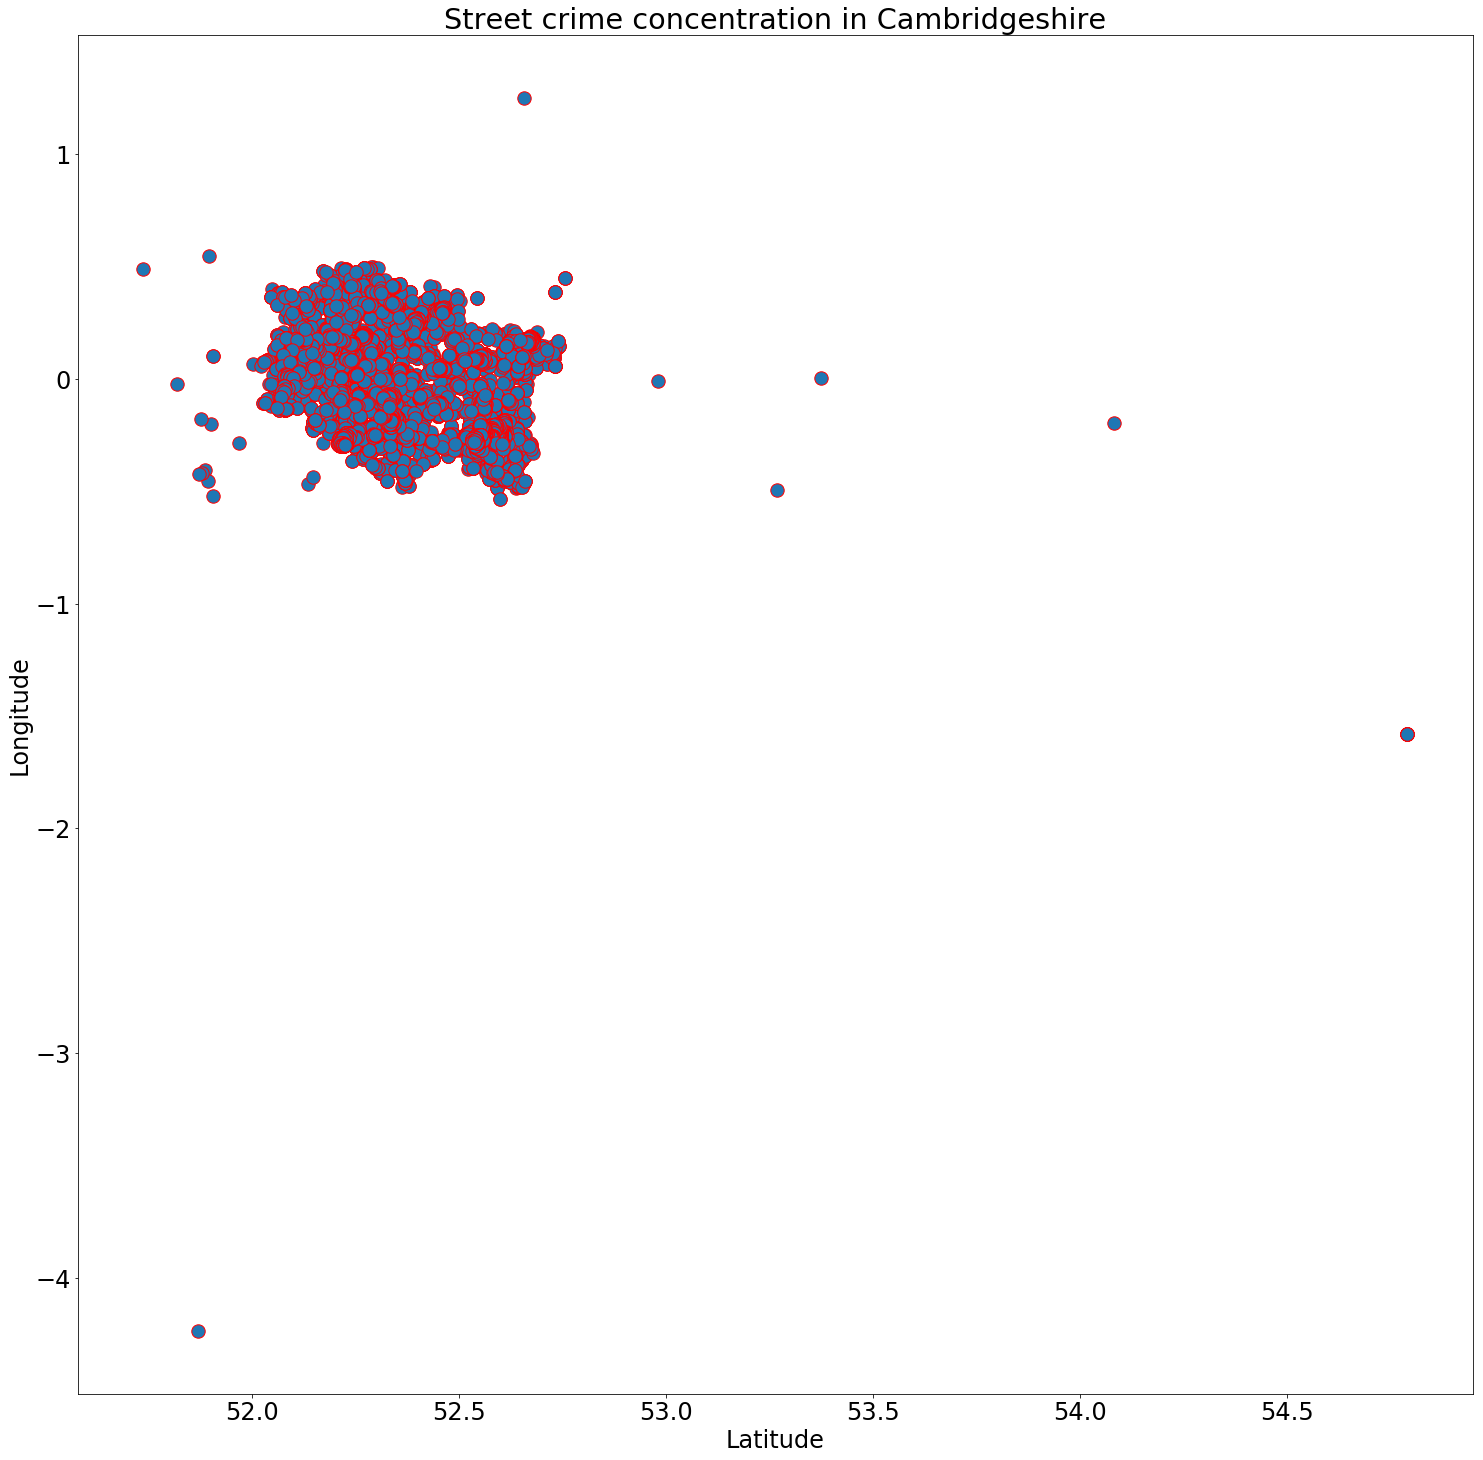

In [15]:
street_df.plot.scatter(x='Latitude', y='Longitude', title='Street crime concentration in Cambridgeshire', facecolors='none', edgecolors='r', s=180);

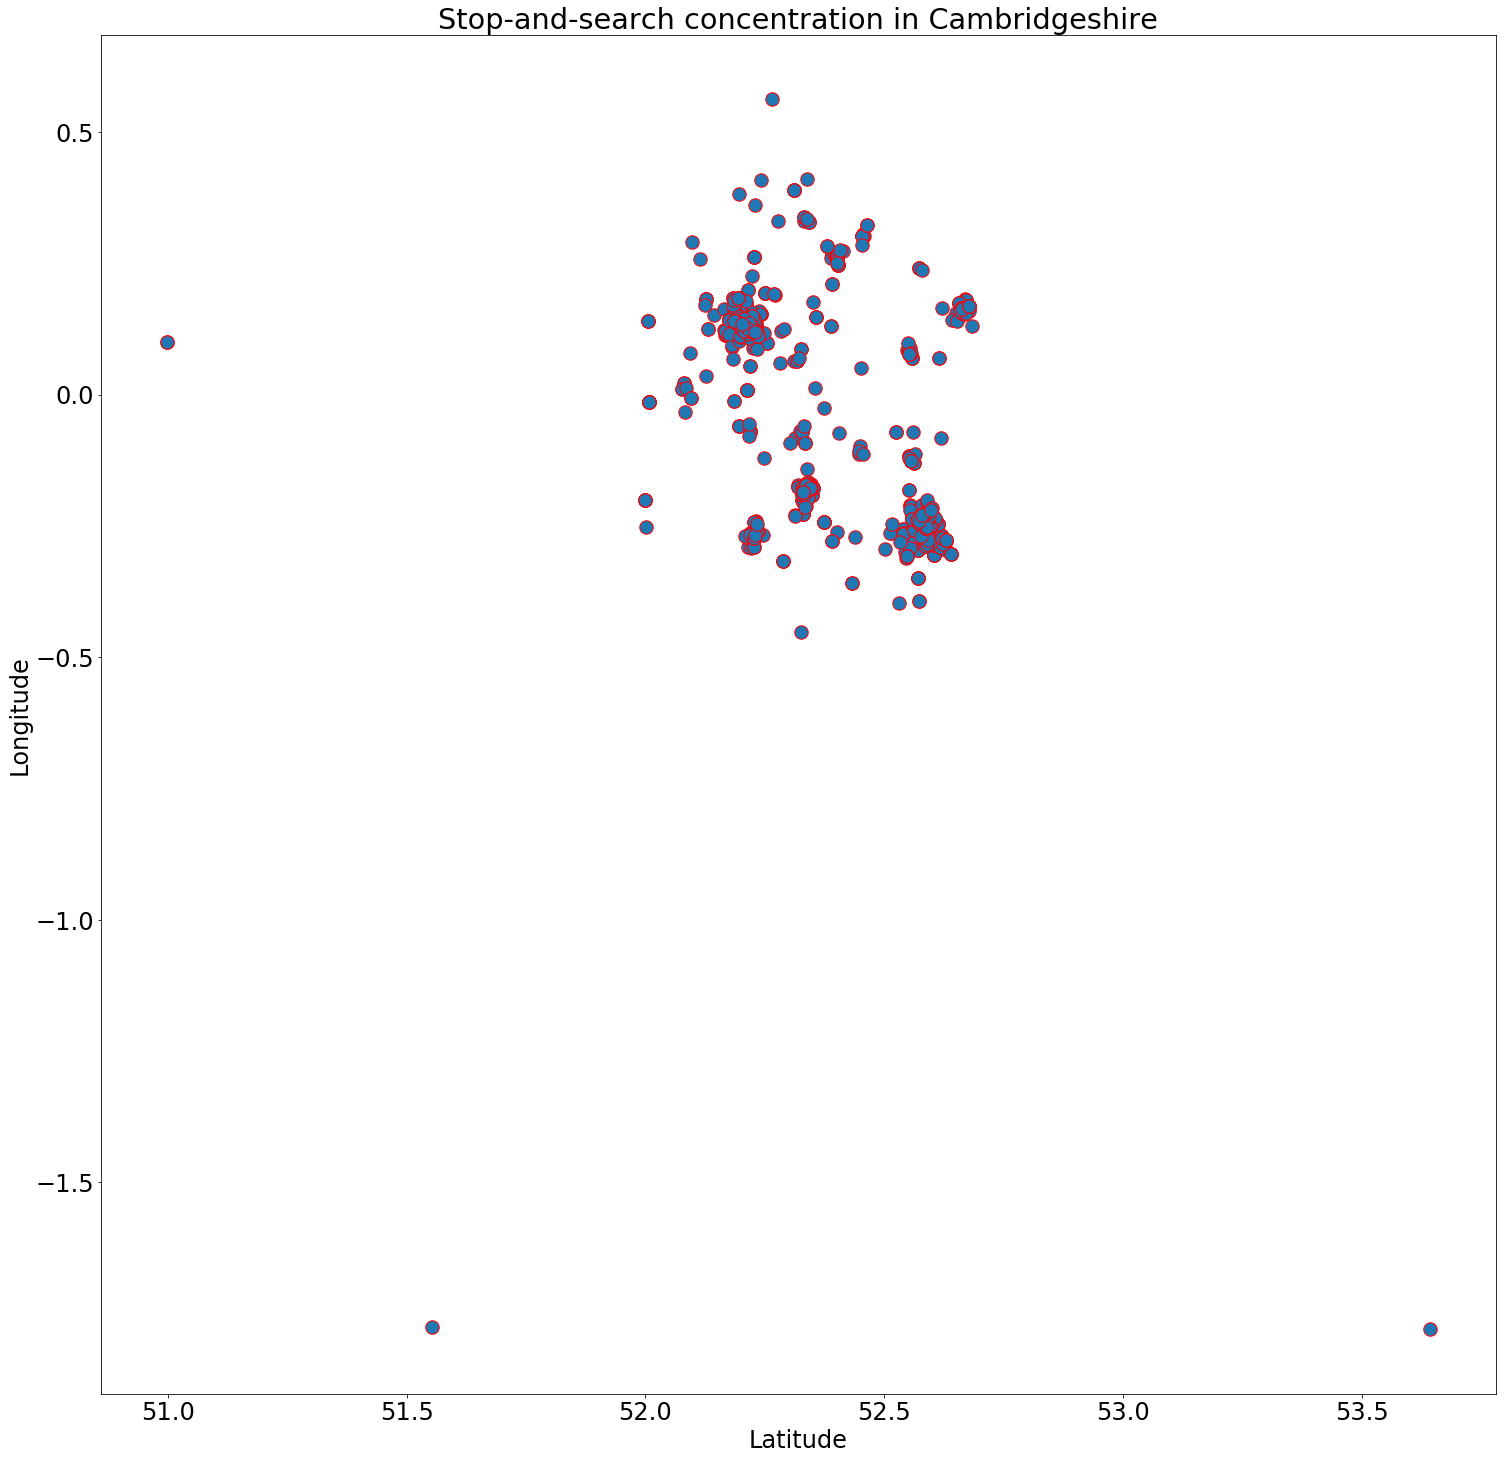

In [16]:
sas_df.plot.scatter(x='Latitude', y='Longitude', title='Stop-and-search concentration in Cambridgeshire', facecolors='none', edgecolors='r', s=180);

It is apparent that there are some outliers in both scatter plots

In [17]:
street_df['Crime type'].unique()

array(['Burglary', 'Anti-social behaviour', 'Bicycle theft',
       'Criminal damage and arson', 'Drugs', 'Other theft',
       'Public order', 'Robbery', 'Vehicle crime',
       'Violence and sexual offences', 'Shoplifting',
       'Theft from the person', 'Possession of weapons', 'Other crime'],
      dtype=object)

In [18]:
street_df.count()

Crime ID                 61129
Month                    79793
Reported by              79793
Falls within             79793
Longitude                79727
Latitude                 79727
Location                 79793
LSOA code                79727
LSOA name                79727
Crime type               79793
Last outcome category    61129
Context                      0
dtype: int64

In [19]:
street_df.shape

(79793, 12)

In [20]:
sas_df['Object of search'].unique()

array(['Controlled drugs', 'Offensive weapons',
       'Article for use in theft', 'Articles for use in criminal damage',
       'Evidence of offences under the Act', 'Stolen goods', 'Firearms'],
      dtype=object)

In [21]:
sas_df.count()

Type                                        1037
Date                                        1037
Part of a policing operation                  35
Policing operation                             0
Latitude                                    1032
Longitude                                   1032
Gender                                       983
Age range                                    967
Self-defined ethnicity                       922
Officer-defined ethnicity                    941
Legislation                                 1032
Object of search                            1037
Outcome                                     1037
Outcome linked to object of search           375
Removal of more than just outer clothing     978
dtype: int64

Further, just checking how search places are represented on a map

Removing the rows of 5 missing coordinates (longitude, latitude), since they cannot be represented on the map

In [22]:
sas_df2 = sas_df.dropna(axis=0, subset=['Longitude']).reset_index()

In [23]:
sas_df2.head()

index                       Type                       Date  \
0      0              Person search  2017-06-01T00:53:37+00:00   
1      1  Person and Vehicle search  2017-06-01T00:57:39+00:00   
2      2  Person and Vehicle search  2017-06-01T12:13:01+00:00   
3      3  Person and Vehicle search  2017-06-02T01:22:11+00:00   
4      4              Person search  2017-06-02T01:46:30+00:00   

  Part of a policing operation  Policing operation   Latitude  Longitude  \
0                          NaN                 NaN  52.390692   0.211098   
1                          NaN                 NaN  52.390692   0.211098   
2                          NaN                 NaN  52.204686   0.136415   
3                          NaN                 NaN  52.311854   0.390497   
4                          NaN                 NaN  52.311854   0.390497   

  Gender Age range                             Self-defined ethnicity  \
0   Male     18-24  White - English/Welsh/Scottish/Northern Irish/...   
1   Male     10-17  White - English/Welsh/Scottish/Northern Irish/...   
2   Male     25-34  Black/African/Caribbean/Black British - Caribbean   
3   Male     18-24  White - English/Welsh/Scottish/Northern Irish/...   
4   Male     18-24  White - English/Welsh/Scottish/Northern Irish/...   

  Officer-defined ethnicity                            Legislation  \
0                     White  Misuse of Drugs Act 1971 (section 23)   
1                     White  Misuse of Drugs Act 1971 (section 23)   
2                     Black  Misuse of Drugs Act 1971 (section 23)   
3                     White  Misuse of Drugs Act 1971 (section 23)   
4                     White  Misuse of Drugs Act 1971 (section 23)   

   Object of search                                  Outcome  \
0  Controlled drugs        Nothing found - no further action   
1  Controlled drugs        Nothing found - no further action   
2  Controlled drugs        Nothing found - no further action   
3  Controlled drugs  Offender given drugs possession warning   
4  Controlled drugs  Offender given drugs possession warning   

  Outcome linked to object of search Removal of more than just outer clothing  
0                                NaN                                    False  
1                                NaN                                    False  
2                                NaN                                     True  
3                               True                                    False  
4                               True                                    False

<p>We have the following object of search types:</p>

<p>&nbsp;</p>

<pre>
Object of search
Firearms                                 5
Evidence of offences under the Act       7
Articles for use in criminal damage     11
Stolen goods                            51
Offensive weapons                      165
Article for use in theft               199
Controlled drugs                       599</pre>

<table border="1" cellpadding="1" cellspacing="1" style="width: 500px">
	<caption>Object of search types</caption>
	<tbody>
		<tr>
			<td><strong>Object</strong></td>
			<td><strong>Colour</strong></td>
		</tr>
		<tr>
			<td>Controlled drugs</td>
			<td>red</td>
		</tr>
		<tr>
			<td>Article for use in theft</td>
			<td>black</td>
		</tr>
		<tr>
			<td>Offensive weapons</td>
			<td>blue</td>
		</tr>
		<tr>
			<td>Stolen goods</td>
			<td>yellow</td>
		</tr>
		<tr>
			<td>Articles for use in criminal damage</td>
			<td>green</td>
		</tr>
		<tr>
			<td>Evidence of offences under the Act</td>
			<td>white</td>
		</tr>
		<tr>
			<td>Firearms</td>
			<td>orange</td>
		</tr>
	</tbody>
</table>

<p>&nbsp;</p>

<p>&nbsp;</p>


In [24]:
#Object of search

colours = {'Controlled drugs': 'red', 'Offensive weapons' : 'blue', 'Article for use in theft' : 'black', 'Articles for use in criminal damage': 'green', 'Evidence of offences under the Act': 'white', 'Stolen goods': 'yellow', 'Firearms': 'orange'}
map_cambdridgeshire = folium.Map(location=[52.205297, 0.121820], zoom_start=10)
#width=600, height=300,, max_zoom=16)
sas_df2.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], 
                                              radius=10, fill = True, fill_color=colours[row['Object of search']])
                                             .add_to(map_cambdridgeshire), axis=1)

map_cambdridgeshire

<p>&nbsp;
<pre>
Object of search
Firearms                                 5
Evidence of offences under the Act       7
Articles for use in criminal damage     11
Stolen goods                            51
Offensive weapons                      165
Article for use in theft               199
Controlled drugs                       599</pre>
</p>


All the searches together (no different colours)


In [25]:
#Object of search

#colours = {'Controlled drugs': 'red', 'Offensive weapons' : 'blue', 'Article for use in theft' : 'black', 'Articles for use in criminal damage': 'green', 'Evidence of offences under the Act': 'white', 'Stolen goods': 'yellow', 'Firearms': 'orange'}
map_cambdridgeshire = folium.Map(location=[52.205297, 0.121820], zoom_start=10)
#width=600, height=300,, max_zoom=16)
sas_df2.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], 
                                              radius=10, fill = True)
                                             .add_to(map_cambdridgeshire), axis=1)

map_cambdridgeshire

Now I will try to create a DataFrame containing the latitude, longitude and the dataset name (either stop and search or street crime).
I will remove the rows that do not have the latitude and longitude values since without these values there is no way to represent the location of the search or crime.
I will plot the values using folium to see the stop-and-search and street crime overlap.

In [26]:
street_df.head()

Crime ID    Month  \
0  e553d812d5ef77cf247f60ad0ca64085450f2814ad1aa9...  2017-06   
1                                                NaN  2017-06   
2                                                NaN  2017-06   
3                                                NaN  2017-06   
4                                                NaN  2017-06   

                   Reported by                 Falls within  Longitude  \
0  Cambridgeshire Constabulary  Cambridgeshire Constabulary   0.400125   
1  Cambridgeshire Constabulary  Cambridgeshire Constabulary   0.135772   
2  Cambridgeshire Constabulary  Cambridgeshire Constabulary   0.130128   
3  Cambridgeshire Constabulary  Cambridgeshire Constabulary   0.131681   
4  Cambridgeshire Constabulary  Cambridgeshire Constabulary   0.136532   

    Latitude                   Location  LSOA code       LSOA name  \
0  52.048434  On or near Sages End Road  E01021375  Braintree 001A   
1  52.232788   On or near Kirkwood Road  E01017975  Cambridge 001A   
2  52.230525    On or near Crathern Way  E01017975  Cambridge 001A   
3  52.229005    On or near Crowland Way  E01017975  Cambridge 001A   
4  52.228485    On or near Jackson Road  E01017975  Cambridge 001A   

              Crime type                          Last outcome category  \
0               Burglary  Investigation complete; no suspect identified   
1  Anti-social behaviour                                            NaN   
2  Anti-social behaviour                                            NaN   
3  Anti-social behaviour                                            NaN   
4  Anti-social behaviour                                            NaN   

   Context  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [27]:
street_df.isna().sum()

Crime ID                 18664
Month                        0
Reported by                  0
Falls within                 0
Longitude                   66
Latitude                    66
Location                     0
LSOA code                   66
LSOA name                   66
Crime type                   0
Last outcome category    18664
Context                  79793
dtype: int64

We can see that the latitude and longitude values are missing in 66 rows

In [28]:
#street_coord_df
street_coord_df = street_df.loc[:, 'Longitude':'Latitude']
street_coord_df['Dataset'] = 'Street crime'
street_coord_df.head()

Longitude   Latitude       Dataset
0   0.400125  52.048434  Street crime
1   0.135772  52.232788  Street crime
2   0.130128  52.230525  Street crime
3   0.131681  52.229005  Street crime
4   0.136532  52.228485  Street crime

In [29]:
#sas_coord_df
sas_coord_df = sas_df.loc[:, 'Latitude':'Longitude']
sas_coord_df['Dataset'] = 'Stop and search'
sas_coord_df.head()

Latitude  Longitude          Dataset
0  52.390692   0.211098  Stop and search
1  52.390692   0.211098  Stop and search
2  52.204686   0.136415  Stop and search
3  52.311854   0.390497  Stop and search
4  52.311854   0.390497  Stop and search

In [30]:
combined_df = pd.concat([street_coord_df, sas_coord_df], ignore_index=True)
combined_df.head()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Dataset   Latitude  Longitude
0  Street crime  52.048434   0.400125
1  Street crime  52.232788   0.135772
2  Street crime  52.230525   0.130128
3  Street crime  52.229005   0.131681
4  Street crime  52.228485   0.136532

In [31]:
combined_df.tail()

Dataset   Latitude  Longitude
80825  Stop and search  52.579539  -0.228505
80826  Stop and search  52.598758  -0.219299
80827  Stop and search  52.552797   0.077997
80828  Stop and search  52.552797   0.077997
80829  Stop and search  52.552797   0.077997

In [32]:
# some counts
street_coord_df.shape

(79793, 3)

In [33]:
sas_coord_df.shape

(1037, 3)

In [34]:
combined_df.shape

(80830, 3)

In [35]:
print(1037/(79793)*100)

1.2996127479854123


<p>I will plot the searches and the crimes to see if they concentrate in the same places</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<table border="1" cellpadding="1" cellspacing="1" style="width: 500px;">
	<tbody>
		<tr>
			<td><strong>Crime or search?</strong></td>
			<td><strong>Colour</strong></td>
		</tr>
		<tr>
			<td>Street crime</td>
			<td>red</td>
		</tr>
		<tr>
			<td>Stop and search</td>
			<td>black</td>
		</tr>
	</tbody>
</table>

<p>&nbsp;</p>


<p>Now I realised that I have way too many points (over 80000) and that won&#39;t work.</p>

<p>Time to change the plan.</p>

<p>In my TMA02 I came to the conclusion that some crime types (e.g. Antisocial behaviour, Bicycle theft) tend to peak during the summer time.</p>

<p>So we could look at the summer months (June, July, August)</p>


In [36]:
street_df.dtypes

Crime ID                  object
Month                     object
Reported by               object
Falls within              object
Longitude                float64
Latitude                 float64
Location                  object
LSOA code                 object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                  float64
dtype: object

In [37]:
street_df['Month'].head()

0    2017-06
1    2017-06
2    2017-06
3    2017-06
4    2017-06
Name: Month, dtype: object

In [38]:
# Convert Date to datetime
sas_df['Date'] = pd.to_datetime(sas_df['Date'])
sas_df.head()

Type                Date Part of a policing operation  \
0              Person search 2017-06-01 00:53:37                          NaN   
1  Person and Vehicle search 2017-06-01 00:57:39                          NaN   
2  Person and Vehicle search 2017-06-01 12:13:01                          NaN   
3  Person and Vehicle search 2017-06-02 01:22:11                          NaN   
4              Person search 2017-06-02 01:46:30                          NaN   

   Policing operation   Latitude  Longitude Gender Age range  \
0                 NaN  52.390692   0.211098   Male     18-24   
1                 NaN  52.390692   0.211098   Male     10-17   
2                 NaN  52.204686   0.136415   Male     25-34   
3                 NaN  52.311854   0.390497   Male     18-24   
4                 NaN  52.311854   0.390497   Male     18-24   

                              Self-defined ethnicity  \
0  White - English/Welsh/Scottish/Northern Irish/...   
1  White - English/Welsh/Scottish/Northern Irish/...   
2  Black/African/Caribbean/Black British - Caribbean   
3  White - English/Welsh/Scottish/Northern Irish/...   
4  White - English/Welsh/Scottish/Northern Irish/...   

  Officer-defined ethnicity                            Legislation  \
0                     White  Misuse of Drugs Act 1971 (section 23)   
1                     White  Misuse of Drugs Act 1971 (section 23)   
2                     Black  Misuse of Drugs Act 1971 (section 23)   
3                     White  Misuse of Drugs Act 1971 (section 23)   
4                     White  Misuse of Drugs Act 1971 (section 23)   

   Object of search                                  Outcome  \
0  Controlled drugs        Nothing found - no further action   
1  Controlled drugs        Nothing found - no further action   
2  Controlled drugs        Nothing found - no further action   
3  Controlled drugs  Offender given drugs possession warning   
4  Controlled drugs  Offender given drugs possession warning   

  Outcome linked to object of search Removal of more than just outer clothing  
0                                NaN                                    False  
1                                NaN                                    False  
2                                NaN                                     True  
3                               True                                    False  
4                               True                                    False

In [39]:
# add new column Month
sas_df['Month'] = sas_df['Date'].dt.normalize()
sas_df['Month'] = sas_df['Month'].dt.to_period('M')
sas_df.head()

Type                Date Part of a policing operation  \
0              Person search 2017-06-01 00:53:37                          NaN   
1  Person and Vehicle search 2017-06-01 00:57:39                          NaN   
2  Person and Vehicle search 2017-06-01 12:13:01                          NaN   
3  Person and Vehicle search 2017-06-02 01:22:11                          NaN   
4              Person search 2017-06-02 01:46:30                          NaN   

   Policing operation   Latitude  Longitude Gender Age range  \
0                 NaN  52.390692   0.211098   Male     18-24   
1                 NaN  52.390692   0.211098   Male     10-17   
2                 NaN  52.204686   0.136415   Male     25-34   
3                 NaN  52.311854   0.390497   Male     18-24   
4                 NaN  52.311854   0.390497   Male     18-24   

                              Self-defined ethnicity  \
0  White - English/Welsh/Scottish/Northern Irish/...   
1  White - English/Welsh/Scottish/Northern Irish/...   
2  Black/African/Caribbean/Black British - Caribbean   
3  White - English/Welsh/Scottish/Northern Irish/...   
4  White - English/Welsh/Scottish/Northern Irish/...   

  Officer-defined ethnicity                            Legislation  \
0                     White  Misuse of Drugs Act 1971 (section 23)   
1                     White  Misuse of Drugs Act 1971 (section 23)   
2                     Black  Misuse of Drugs Act 1971 (section 23)   
3                     White  Misuse of Drugs Act 1971 (section 23)   
4                     White  Misuse of Drugs Act 1971 (section 23)   

   Object of search                                  Outcome  \
0  Controlled drugs        Nothing found - no further action   
1  Controlled drugs        Nothing found - no further action   
2  Controlled drugs        Nothing found - no further action   
3  Controlled drugs  Offender given drugs possession warning   
4  Controlled drugs  Offender given drugs possession warning   

  Outcome linked to object of search Removal of more than just outer clothing  \
0                                NaN                                    False   
1                                NaN                                    False   
2                                NaN                                     True   
3                               True                                    False   
4                               True                                    False   

    Month  
0 2017-06  
1 2017-06  
2 2017-06  
3 2017-06  
4 2017-06

In [40]:
#street_coord_df
columns = ['Longitude', 'Latitude', 'Month']
street_coord_df = street_df.loc[:, columns]
street_coord_df['Dataset'] = 'Street crime'
street_coord_df.set_index('Month', inplace=True)
street_coord_df.dropna(inplace=True) # drop rows with missing longitude and latitude values
street_coord_df.head()

Longitude   Latitude       Dataset
Month                                      
2017-06   0.400125  52.048434  Street crime
2017-06   0.135772  52.232788  Street crime
2017-06   0.130128  52.230525  Street crime
2017-06   0.131681  52.229005  Street crime
2017-06   0.136532  52.228485  Street crime

In [41]:
street_coord_df.shape

(79727, 3)

In [42]:
street_coord_df.count()

Longitude    79727
Latitude     79727
Dataset      79727
dtype: int64

In [43]:
#sas_coord_df
sas_coord_df = sas_df.loc[:, columns]
sas_coord_df['Dataset'] = 'Stop and search'
sas_coord_df.set_index('Month', inplace=True)
sas_coord_df.head()

Longitude   Latitude          Dataset
Month                                         
2017-06   0.211098  52.390692  Stop and search
2017-06   0.211098  52.390692  Stop and search
2017-06   0.136415  52.204686  Stop and search
2017-06   0.390497  52.311854  Stop and search
2017-06   0.390497  52.311854  Stop and search

In [44]:
sas_coord_df.tail()

Longitude   Latitude          Dataset
Month                                         
2018-05  -0.228505  52.579539  Stop and search
2018-05  -0.219299  52.598758  Stop and search
2018-05   0.077997  52.552797  Stop and search
2018-05   0.077997  52.552797  Stop and search
2018-05   0.077997  52.552797  Stop and search

<p>Now we have two dataframes with longitude, latitude and month.</p>

<p>I will choose May</p>
It has the lowest amount of recorded crime, thus is easier to visualise on a map

<p>&nbsp;</p>


In [45]:
# summer = ['2017-06', '2017-07', '2017-08']
#june = '2017-06'
may = '2018-05'
street_coord_may_df = street_coord_df.loc[may]
street_coord_may_df.head()

Longitude   Latitude       Dataset
Month                                      
2018-05  -0.436909  52.146572  Street crime
2018-05  -0.009233  52.979236  Street crime
2018-05   0.130128  52.230525  Street crime
2018-05   0.133182  52.231900  Street crime
2018-05   0.130128  52.230525  Street crime

In [46]:
street_coord_may_df.shape

(2997, 3)

In [47]:
#june = ['2017-06']
sas_coord_may_df = sas_coord_df.loc[may]
sas_coord_may_df.head()

Longitude   Latitude          Dataset
Month                                         
2018-05   0.162929  52.663884  Stop and search
2018-05  -0.205299  52.589403  Stop and search
2018-05  -0.199880  52.588718  Stop and search
2018-05   0.012551  52.354696  Stop and search
2018-05   0.158372  52.677031  Stop and search

In [48]:
sas_coord_may_df.shape

(138, 3)

In [49]:
# for overall crime and searches
(1037/79793)*100

1.2996127479854123

In [50]:
searches = sas_coord_may_df.shape[0]
crimes = street_coord_may_df.shape[0]

percentage = (searches/crimes) * 100
percentage

4.604604604604605

We have 67 stop-and-search operations and 8090 street crimes in June in Cambridgeshire
which means that the stop-and-search operations consitute 0.8 per cent of total recorded crimes (in June in Cambridgeshire).

For May:
4.6 stop-and-search operations per 100 street crimes.

In [51]:
# try to concat 

combined_df = pd.concat([street_coord_may_df, sas_coord_may_df])
combined_df.head()

Longitude   Latitude       Dataset
Month                                      
2018-05  -0.436909  52.146572  Street crime
2018-05  -0.009233  52.979236  Street crime
2018-05   0.130128  52.230525  Street crime
2018-05   0.133182  52.231900  Street crime
2018-05   0.130128  52.230525  Street crime

In [52]:
combined_df.tail()

Longitude   Latitude          Dataset
Month                                         
2018-05  -0.228505  52.579539  Stop and search
2018-05  -0.219299  52.598758  Stop and search
2018-05   0.077997  52.552797  Stop and search
2018-05   0.077997  52.552797  Stop and search
2018-05   0.077997  52.552797  Stop and search

In [53]:
crime_or_search = {'Street crime': 'yellow', 'Stop and search' : 'black'}
map_cambdridgeshire = folium.Map(location=[52.205297, 0.121820], zoom_start=10, prefer_canvas=True)
#width=600, height=300,, max_zoom=16)
combined_df.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], 
                                              radius=10, fill = True, fill_color=crime_or_search[row['Dataset']])
                                             .add_to(map_cambdridgeshire), axis=1)

map_cambdridgeshire

<p>We know that controlled drugs is the most searched object</p>

<p>We also know that there were 105 arrests made for the possession/selling/production of controlled drugs (over the year) (in the stop_and_search Notebook)
    For one arrest there was no location recorded<br />
&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>&nbsp;</p>

<p>What if the police is looking for controlled drugs, finds something else (not drugs) and makes an arrest for the other object (e.g. weapons). There is a column &#39; Outcome linked to object of search &#39; which in some cases is False. I assume, it means that the police were looking for controlled drugs, found something else and made the arrest.</p>


Next I will plot the street crime data using k-means

Text(0.5,1,'Street crime over the year')

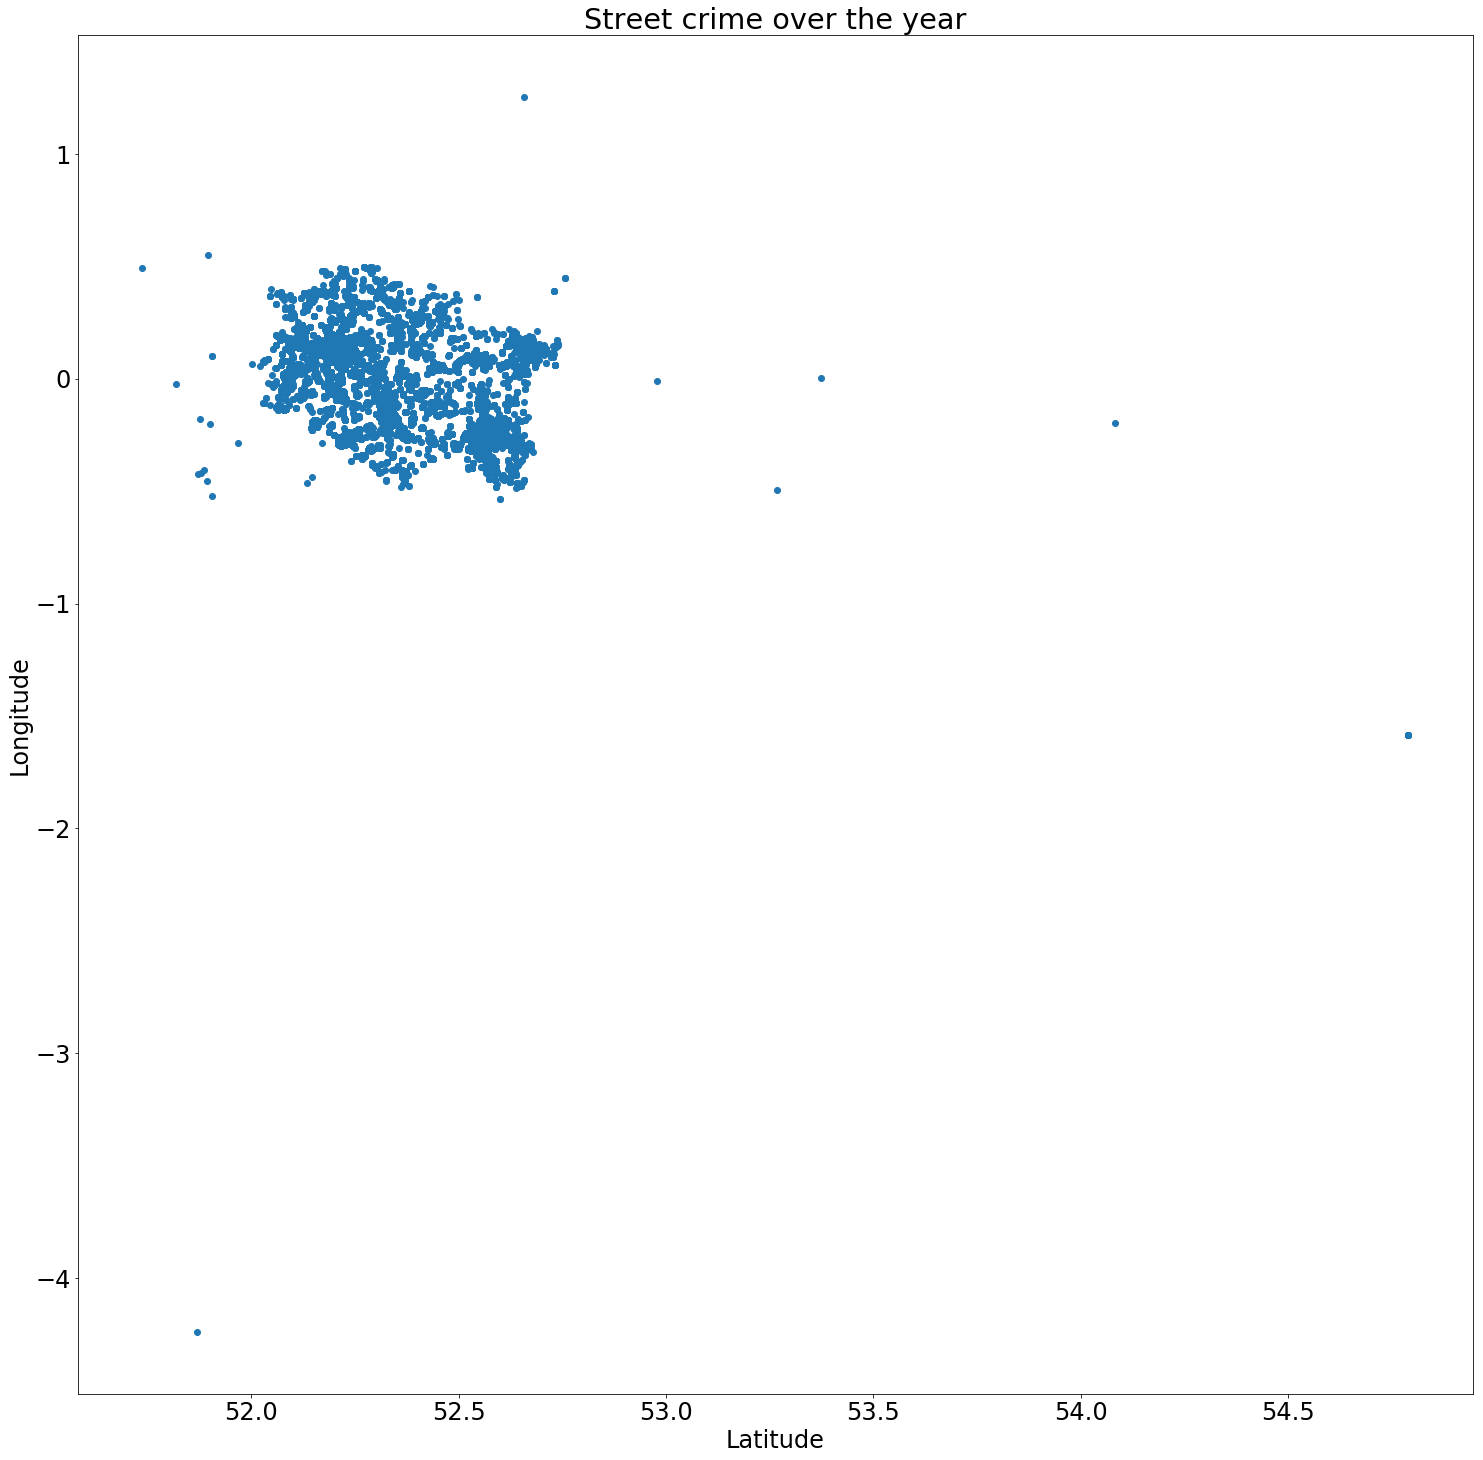

In [54]:
plt.scatter(street_coord_df['Latitude'],
            street_coord_df['Longitude'])

plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.title('Street crime over the year')

In [55]:
# remove outliers (Latitude, Longitude)
import seaborn as sns

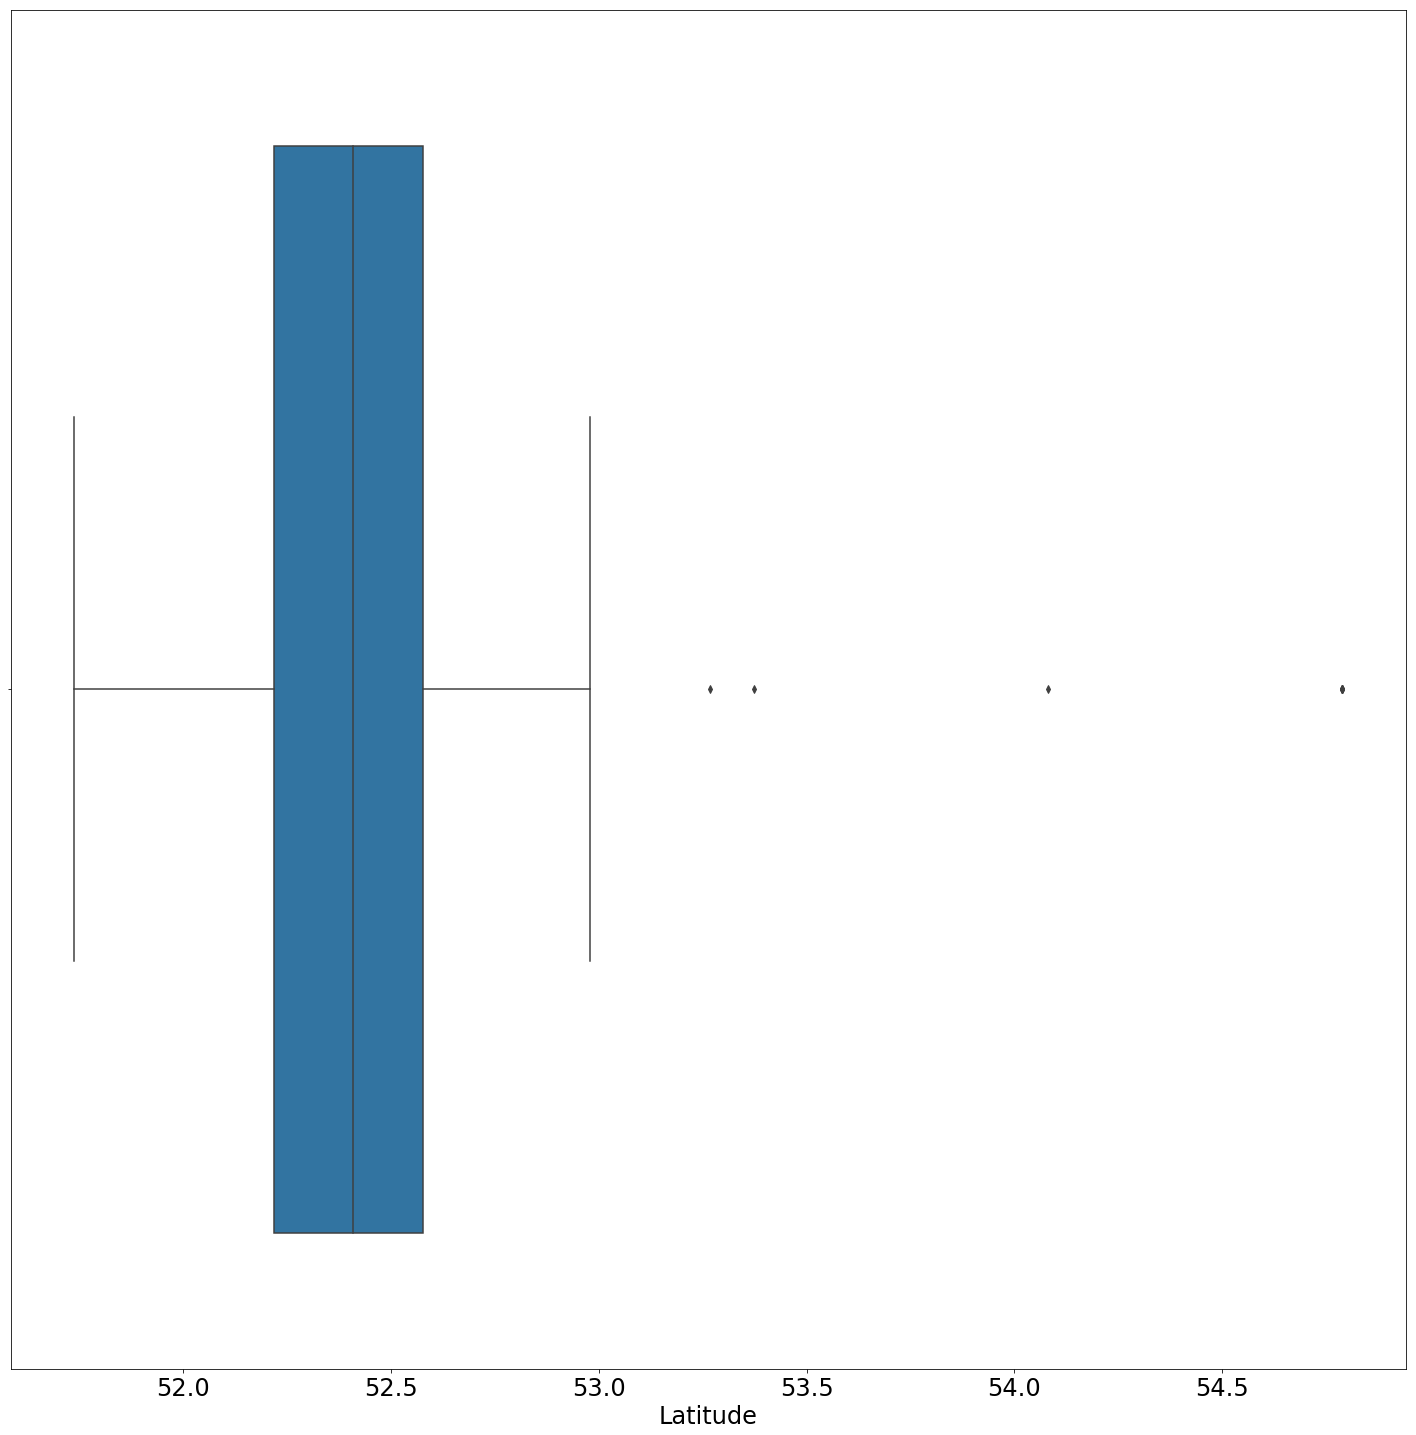

In [56]:
sns.boxplot(x=street_coord_df['Latitude'])

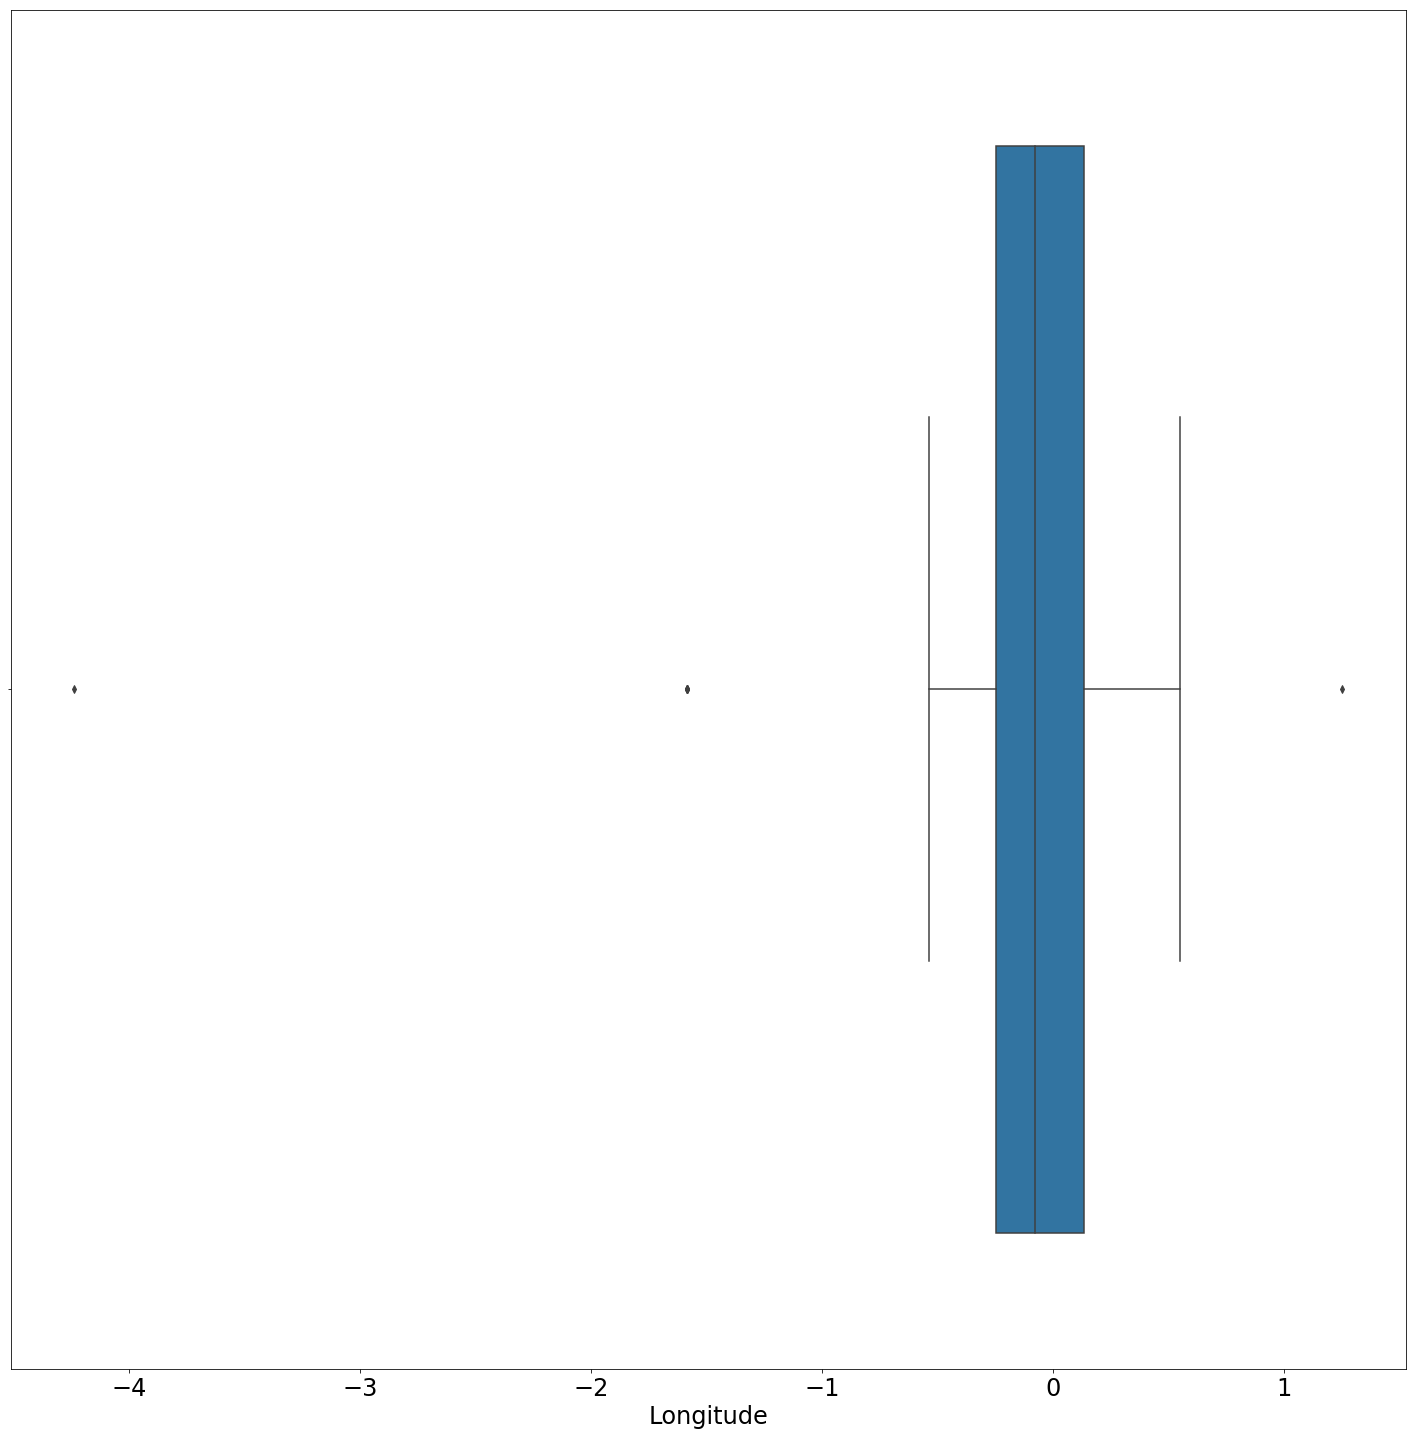

In [57]:
sns.boxplot(street_coord_df['Longitude'])

In [58]:
#remove outliers
#new df where Latitude < 53, Longitude > -1

new_street_coord_df = street_coord_df[(street_coord_df['Latitude'] < 53) & (street_coord_df['Longitude'] > -1) & (street_coord_df['Longitude'] < 1)]
new_street_coord_df.head()

Longitude   Latitude       Dataset
Month                                      
2017-06   0.400125  52.048434  Street crime
2017-06   0.135772  52.232788  Street crime
2017-06   0.130128  52.230525  Street crime
2017-06   0.131681  52.229005  Street crime
2017-06   0.136532  52.228485  Street crime

Text(0.5,1,'Street crime over the year')

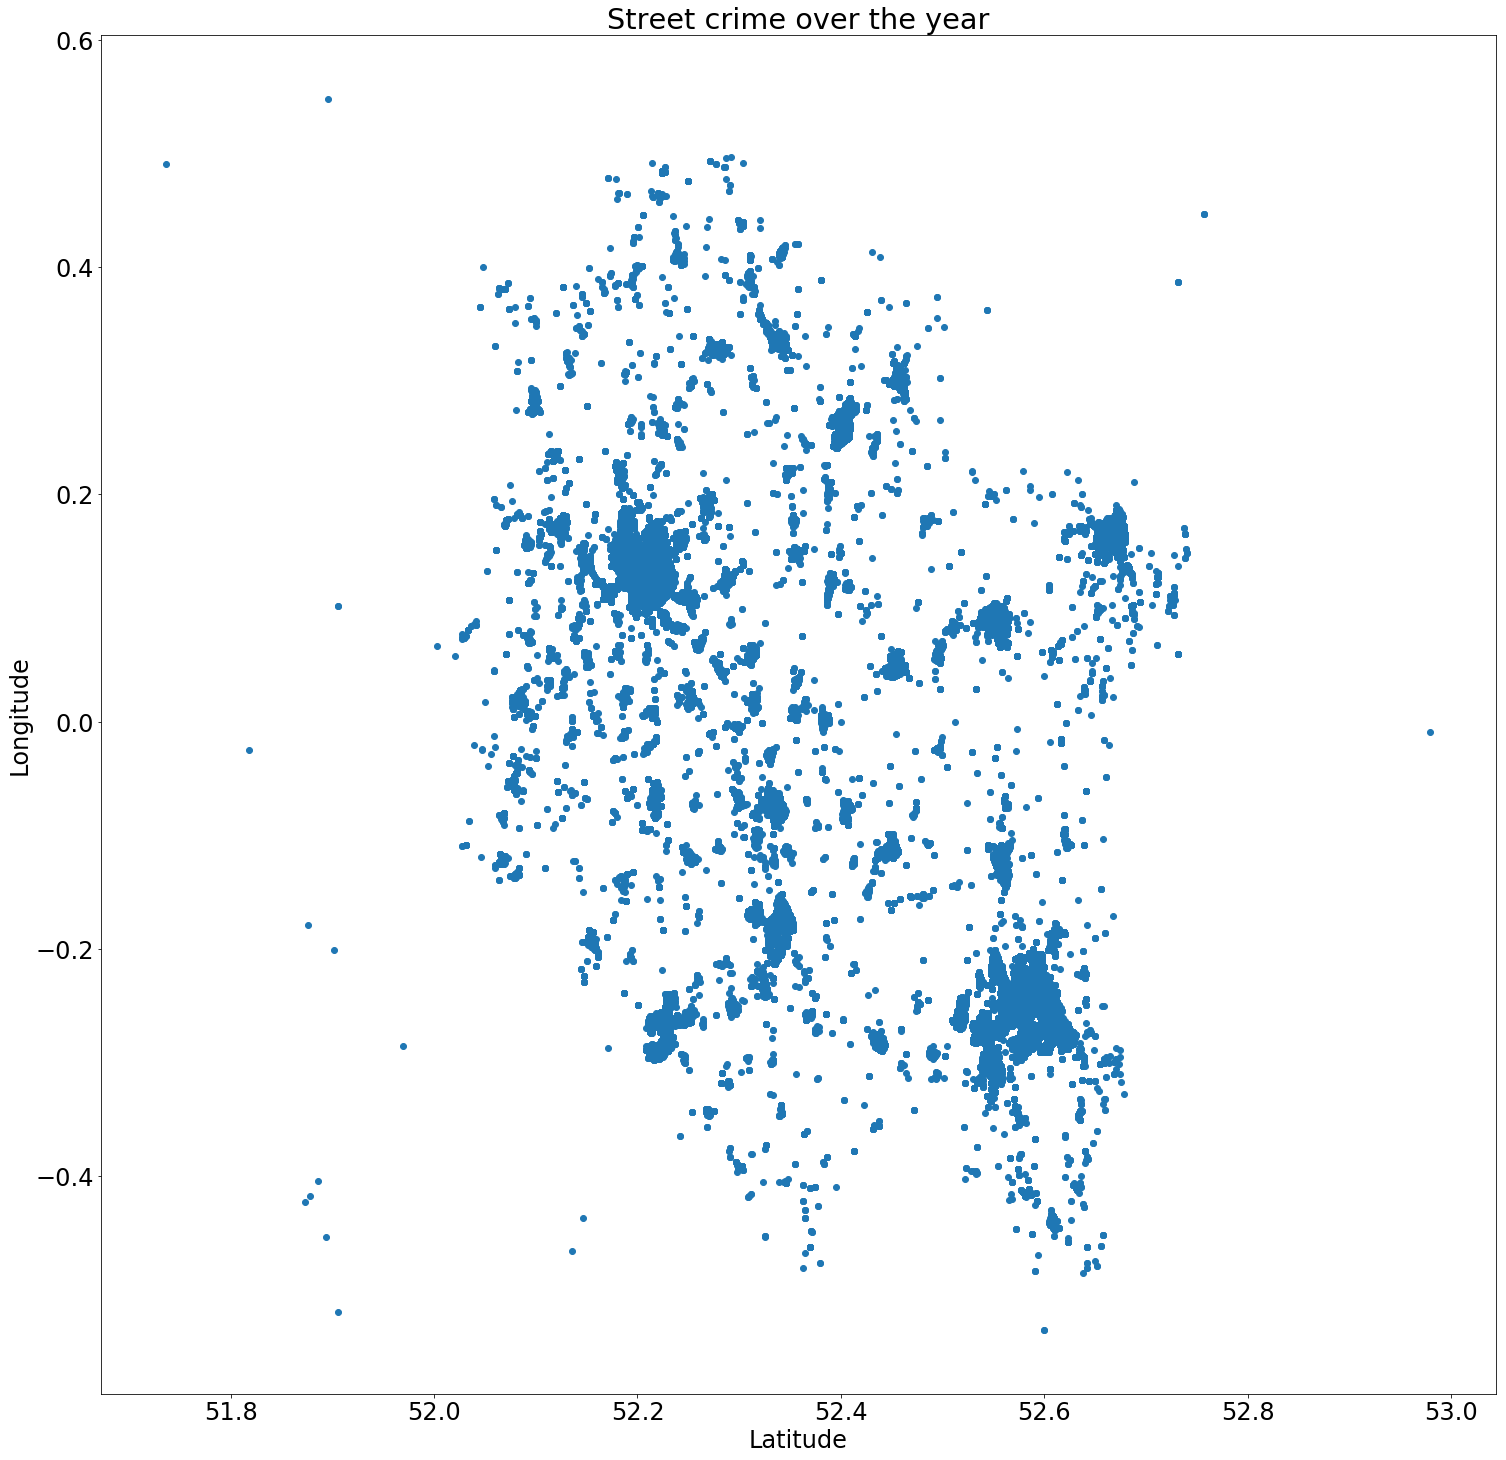

In [59]:
plt.scatter(new_street_coord_df['Latitude'],
            new_street_coord_df['Longitude'])

plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.title('Street crime over the year')

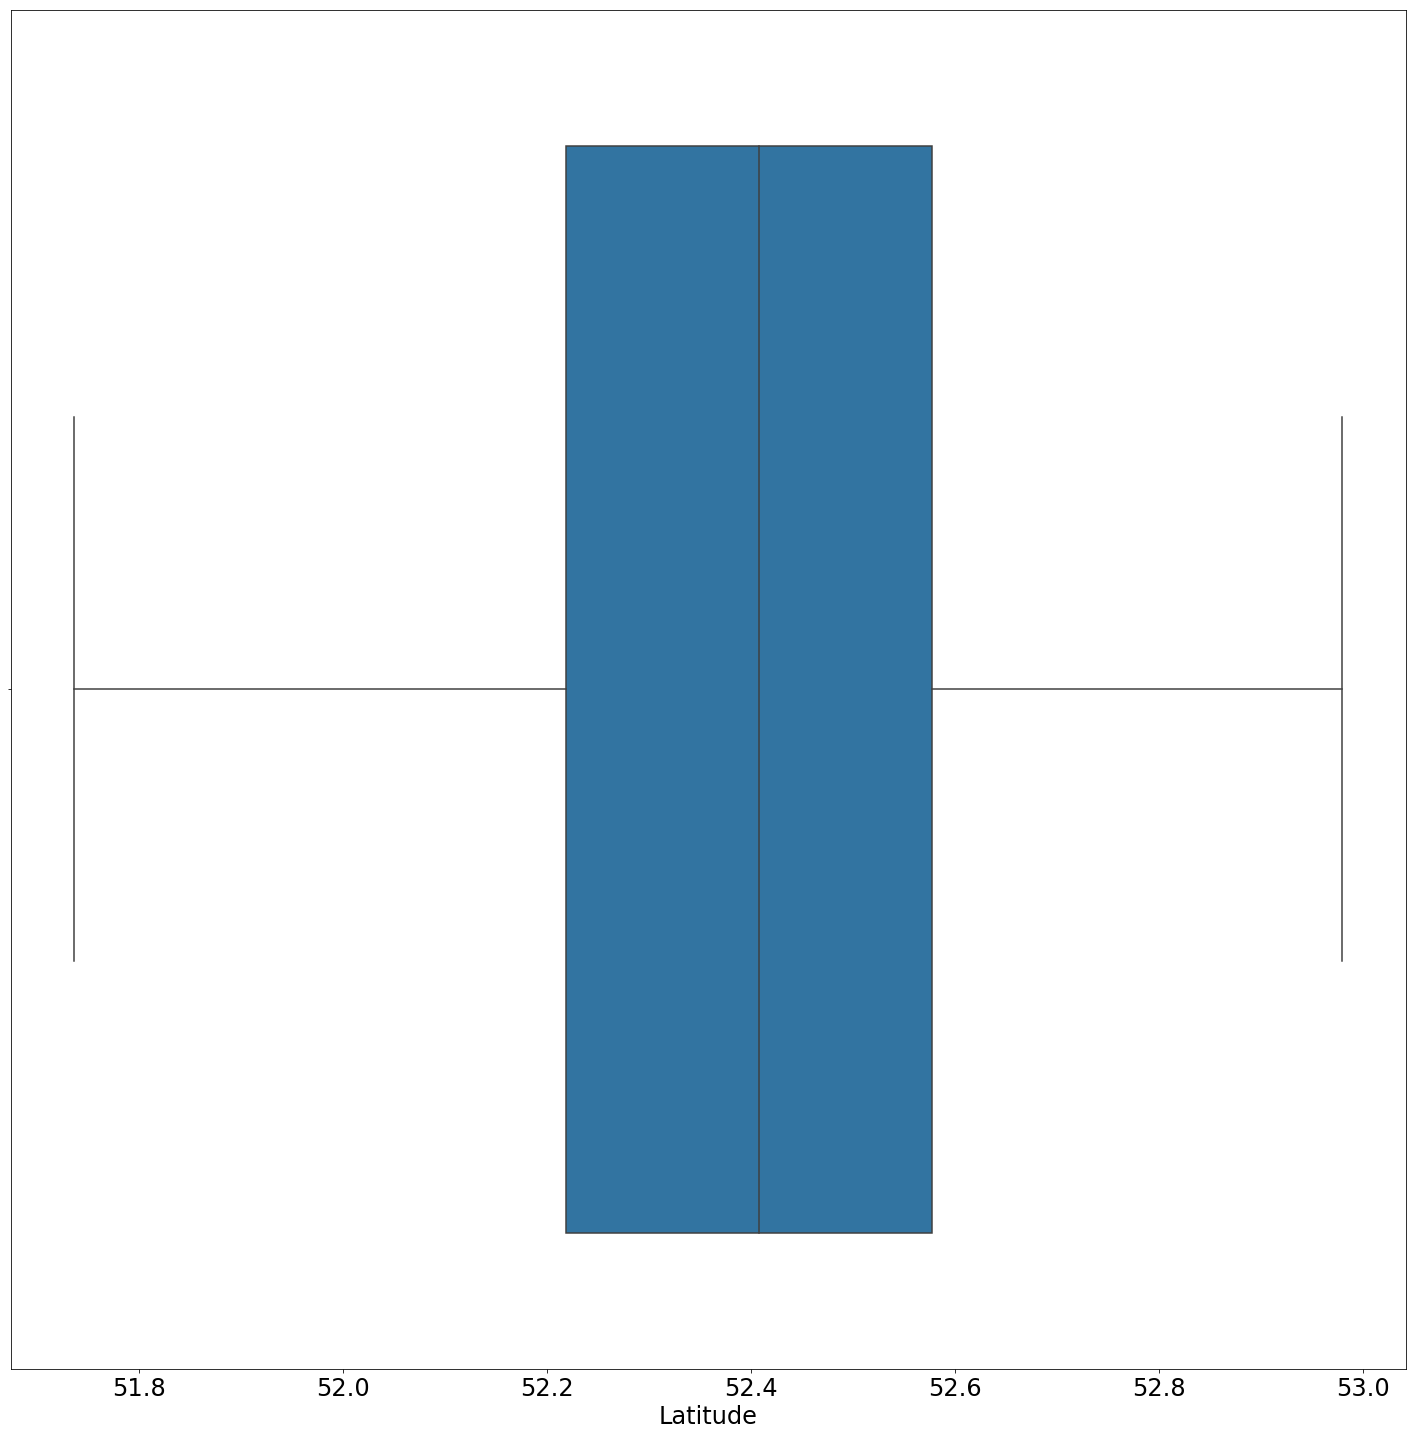

In [60]:
# looking for outliers again
sns.boxplot(x=new_street_coord_df['Latitude'])

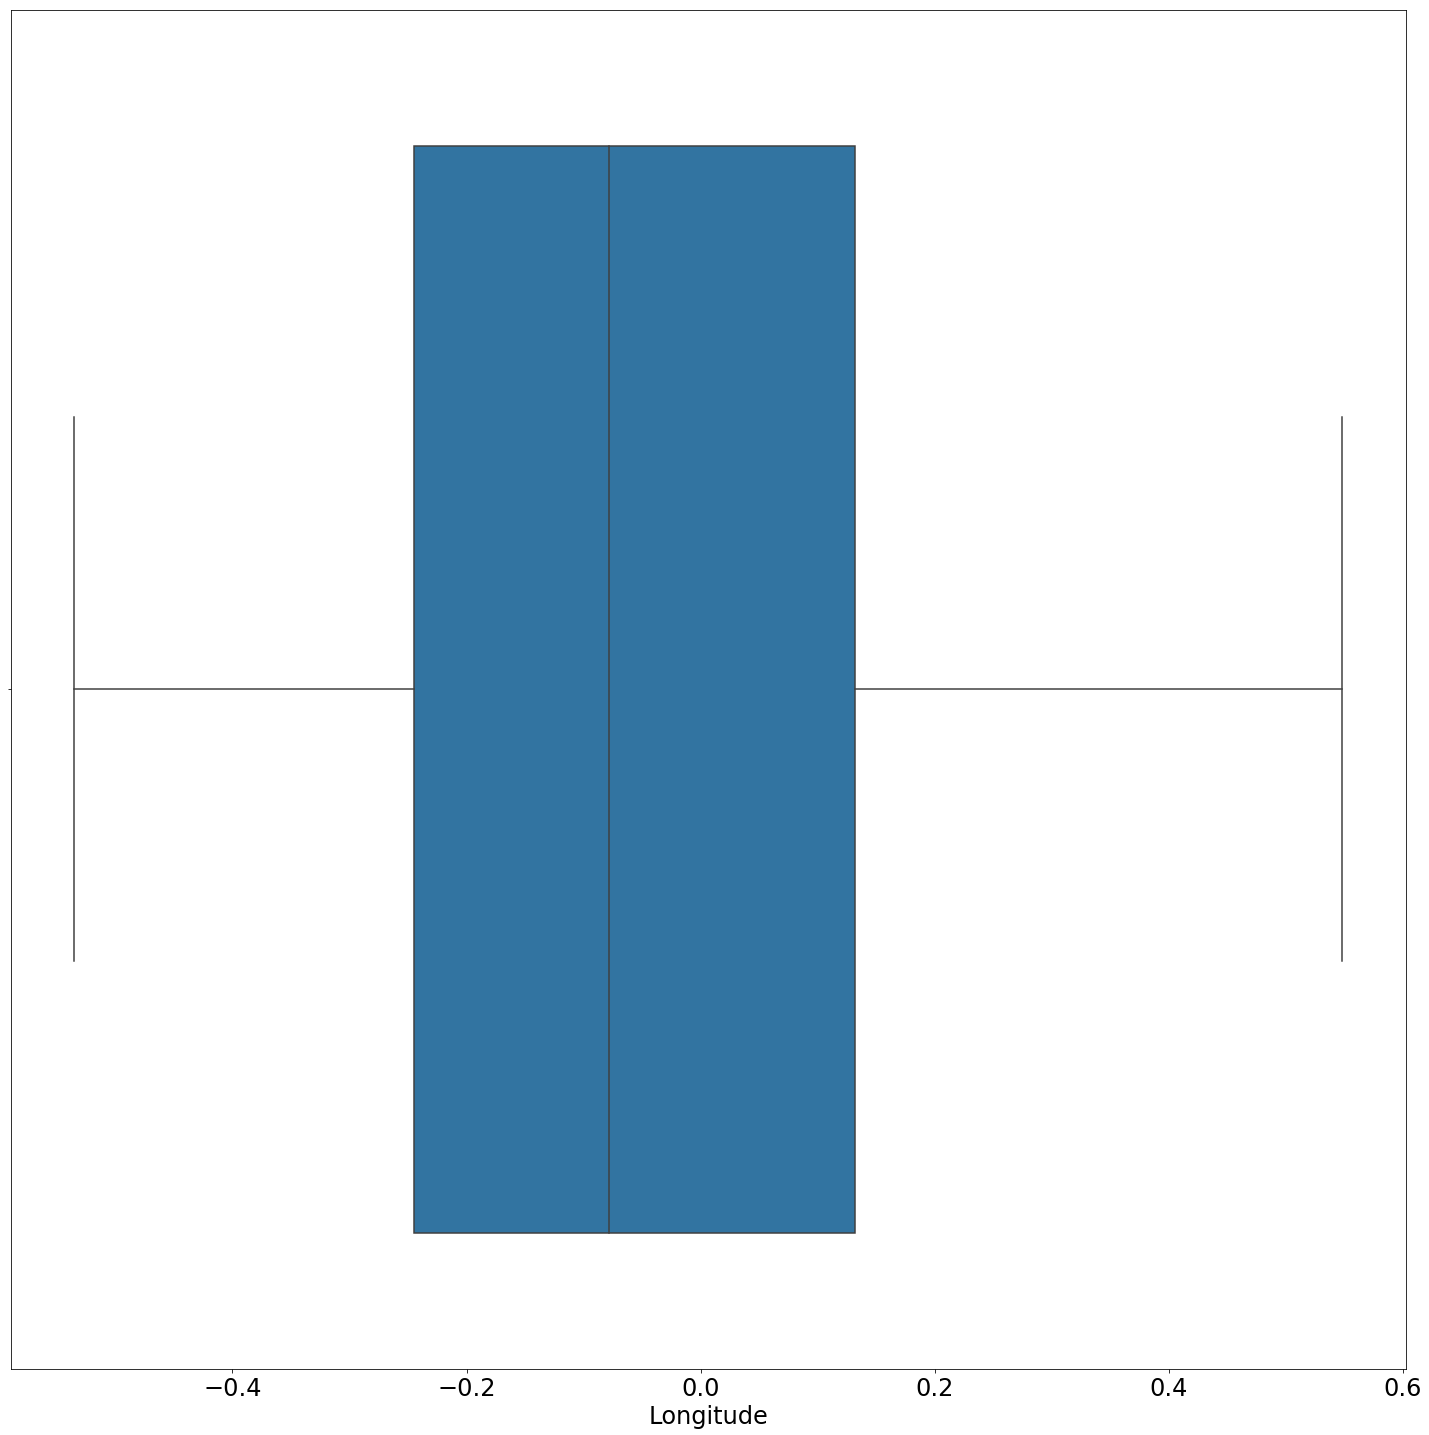

In [61]:
sns.boxplot(x=new_street_coord_df['Longitude'])

<p>So, there are no more outliers</p>

<p>Next, do the same for the stop and search `DataFrame`<br />
&nbsp;</p>


Text(0.5,1,'Stop and search over the year')

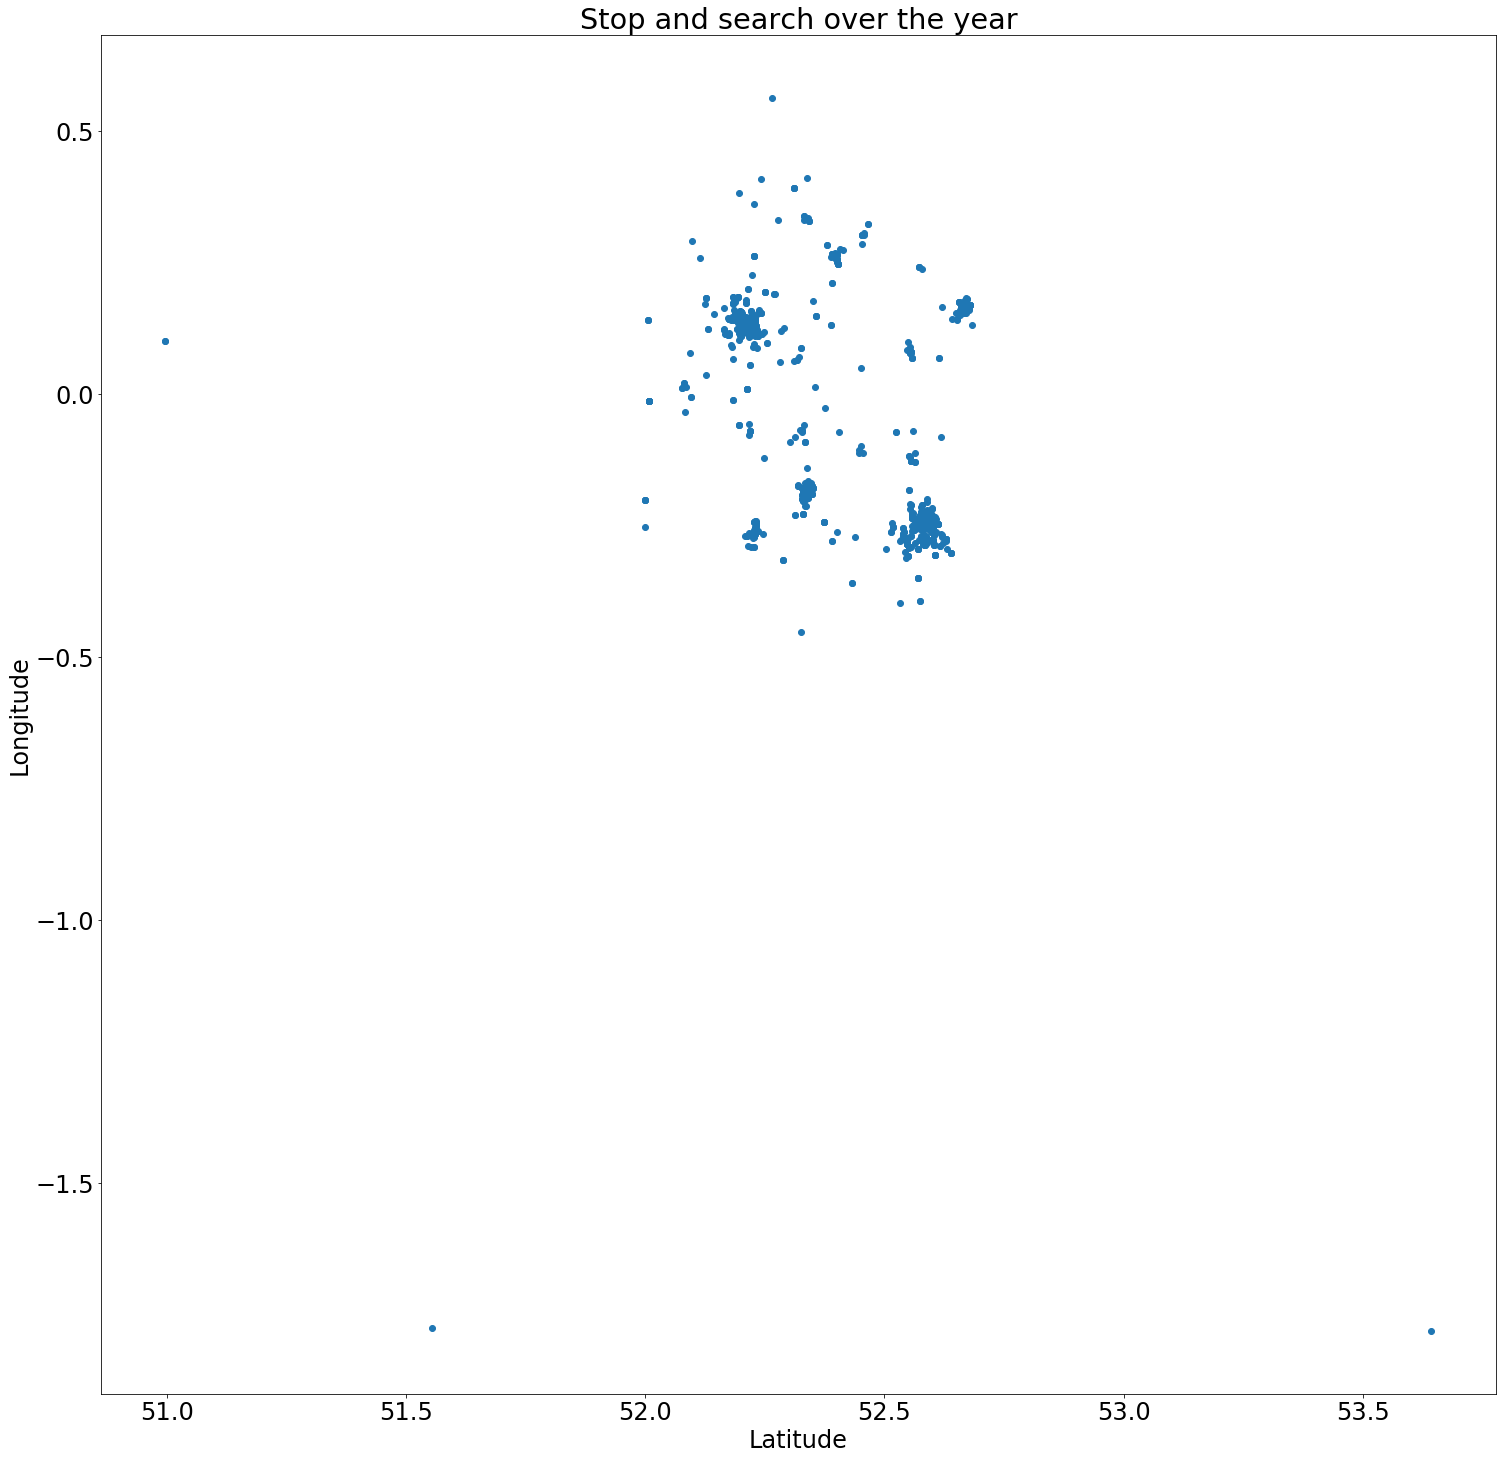

In [62]:
#sas_coord_df
plt.scatter(sas_coord_df['Latitude'],
            sas_coord_df['Longitude'])

plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.title('Stop and search over the year')


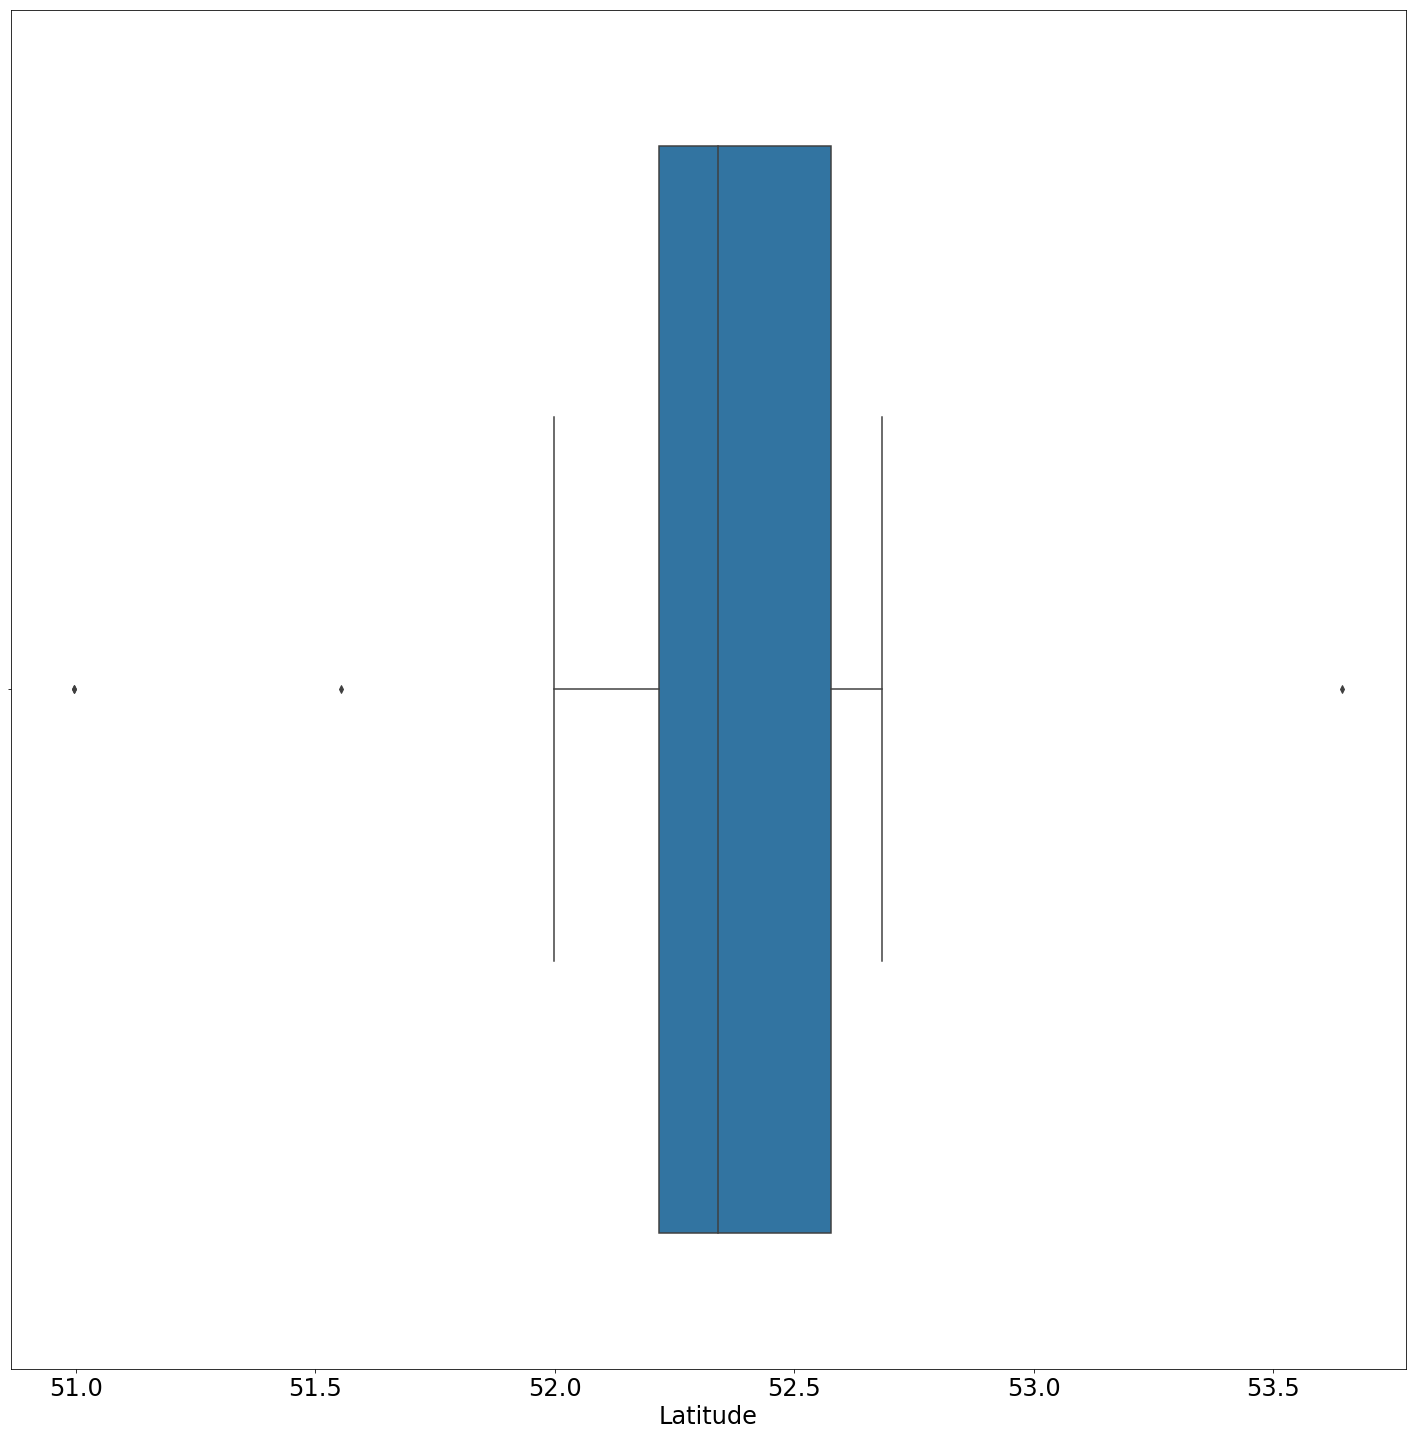

In [63]:
sns.boxplot(x=sas_coord_df['Latitude'])

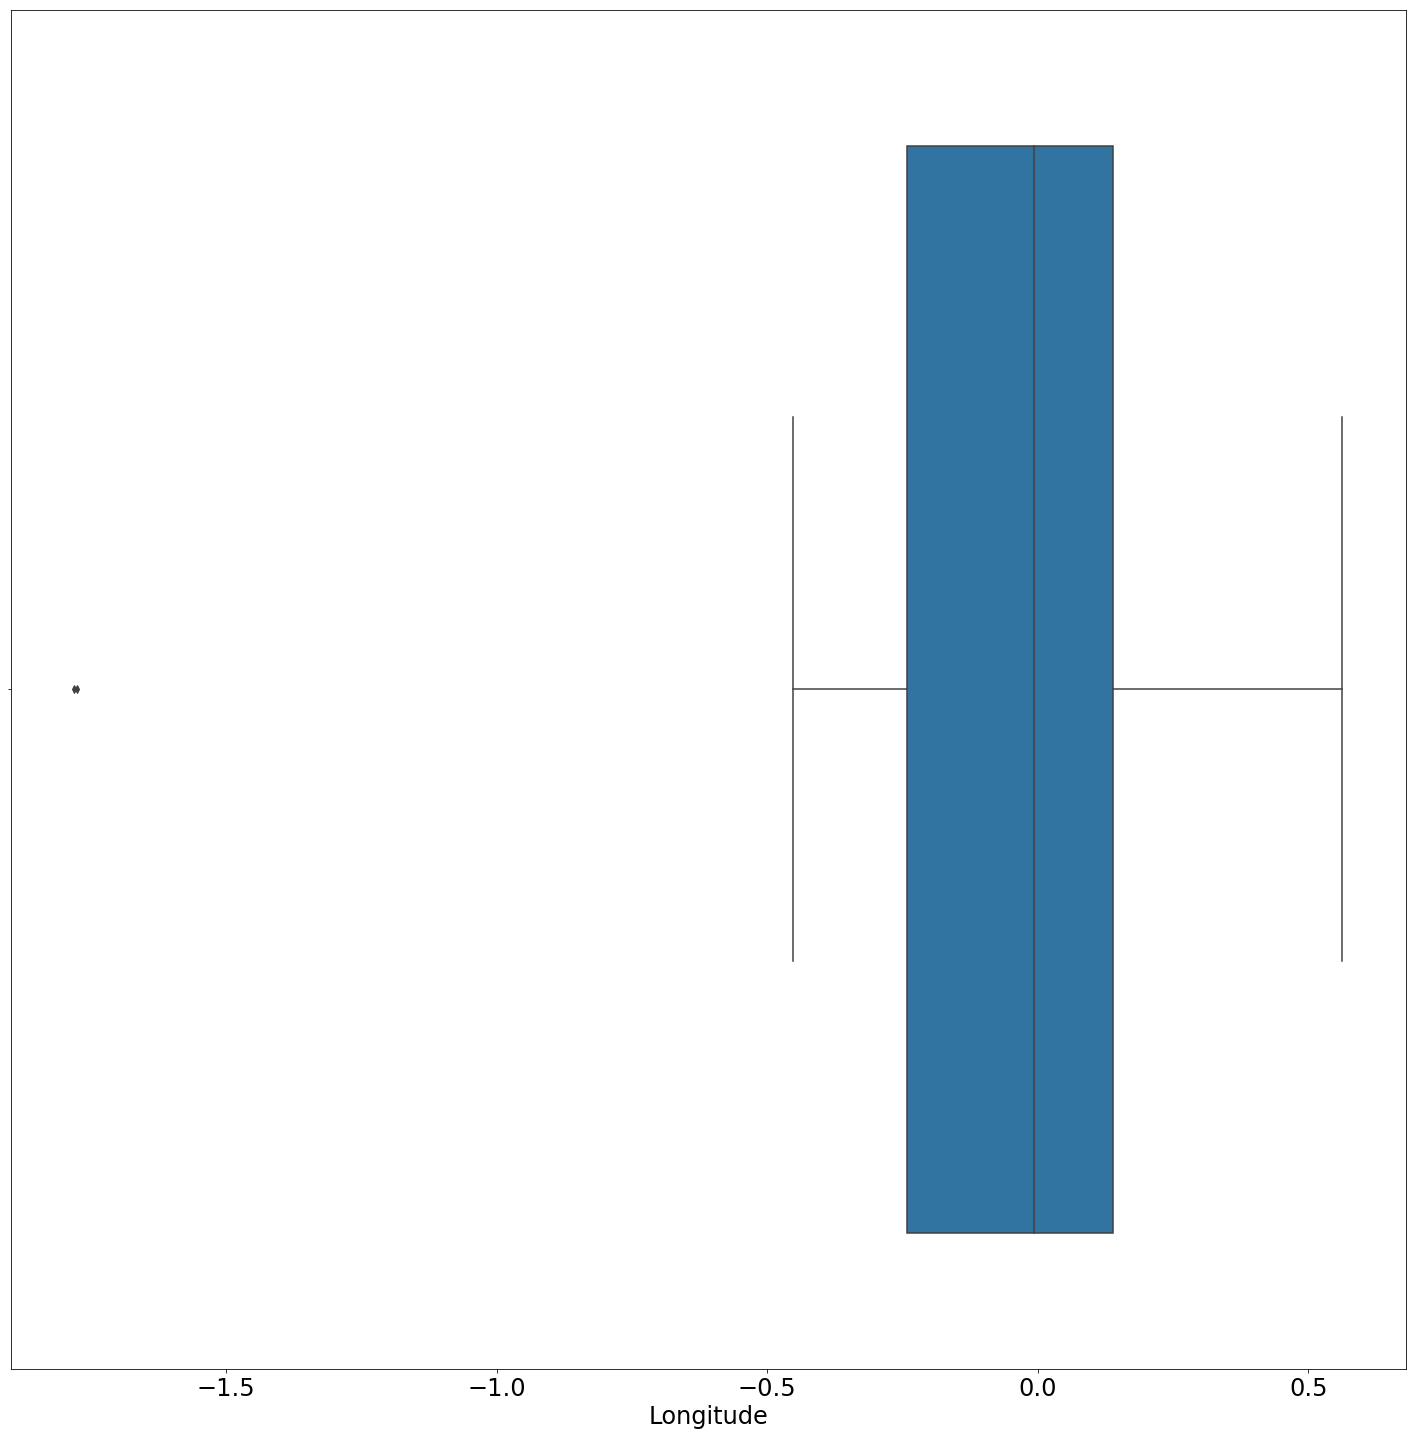

In [64]:
sns.boxplot(x=sas_coord_df['Longitude'])

In [65]:
#remove outliers
#new df where Latitude < 53 and >= 51.8, Longitude > -0.6

new_sas_coord_df = sas_coord_df[(sas_coord_df['Latitude'] < 53) & (sas_coord_df['Latitude'] >= 51.8) & (sas_coord_df['Longitude'] > -0.6)]
new_sas_coord_df.head()

Longitude   Latitude          Dataset
Month                                         
2017-06   0.211098  52.390692  Stop and search
2017-06   0.211098  52.390692  Stop and search
2017-06   0.136415  52.204686  Stop and search
2017-06   0.390497  52.311854  Stop and search
2017-06   0.390497  52.311854  Stop and search

Text(0.5,1,'Stop and search over the year')

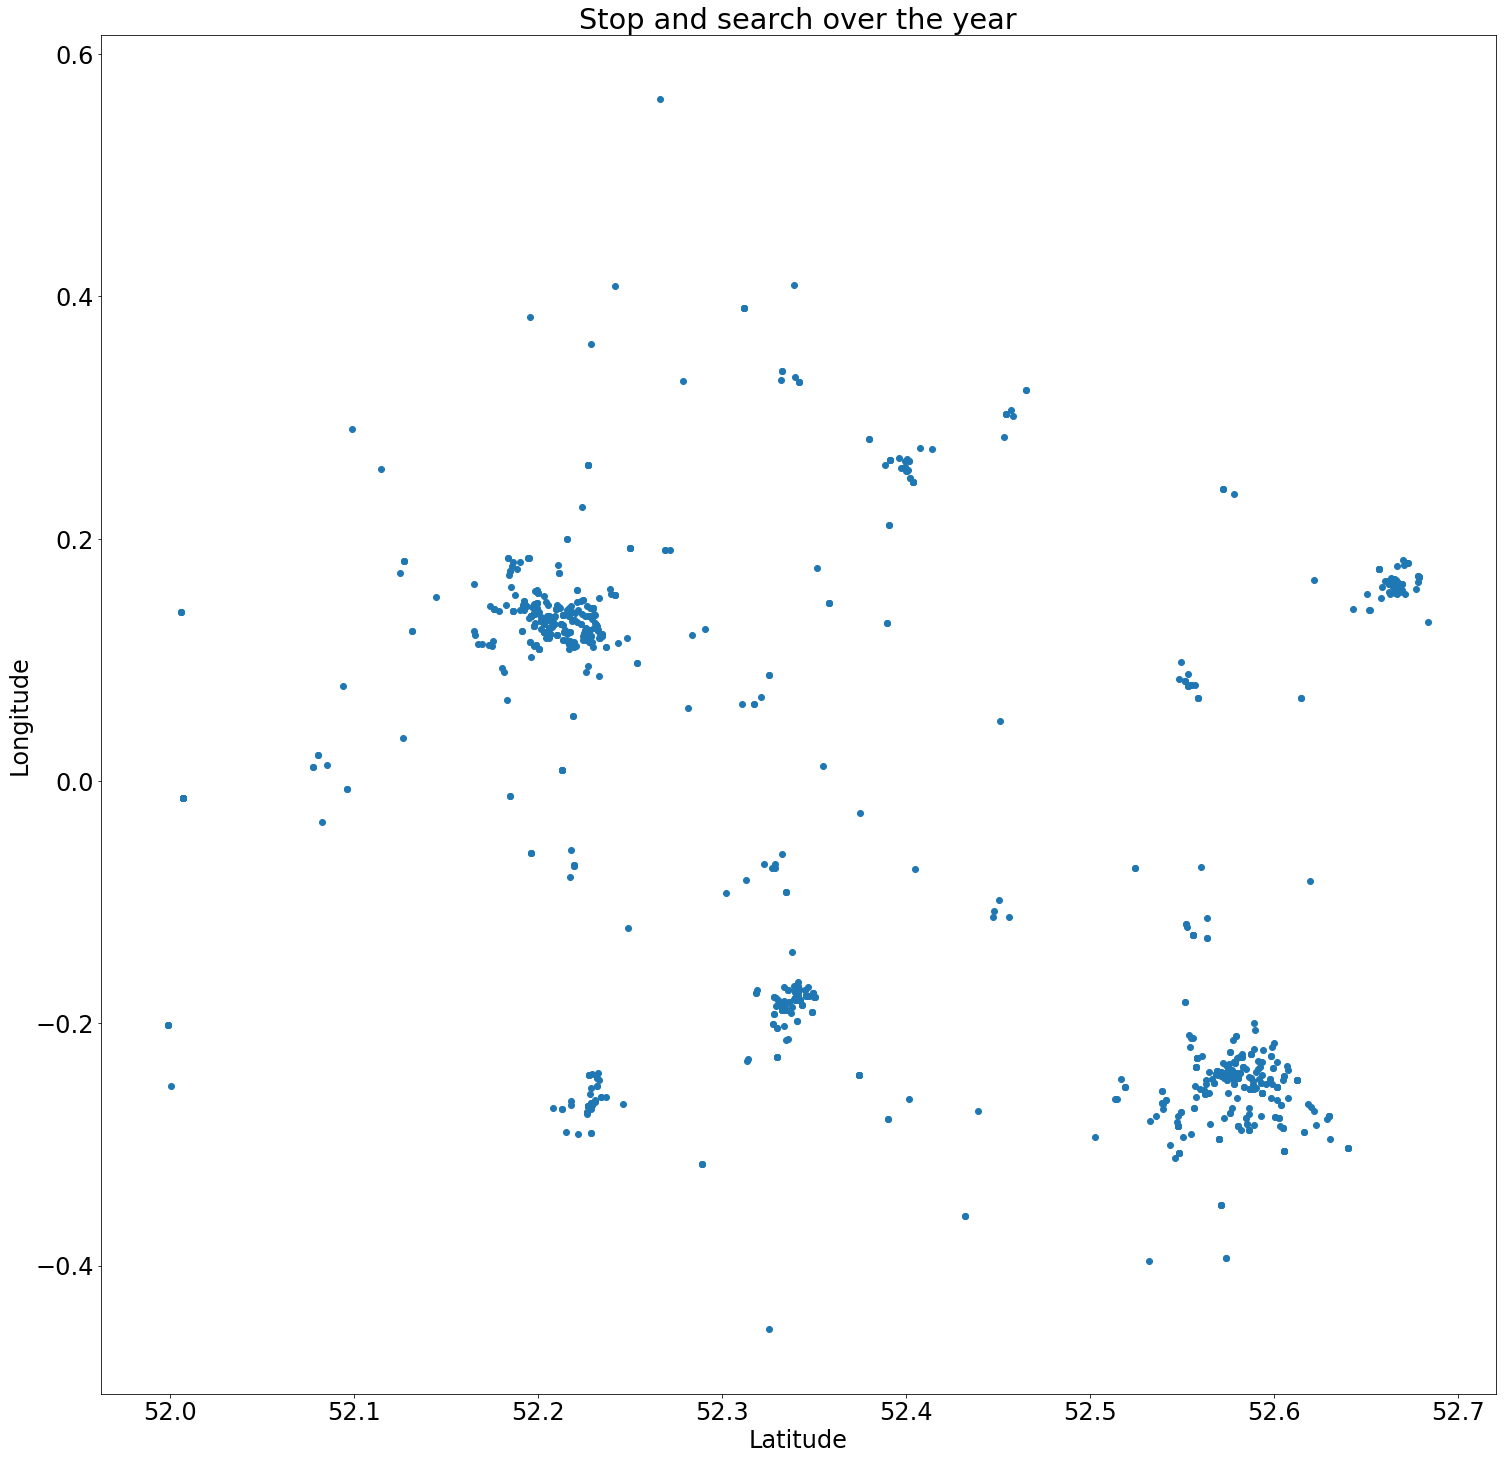

In [66]:
#sas_coord_df
plt.scatter(new_sas_coord_df['Latitude'],
            new_sas_coord_df['Longitude'])

plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.title('Stop and search over the year')

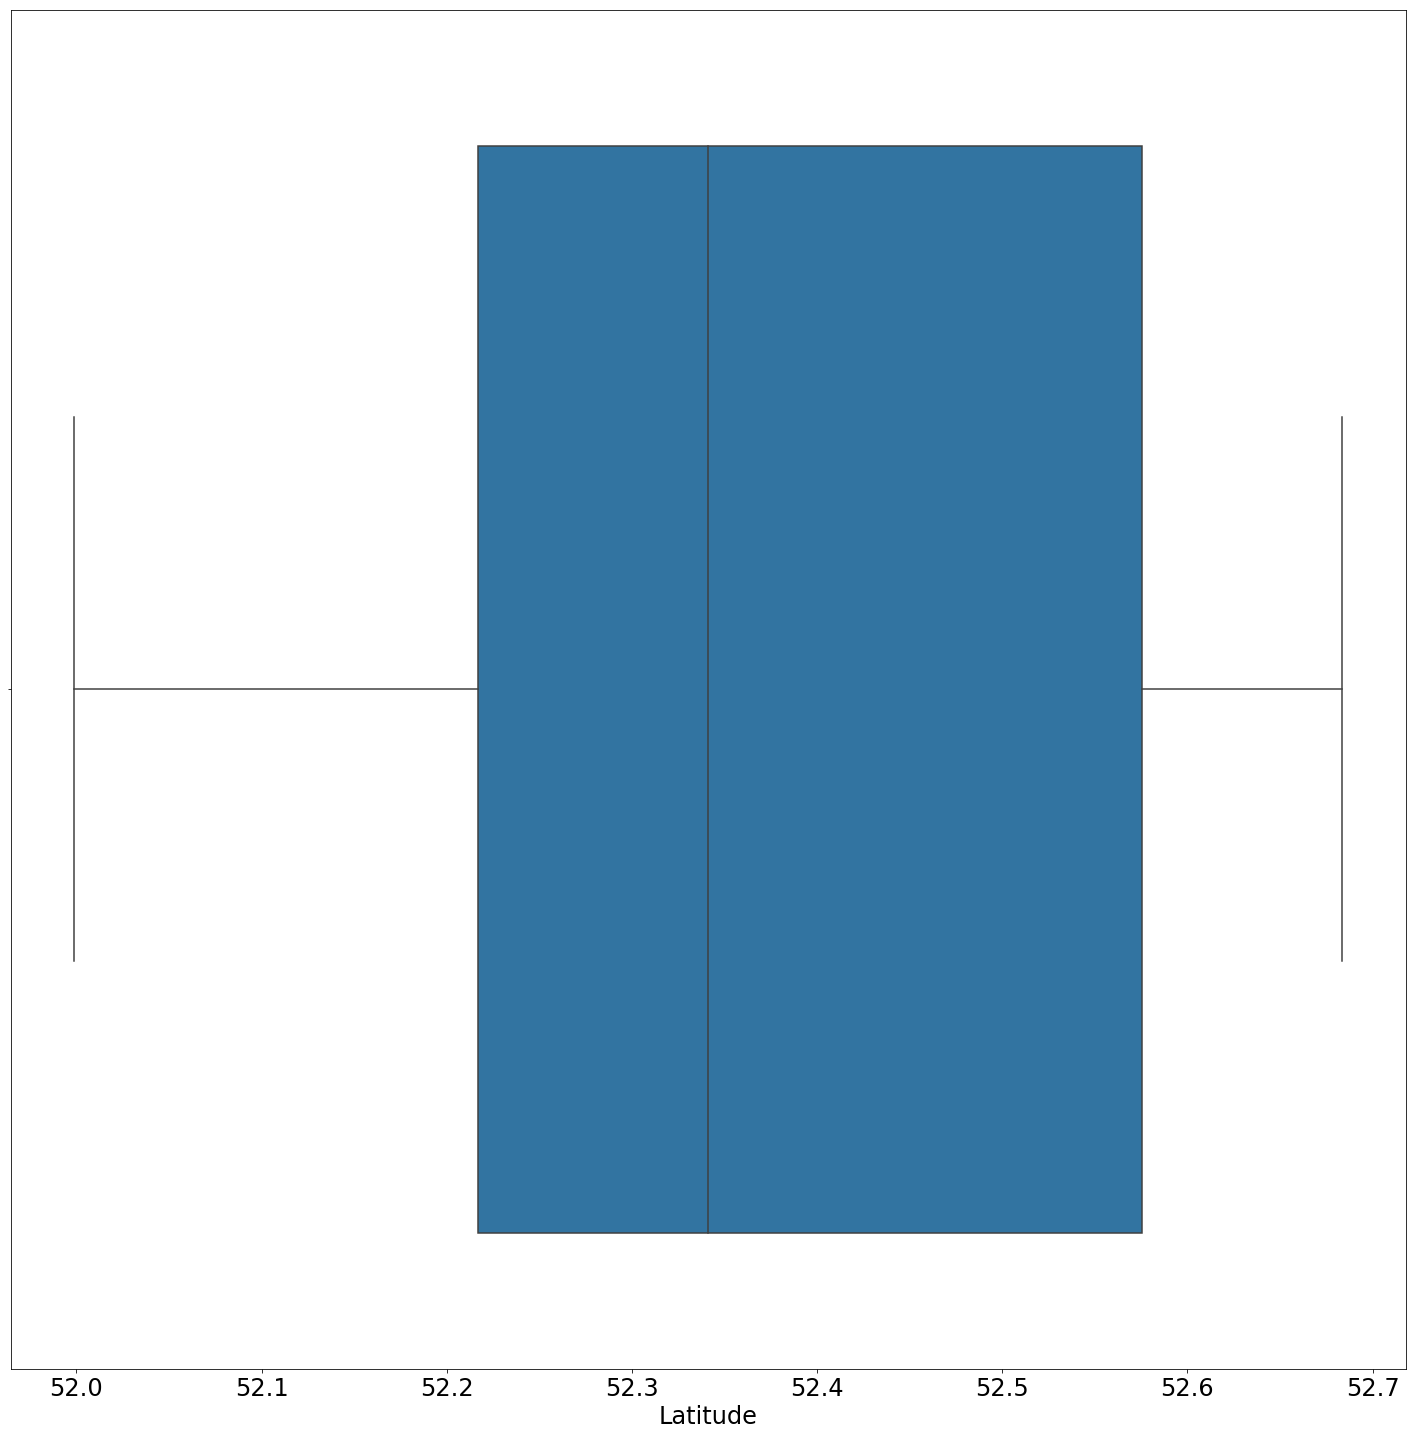

In [67]:
sns.boxplot(x=new_sas_coord_df['Latitude'])

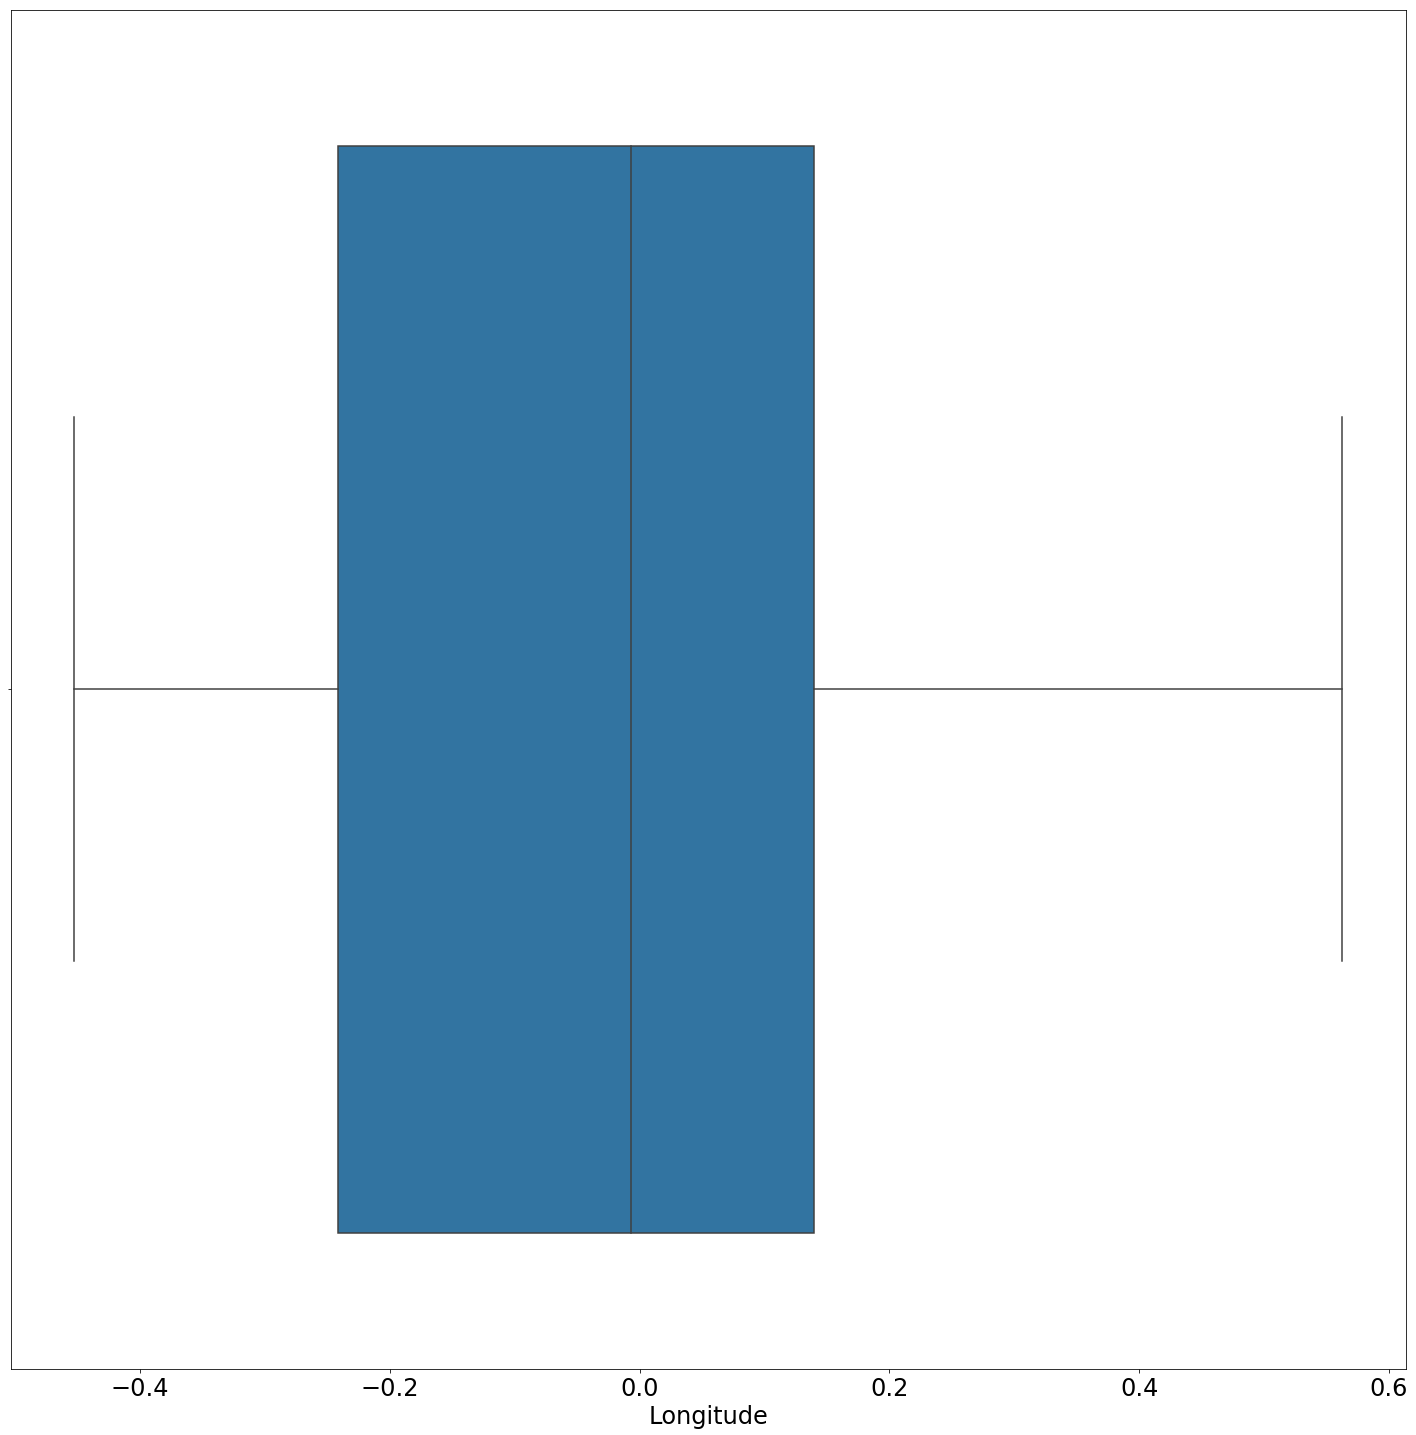

In [68]:
sns.boxplot(x=new_sas_coord_df['Longitude'])

No more outliers in the stop-and-search `DataFrame` as well.

In [69]:
street_coord_df.isna().sum()

Longitude    0
Latitude     0
Dataset      0
dtype: int64

In [70]:
sas_coord_df.isna().sum()

Longitude    5
Latitude     5
Dataset      0
dtype: int64

In [71]:
# Remove the missing Latitude, Longitude values which I forgot to do before
# sas_coord_df.dropna(inplace=True)
# no need

In [72]:
new_sas_coord_df.isna().sum()

Longitude    0
Latitude     0
Dataset      0
dtype: int64

<p><code>K-means</code> clustering</p>

<p>(From the <a href="http://127.0.0.1:35180/notebooks/Part%2021%20Notebooks/21.1%20The%20k-means%20algorithm.ipynb">21.1</a> Notebook)</p>

<p>Let&#39;s start with two clusters<br />
&nbsp;</p>


In [73]:
# Create an instance of the clusterer with k=2
kmeans2 = cluster.KMeans(n_clusters=2)

We need the `Latitude` and `Longitude` columns from `new_street_coord_df`:

In [74]:
new_street_coord_df.head()

Longitude   Latitude       Dataset
Month                                      
2017-06   0.400125  52.048434  Street crime
2017-06   0.135772  52.232788  Street crime
2017-06   0.130128  52.230525  Street crime
2017-06   0.131681  52.229005  Street crime
2017-06   0.136532  52.228485  Street crime

In [75]:
clusteringData_df = new_street_coord_df[['Latitude', 'Longitude']]
clusteringData_df.head()

Latitude  Longitude
Month                        
2017-06  52.048434   0.400125
2017-06  52.232788   0.135772
2017-06  52.230525   0.130128
2017-06  52.229005   0.131681
2017-06  52.228485   0.136532

In [76]:
# Call the fit function on the clusterer to fit the data to the 2 means.
assignedClusters_clust = kmeans2.fit(clusteringData_df)

In [77]:
assignedClusters_clust.labels_
#the points are labelled either 0 or 1

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

[]

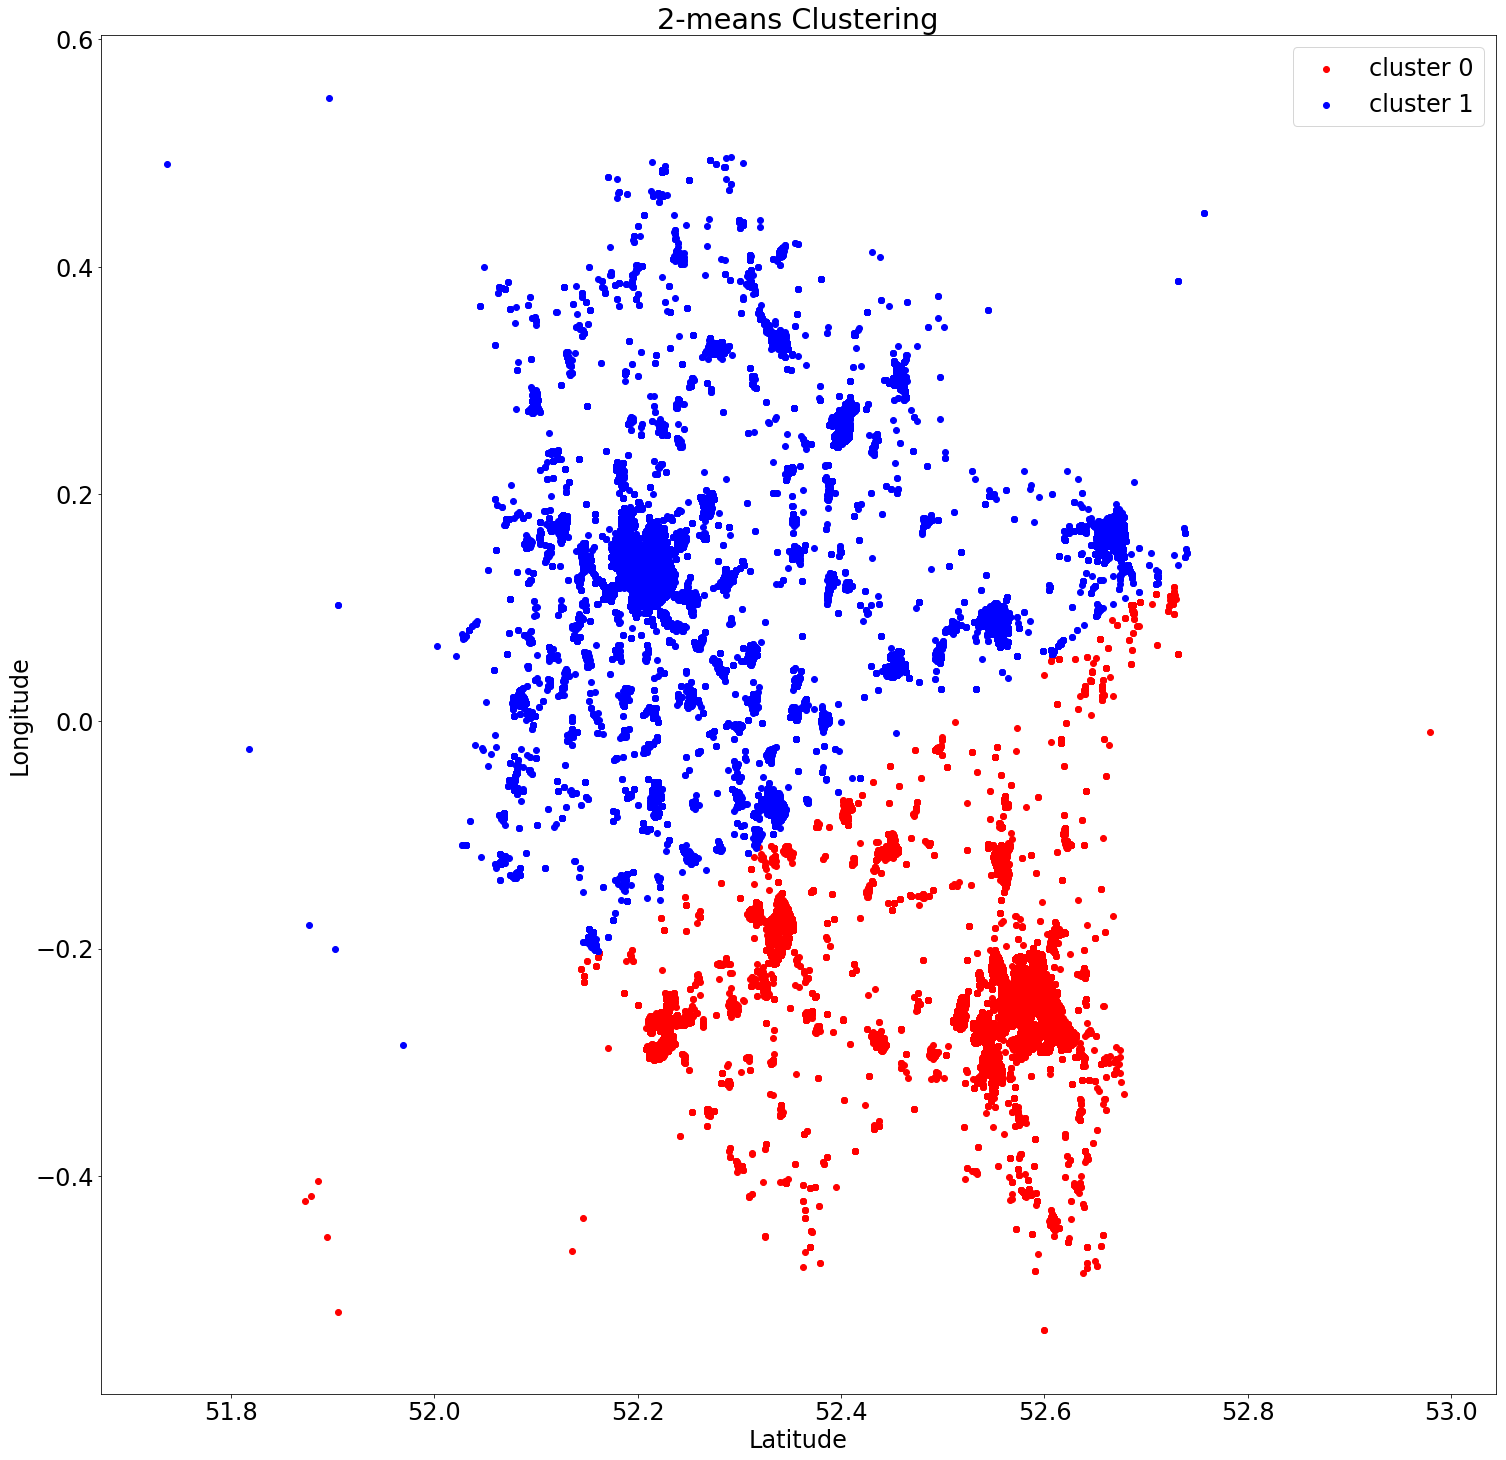

In [78]:
# Plot the data points which in the cluster labelled '0'
plt.scatter(new_street_coord_df['Latitude'][assignedClusters_clust.labels_==0],
            new_street_coord_df['Longitude'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(new_street_coord_df['Latitude'][assignedClusters_clust.labels_==1],
            new_street_coord_df['Longitude'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')

plt.legend()

plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.title('2-means Clustering')

plt.plot()

k = 3

In [79]:
# First, create an instance of the clusterer with k=3
kmeans3 = cluster.KMeans(n_clusters=3)

# Then call the fit function on the clusterer to fit the data to the 3 means.
assignedClusters_clust = kmeans3.fit(clusteringData_df)

# And see how the data points have been assigned to clusters:
assignedClusters_clust.labels_

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

[]

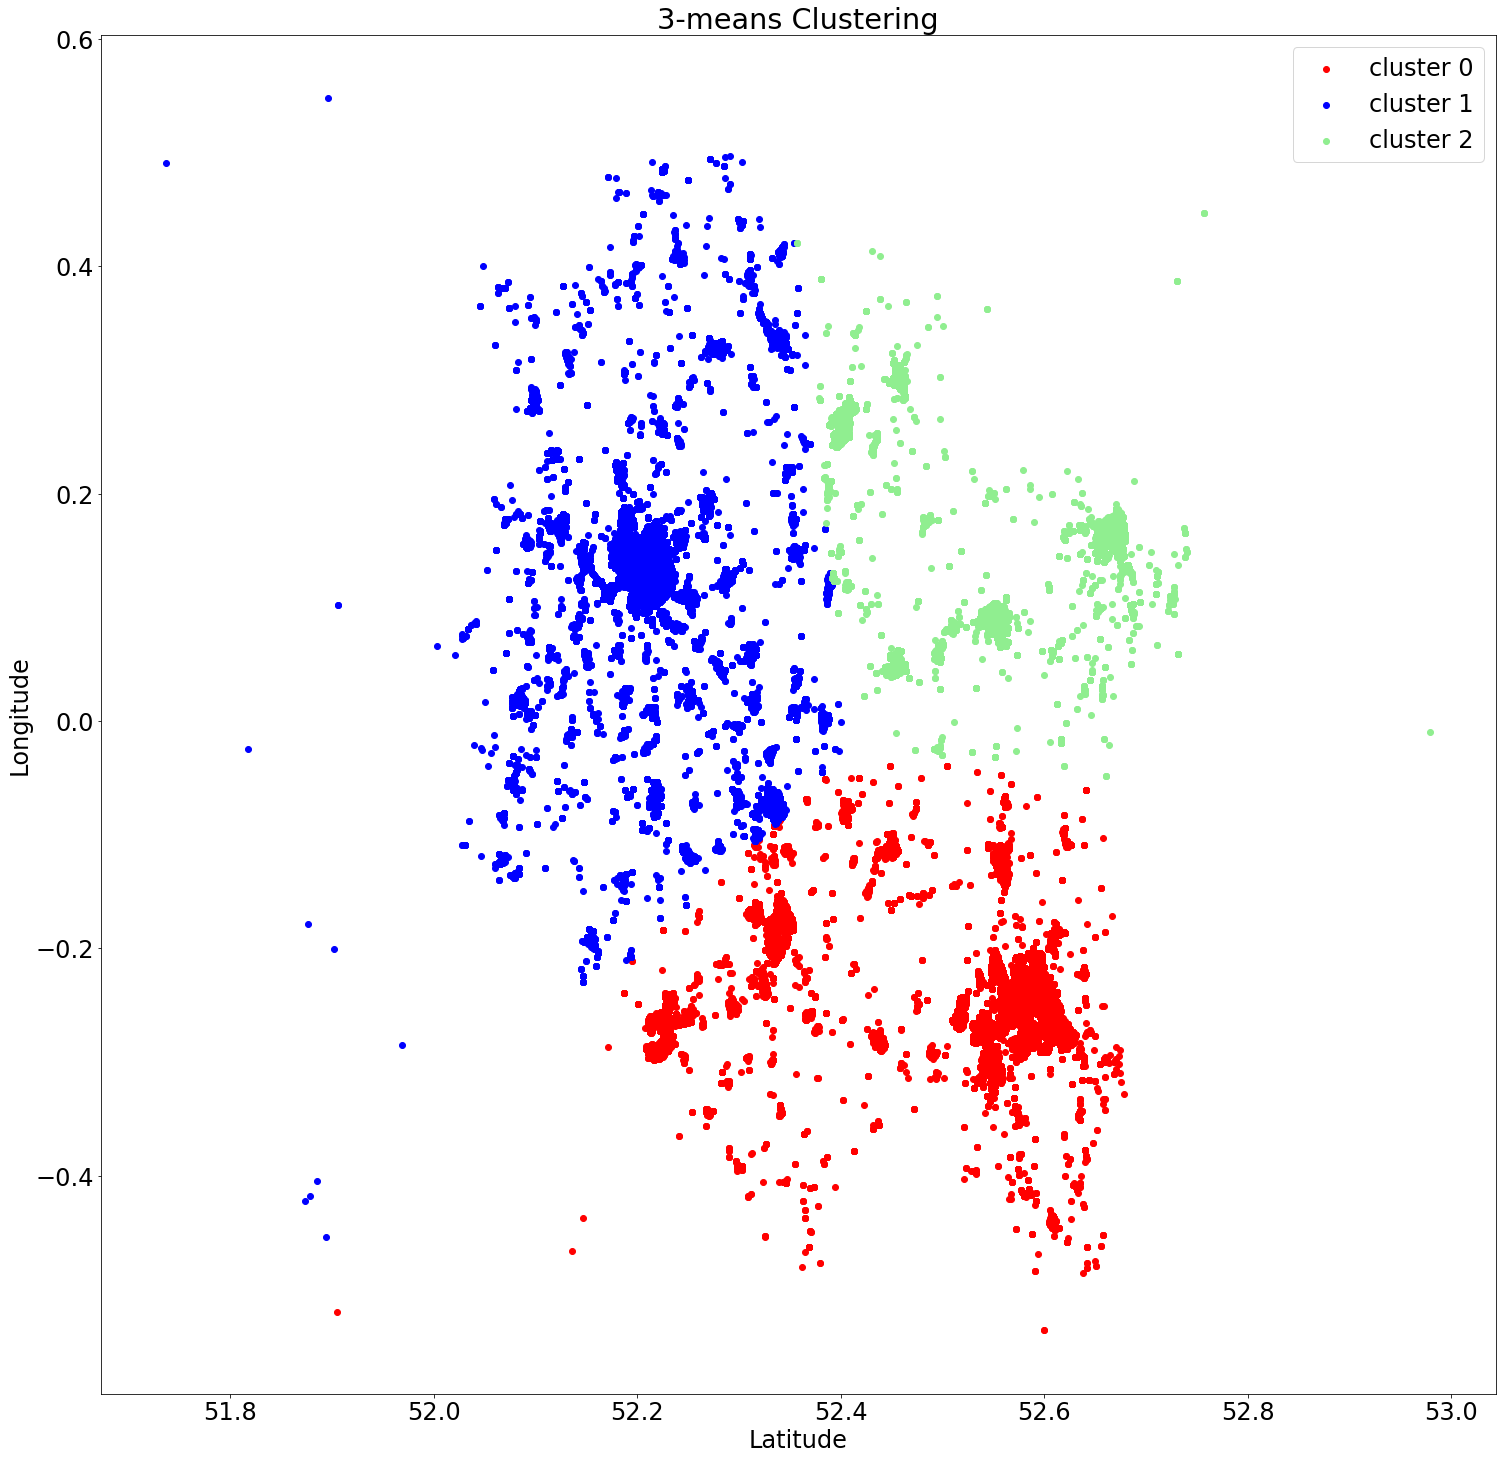

In [80]:
# Plot the data points which in the cluster labelled '0'
plt.scatter(new_street_coord_df['Latitude'][assignedClusters_clust.labels_==0],
            new_street_coord_df['Longitude'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(new_street_coord_df['Latitude'][assignedClusters_clust.labels_==1],
            new_street_coord_df['Longitude'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')


# Plot the data points which in the cluster labelled '2'
plt.scatter(new_street_coord_df['Latitude'][assignedClusters_clust.labels_==2],
            new_street_coord_df['Longitude'][assignedClusters_clust.labels_==2],
            color='lightGreen', marker='o', label='cluster 2')



plt.legend()

plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.title('3-means Clustering')

plt.plot()

In [81]:
kmeans3.cluster_centers_

array([[52.5166466 , -0.24271837],
       [52.21867026,  0.11535033],
       [52.56214567,  0.1559543 ]])

We can add the centroids on to the plot:

[]

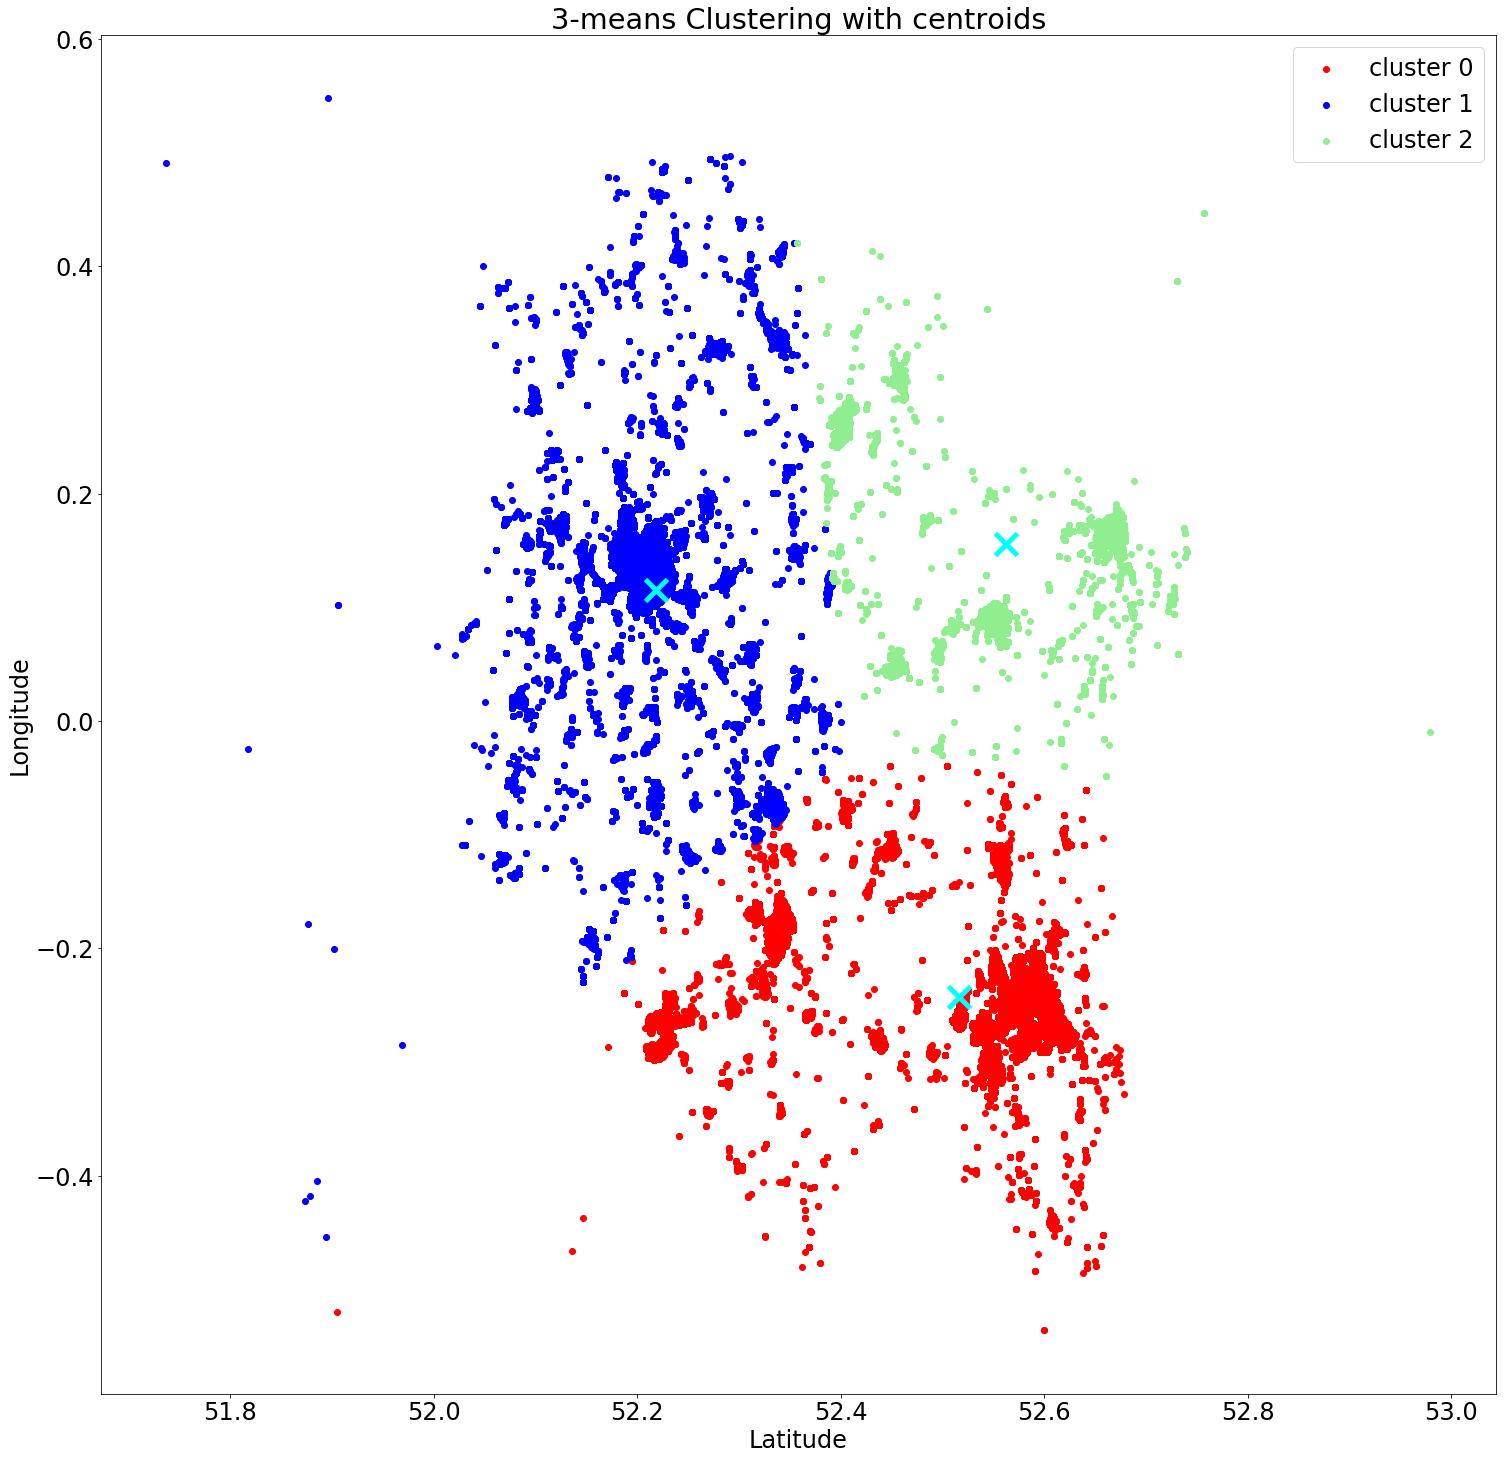

In [82]:
# Plot the data points which in the cluster labelled '0'
plt.scatter(new_street_coord_df['Latitude'][assignedClusters_clust.labels_==0],
            new_street_coord_df['Longitude'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(new_street_coord_df['Latitude'][assignedClusters_clust.labels_==1],
            new_street_coord_df['Longitude'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')


# Plot the data points which in the cluster labelled '2'
plt.scatter(new_street_coord_df['Latitude'][assignedClusters_clust.labels_==2],
            new_street_coord_df['Longitude'][assignedClusters_clust.labels_==2],
            color='lightGreen', marker='o', label='cluster 2')

# Plot each of the centroids:
for (cx, cy) in assignedClusters_clust.cluster_centers_:
    plt.plot(cx, cy, color='cyan', marker='x', mew=5, markersize=22)

plt.legend()

plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.title('3-means Clustering with centroids')

plt.plot()

Let's try k = 5

In [83]:
# First, create an instance of the clusterer with k=5
kmeans5 = cluster.KMeans(n_clusters=5)

# Then call the fit function on the clusterer to fit the data to the 5 means.
assignedClusters_clust = kmeans5.fit(clusteringData_df)

# And see how the data points have been assigned to clusters:
assignedClusters_clust.labels_

array([2, 2, 2, ..., 4, 4, 1], dtype=int32)

[]

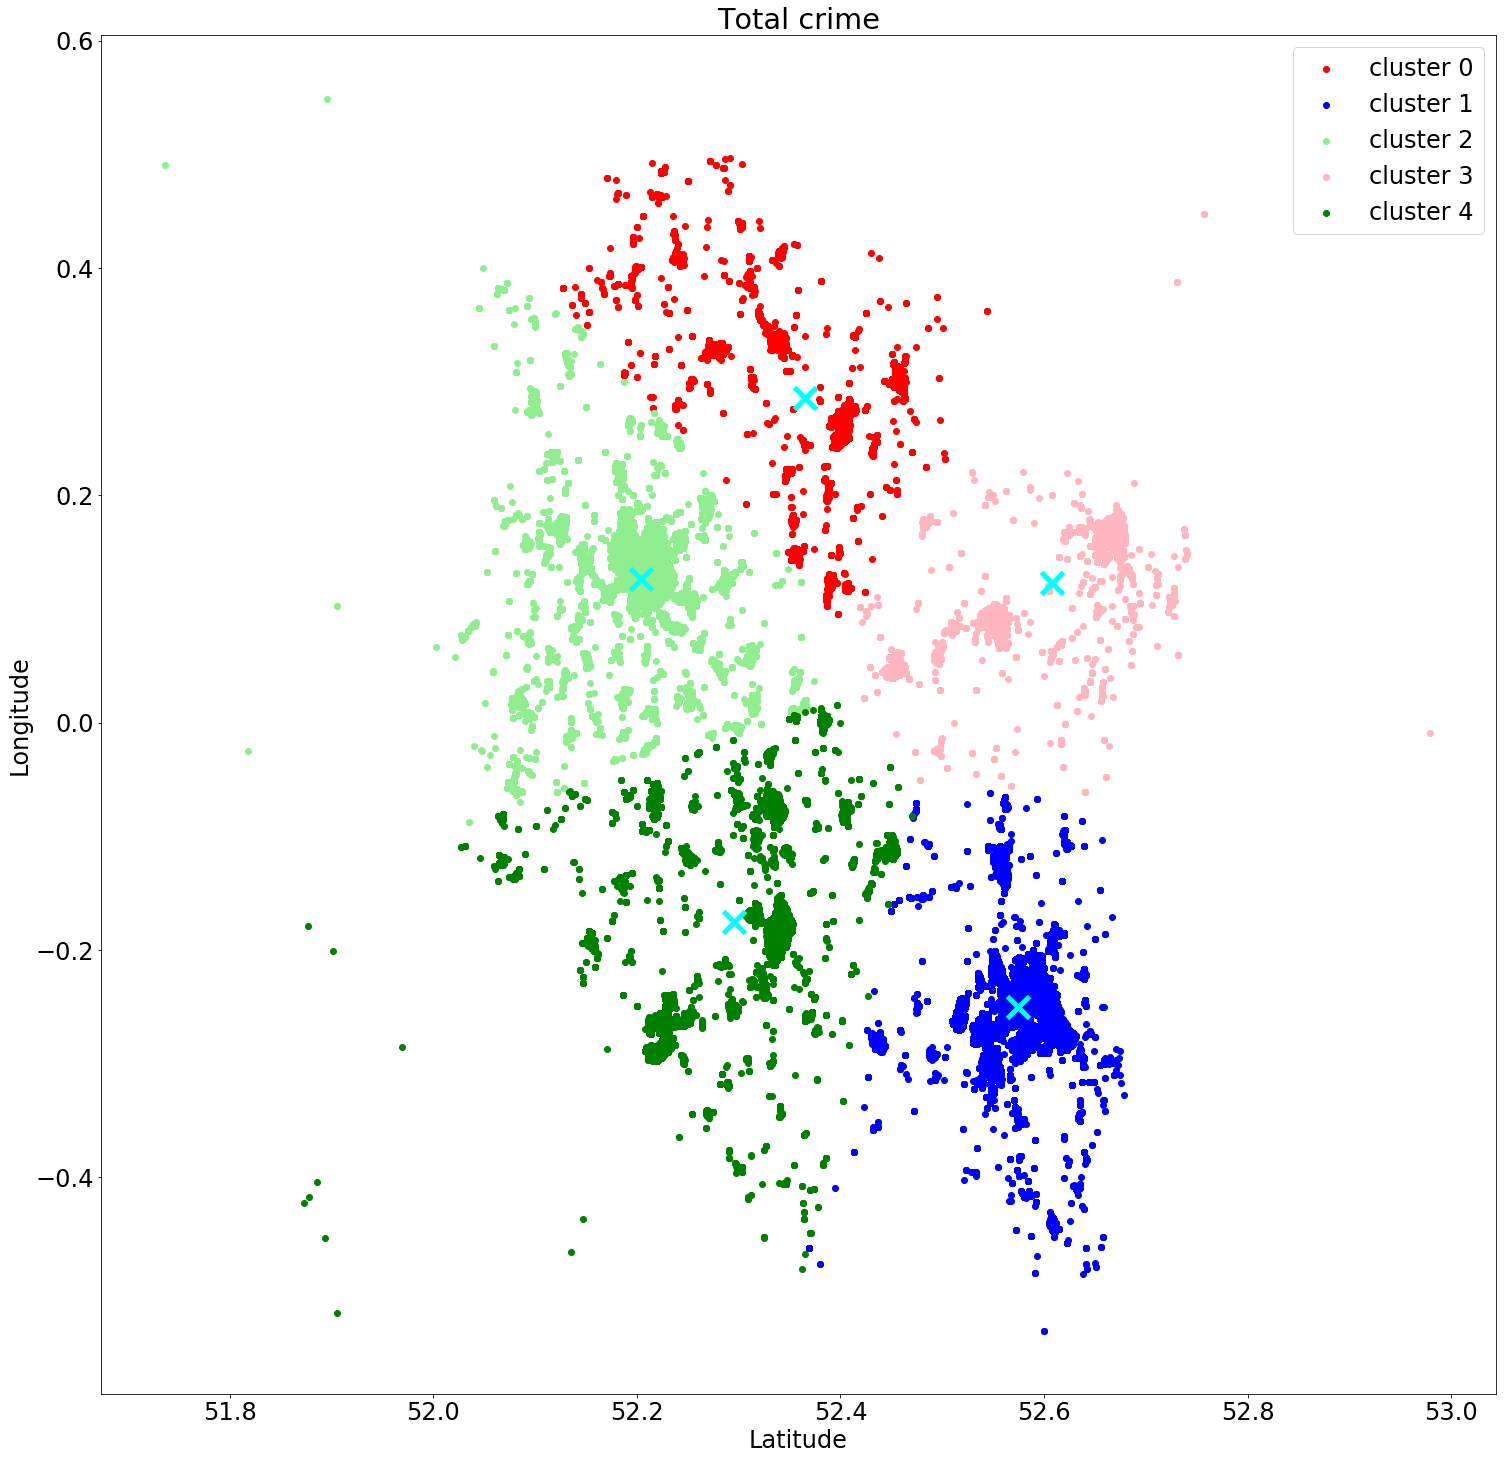

In [84]:
# Plot the data points which in the cluster labelled '0'
plt.scatter(new_street_coord_df['Latitude'][assignedClusters_clust.labels_==0],
            new_street_coord_df['Longitude'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(new_street_coord_df['Latitude'][assignedClusters_clust.labels_==1],
            new_street_coord_df['Longitude'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')


# Plot the data points which in the cluster labelled '2'
plt.scatter(new_street_coord_df['Latitude'][assignedClusters_clust.labels_==2],
            new_street_coord_df['Longitude'][assignedClusters_clust.labels_==2],
            color='lightGreen', marker='o', label='cluster 2')

# Plot the data points which in the cluster labelled '3'
plt.scatter(new_street_coord_df['Latitude'][assignedClusters_clust.labels_==3],
            new_street_coord_df['Longitude'][assignedClusters_clust.labels_==3],
            color='lightpink', marker='o', label='cluster 3')

# Plot the data points which in the cluster labelled '4'
plt.scatter(new_street_coord_df['Latitude'][assignedClusters_clust.labels_==4],
            new_street_coord_df['Longitude'][assignedClusters_clust.labels_==4],
            color='green', marker='o', label='cluster 4')

# Plot each of the centroids:
for (cx, cy) in assignedClusters_clust.cluster_centers_:
    plt.plot(cx, cy, color='cyan', marker='x', mew=5, markersize=22)



plt.legend()

plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.title('Total crime')

plt.plot()

In [85]:
clusteringData_df = new_sas_coord_df[['Latitude', 'Longitude']]
clusteringData_df.head()

Latitude  Longitude
Month                        
2017-06  52.390692   0.211098
2017-06  52.390692   0.211098
2017-06  52.204686   0.136415
2017-06  52.311854   0.390497
2017-06  52.311854   0.390497

In [86]:
# Continue with stop and search data
# First, create an instance of the clusterer with k=2
kmeans2 = cluster.KMeans(n_clusters=2)

# Then call the fit function on the clusterer to fit the data to the 2 means.
assignedClusters_clust = kmeans2.fit(clusteringData_df)

# And see how the data points have been assigned to clusters:
assignedClusters_clust.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

[]

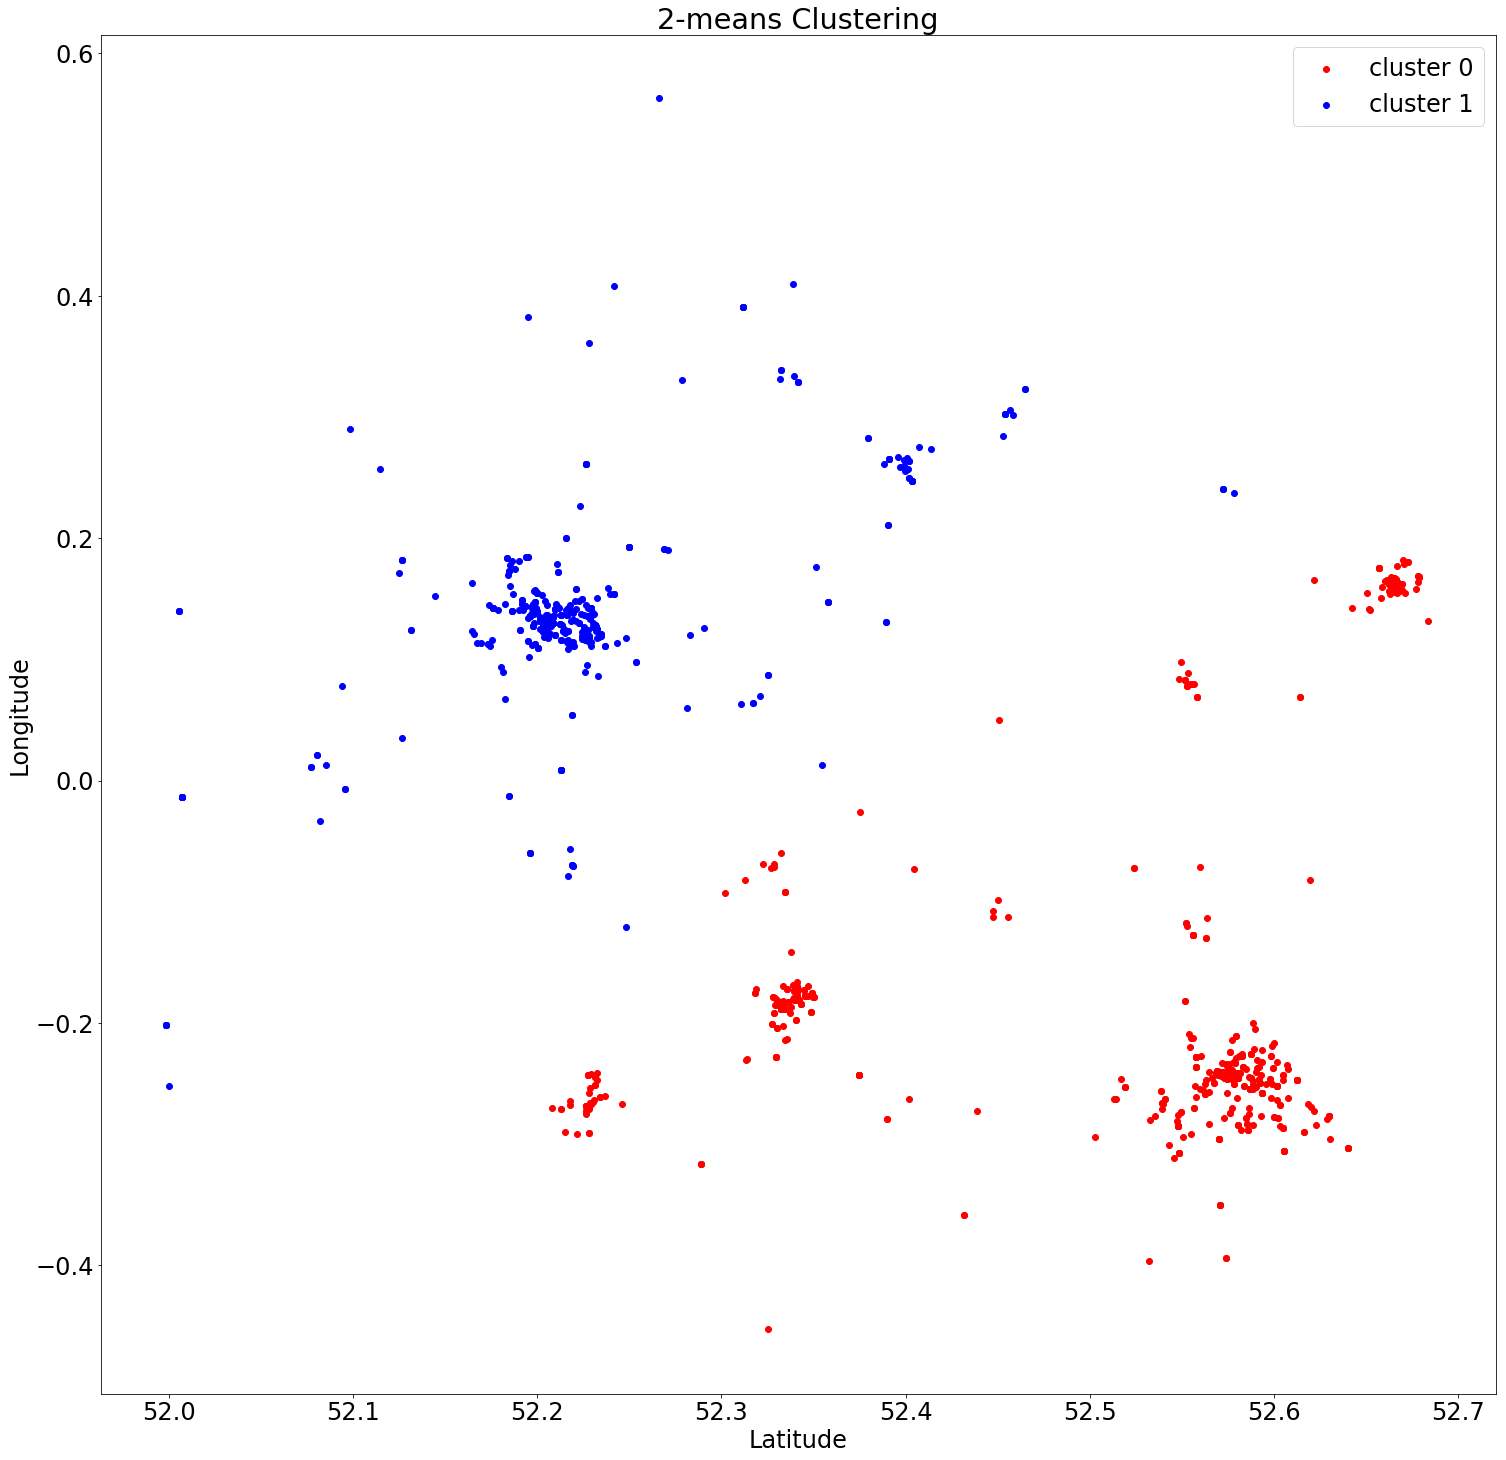

In [87]:
# Plot the data points which in the cluster labelled '0'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==0],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==1],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')

plt.legend()

plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.title('2-means Clustering')

plt.plot()


Try k =5

In [88]:
# First, create an instance of the clusterer with k=5
kmeans5 = cluster.KMeans(n_clusters=5)

# Then call the fit function on the clusterer to fit the data to the 5 means.
assignedClusters_clust = kmeans5.fit(clusteringData_df)

# And see how the data points have been assigned to clusters:
assignedClusters_clust.labels_

array([4, 4, 2, ..., 0, 0, 0], dtype=int32)

[]

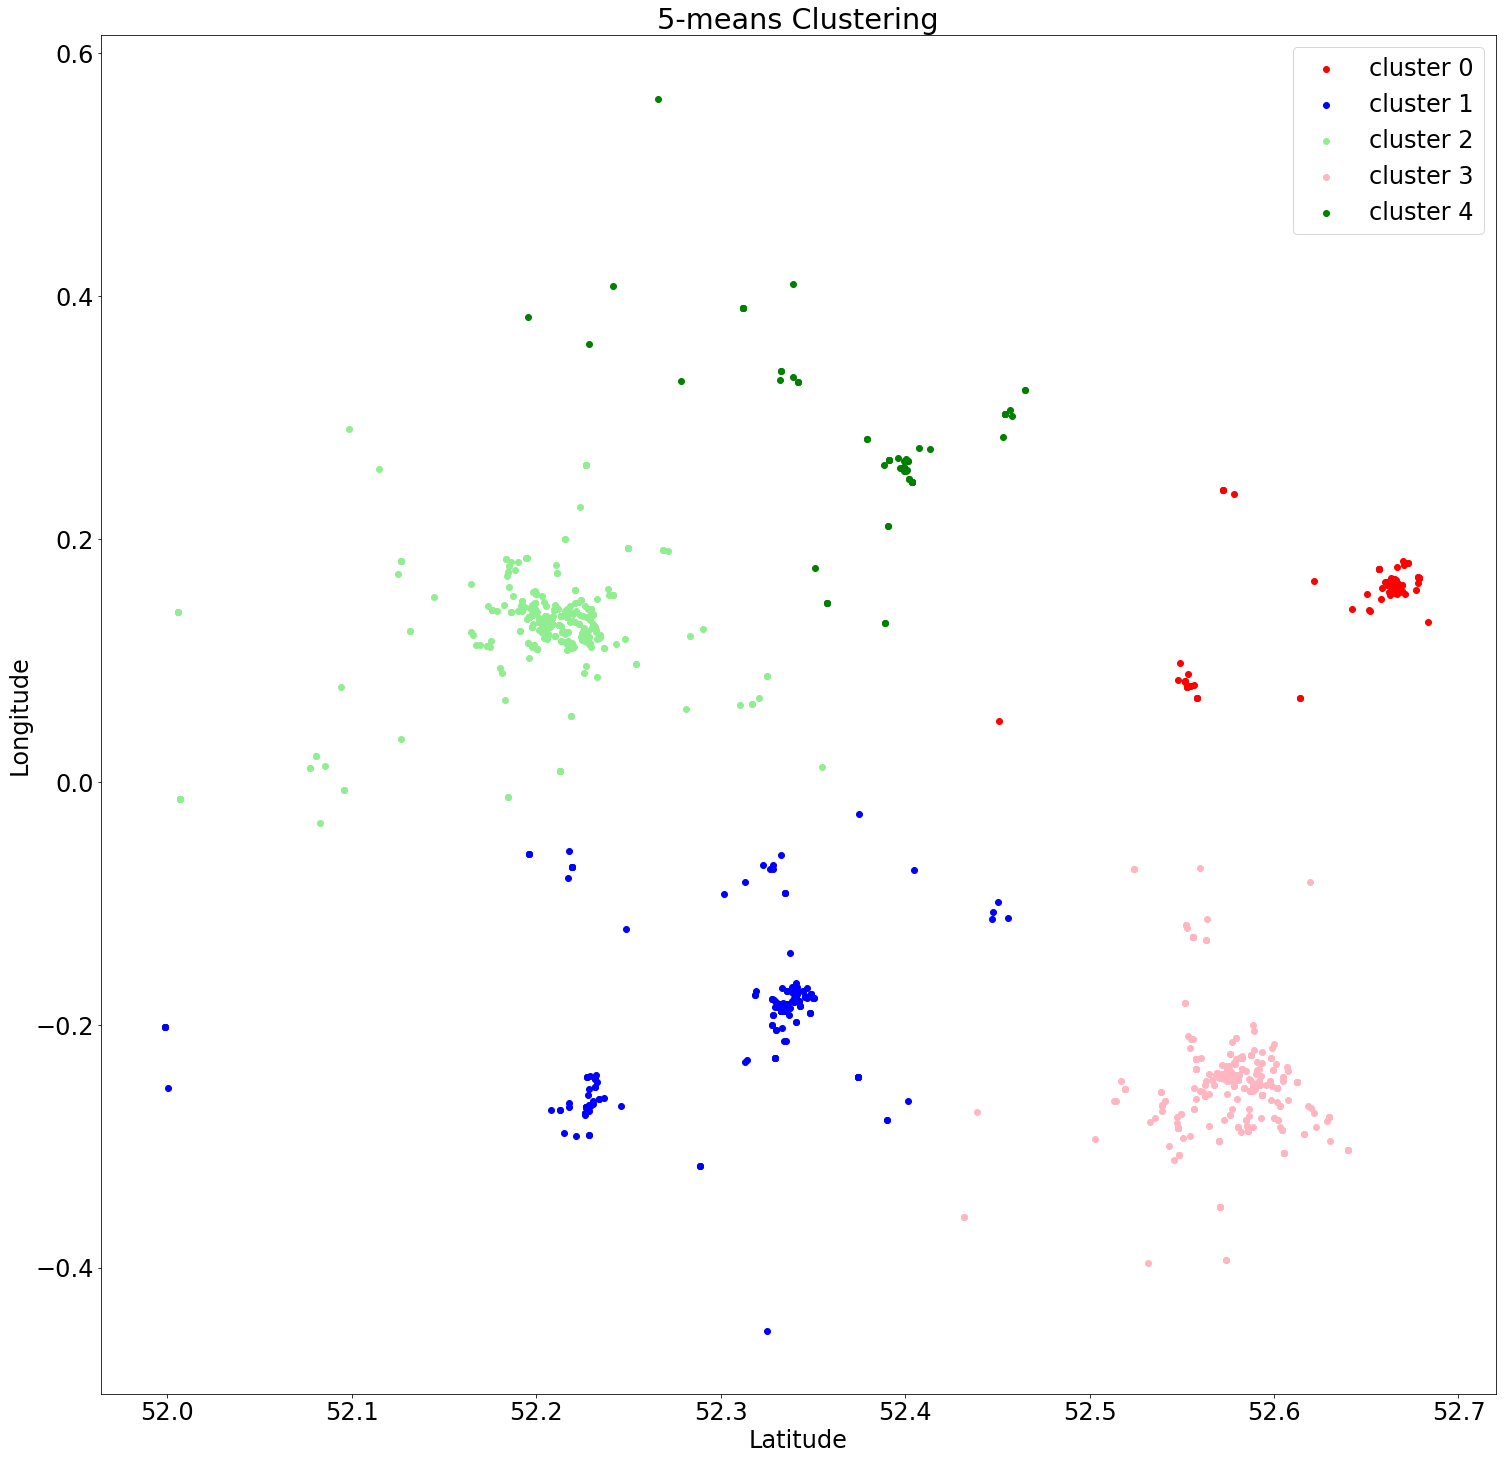

In [89]:
# Plot the data points which in the cluster labelled '0'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==0],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==1],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')


# Plot the data points which in the cluster labelled '2'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==2],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==2],
            color='lightGreen', marker='o', label='cluster 2')

# Plot the data points which in the cluster labelled '3'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==3],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==3],
            color='lightpink', marker='o', label='cluster 3')

# Plot the data points which in the cluster labelled '4'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==4],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==4],
            color='green', marker='o', label='cluster 4')



plt.legend()

plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.title('5-means Clustering')

plt.plot()

When we look at both street crime and stop-and-search cluster visualisations, it is apparent that there are several dense clusters that are in both plots. It means that police is searching in the places where crime is happening.

When we look at the maps (previously), those places appear to be cities/more densely populated areas.

In [90]:
# get the drug_arrest_df from the stop-and-search notebook
drug_arrests_df = sas_df.loc[(sas_df['Object of search'] == 'Controlled drugs') 
                             & ((sas_df['Outcome'] == 'Arrest') | (sas_df['Outcome'] == 'Suspect arrested'))]


drug_arrests_df['Outcome'].count()

105

In [91]:
drug_arrests_df = drug_arrests_df.dropna(axis=0, subset=['Longitude'])
drug_arrests_df = drug_arrests_df.reset_index()
drug_arrests_df.isna().sum()

index                                         0
Type                                          0
Date                                          0
Part of a policing operation                 99
Policing operation                          104
Latitude                                      0
Longitude                                     0
Gender                                       12
Age range                                    11
Self-defined ethnicity                       15
Officer-defined ethnicity                    13
Legislation                                   0
Object of search                              0
Outcome                                       0
Outcome linked to object of search           13
Removal of more than just outer clothing     11
Month                                         0
dtype: int64

In [92]:
drug_arrests_df.count()

index                                       104
Type                                        104
Date                                        104
Part of a policing operation                  5
Policing operation                            0
Latitude                                    104
Longitude                                   104
Gender                                       92
Age range                                    93
Self-defined ethnicity                       89
Officer-defined ethnicity                    91
Legislation                                 104
Object of search                            104
Outcome                                     104
Outcome linked to object of search           91
Removal of more than just outer clothing     93
Month                                       104
dtype: int64

Try k = 7

In [93]:
# First, create an instance of the clusterer with k=7
kmeans7 = cluster.KMeans(n_clusters=7)

# Then call the fit function on the clusterer to fit the data to the 7 means.
assignedClusters_clust = kmeans7.fit(clusteringData_df)

# And see how the data points have been assigned to clusters:
assignedClusters_clust.labels_

array([5, 5, 1, ..., 2, 2, 2], dtype=int32)

[]

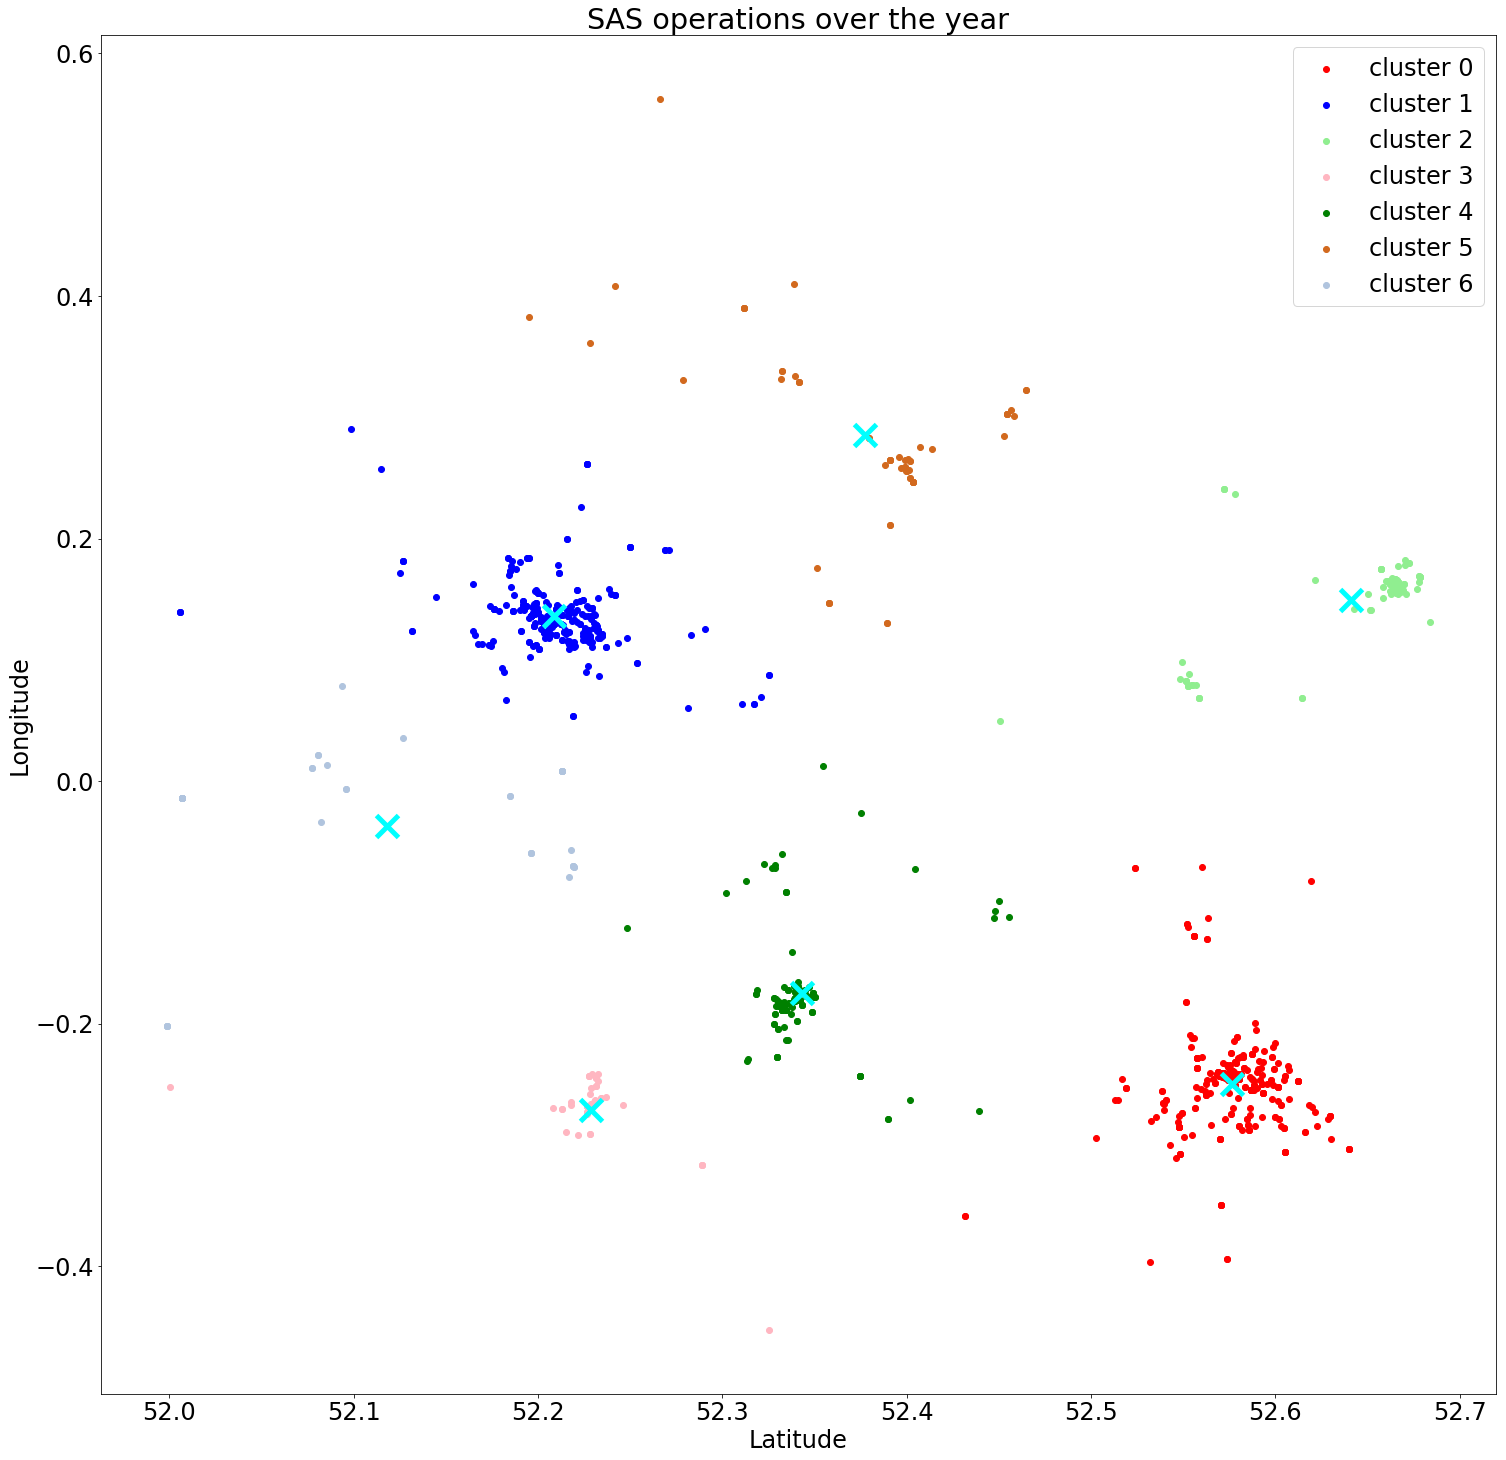

In [94]:
# Plot the data points which in the cluster labelled '0'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==0],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==1],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')


# Plot the data points which in the cluster labelled '2'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==2],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==2],
            color='lightGreen', marker='o', label='cluster 2')

# Plot the data points which in the cluster labelled '3'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==3],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==3],
            color='lightpink', marker='o', label='cluster 3')

# Plot the data points which in the cluster labelled '4'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==4],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==4],
            color='green', marker='o', label='cluster 4')

# Plot the data points which in the cluster labelled '5'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==5],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==5],
            color='chocolate', marker='o', label='cluster 5')

# Plot the data points which in the cluster labelled '6'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==6],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==6],
            color='lightsteelblue', marker='o', label='cluster 6')


# Plot each of the centroids:
for (cx, cy) in assignedClusters_clust.cluster_centers_:
    plt.plot(cx, cy, color='cyan', marker='x', mew=5, markersize=22)
    
# Plot the controlled drug arrests
#plt.scatter(drug_arrests_df['Latitude'],
#            drug_arrests_df['Longitude'],
#            color='dimgray', marker='D', label='Arrests', s=22)


#plt.plot(drug_arrests_df['Latitude'], drug_arrests_df['Longitude'], color='dimgray', marker='D', mew=5, markersize=22)


plt.legend()

plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.title('SAS operations over the year')

plt.plot()

### How efficient are the stop-and-search operations in fighting organised drug crime?
Here I am looking at searches and where the arrests (that are related to searching for drugs) take place.

[]

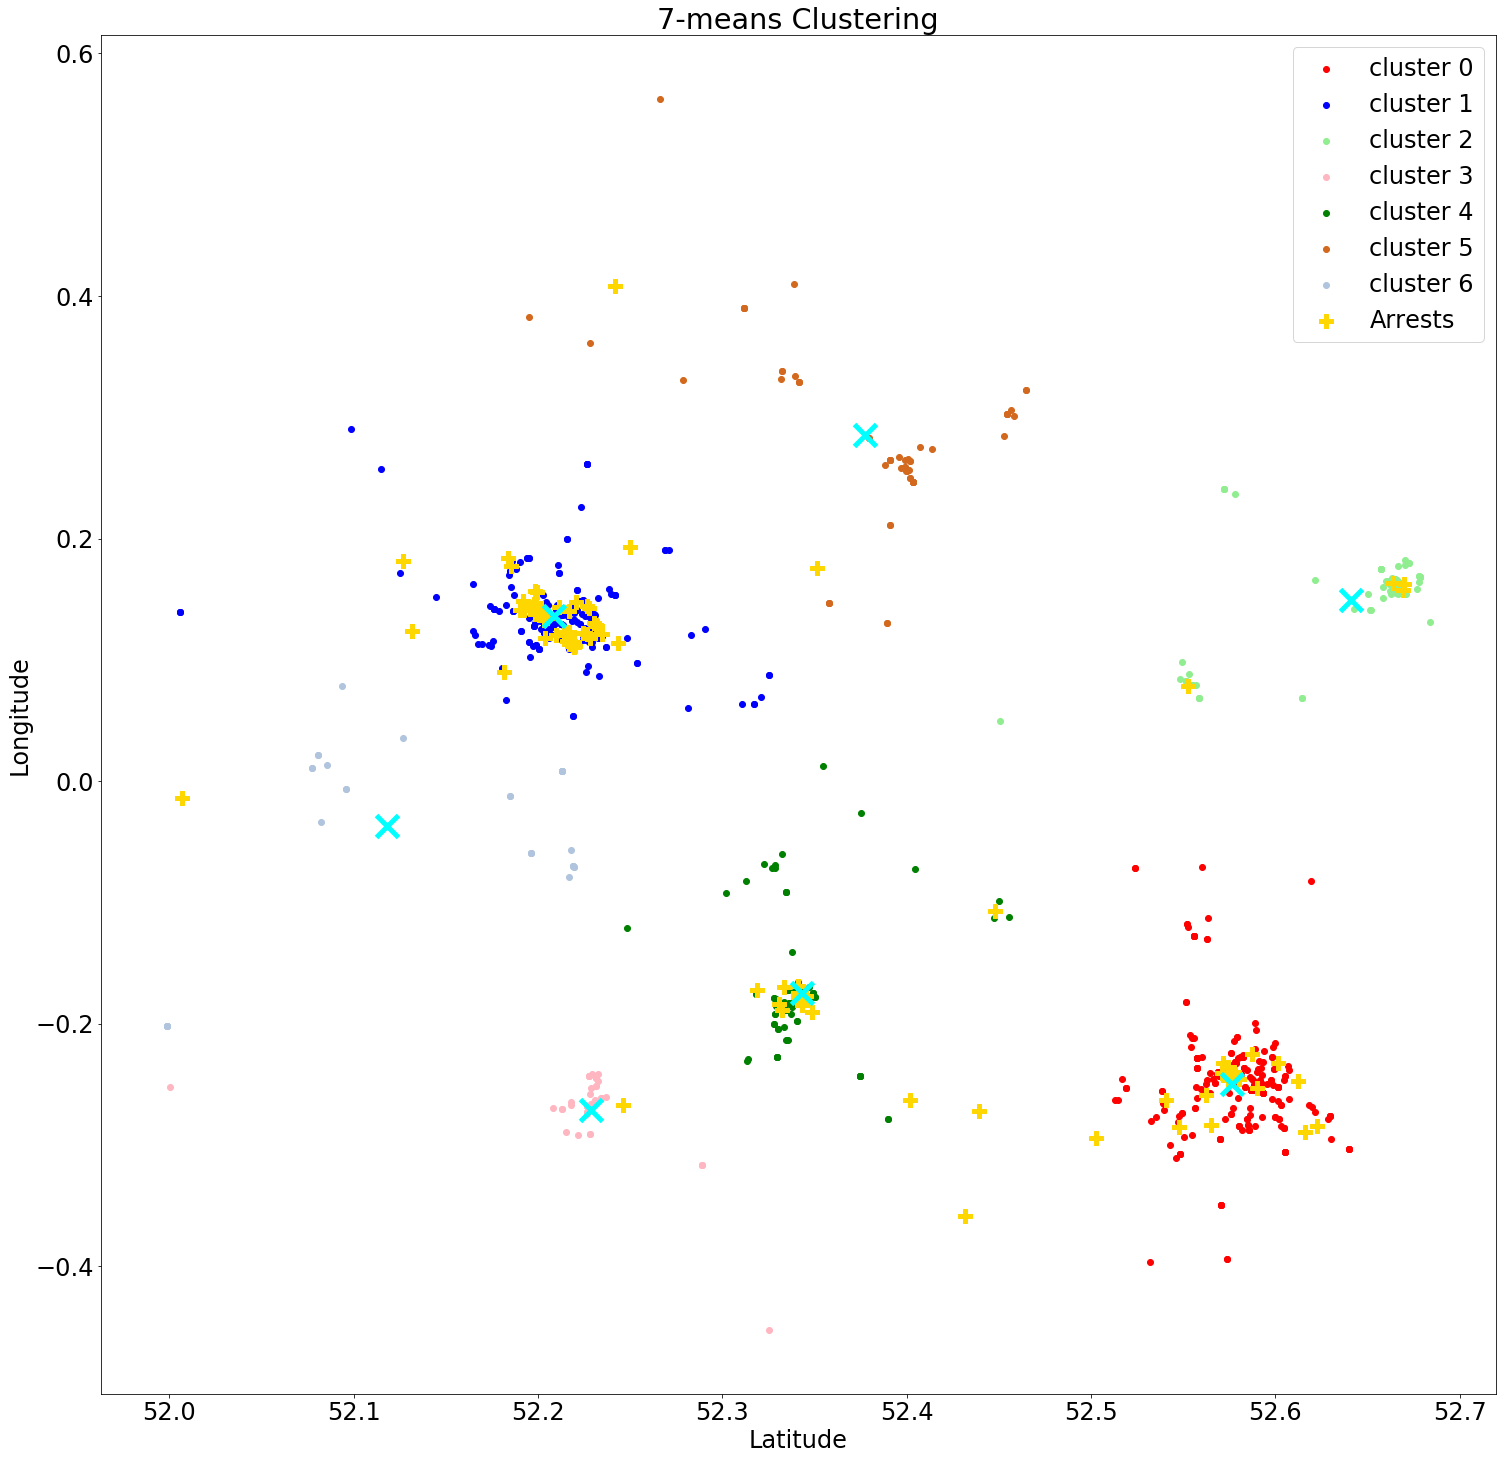

In [95]:
# Plot the data points which in the cluster labelled '0'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==0],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==0],
            color='red', marker='o', label='cluster 0')

# Plot the data points which in the cluster labelled '1'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==1],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==1],
            color='blue', marker='o', label='cluster 1')


# Plot the data points which in the cluster labelled '2'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==2],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==2],
            color='lightGreen', marker='o', label='cluster 2')

# Plot the data points which in the cluster labelled '3'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==3],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==3],
            color='lightpink', marker='o', label='cluster 3')

# Plot the data points which in the cluster labelled '4'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==4],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==4],
            color='green', marker='o', label='cluster 4')

# Plot the data points which in the cluster labelled '5'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==5],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==5],
            color='chocolate', marker='o', label='cluster 5')

# Plot the data points which in the cluster labelled '6'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==6],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==6],
            color='lightsteelblue', marker='o', label='cluster 6')


# Plot each of the centroids:
for (cx, cy) in assignedClusters_clust.cluster_centers_:
    plt.plot(cx, cy, color='cyan', marker='x', mew=5, markersize=22)
    
# Plot the controlled drug arrests
arrests = plt.scatter(drug_arrests_df['Latitude'],
            drug_arrests_df['Longitude'],
            color='gold', marker='P', label='Arrests', s=200)



plt.legend()

plt.xlabel('Latitude')
plt.ylabel('Longitude')

plt.title('7-means Clustering')

plt.plot()

Use a better colour scheme:

[]

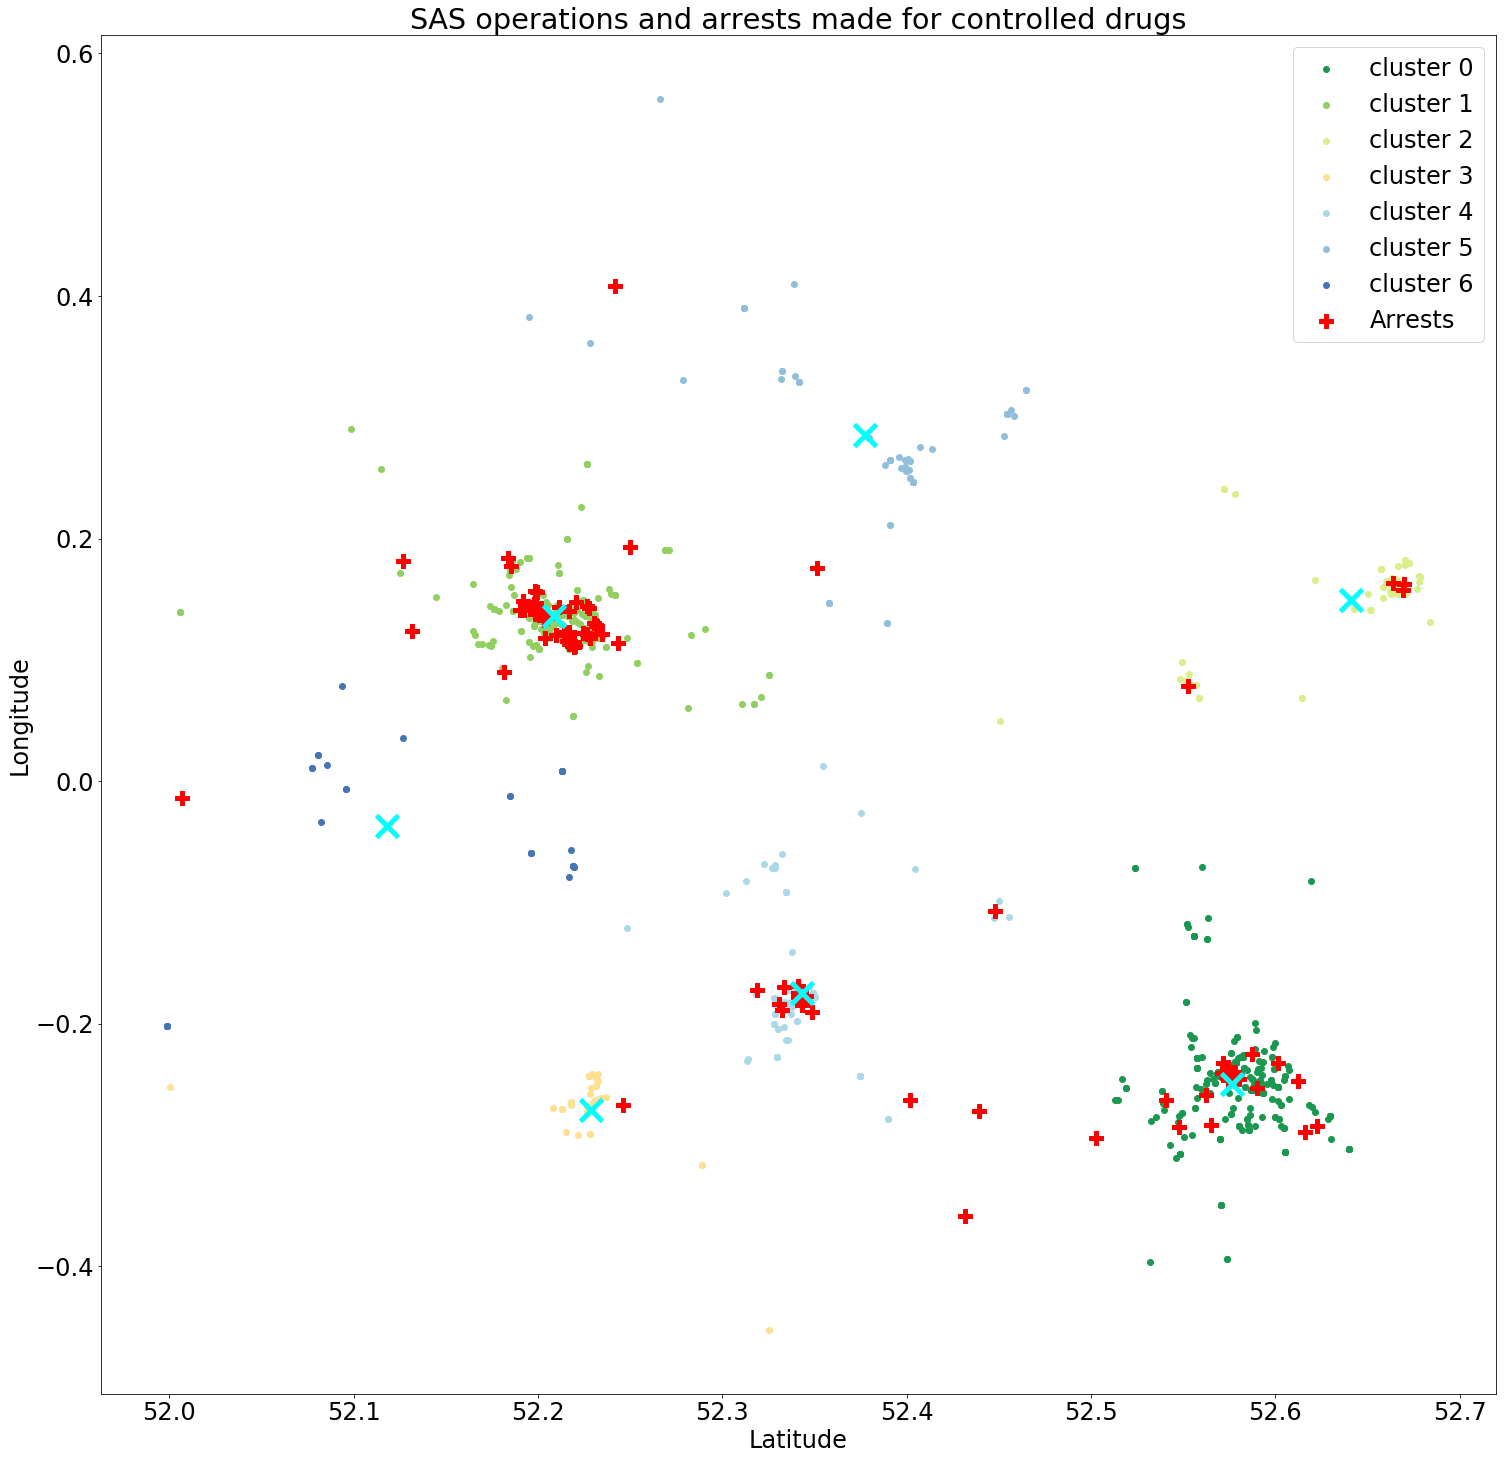

In [96]:
# Plot the data points which in the cluster labelled '0'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==0],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==0],
            color='#1a9850', marker='o', label='cluster 0')


# Plot the data points which in the cluster labelled '1'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==1],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==1],
            color='#91cf60', marker='o', label='cluster 1')


# Plot the data points which in the cluster labelled '2'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==2],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==2],
            color='#d9ef8b', marker='o', label='cluster 2')

# Plot the data points which in the cluster labelled '3'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==3],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==3],
            color='#fee090', marker='o', label='cluster 3')

# Plot the data points which in the cluster labelled '4'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==4],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==4],
            color='#abd9e9', marker='o', label='cluster 4')

# Plot the data points which in the cluster labelled '5'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==5],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==5],
            color='#91bfdb', marker='o', label='cluster 5')

# Plot the data points which in the cluster labelled '6'
plt.scatter(new_sas_coord_df['Latitude'][assignedClusters_clust.labels_==6],
            new_sas_coord_df['Longitude'][assignedClusters_clust.labels_==6],
            color='#4575b4', marker='o', label='cluster 6')


# Plot each of the centroids:
for (cx, cy) in assignedClusters_clust.cluster_centers_:
    plt.plot(cx, cy, color='cyan', marker='x', mew=5, markersize=22)
    
# Plot the controlled drug arrests
arrests = plt.scatter(drug_arrests_df['Latitude'],
            drug_arrests_df['Longitude'],
            color='red', marker='P', label='Arrests', s=200)



plt.legend()

plt.xlabel('Latitude')
plt.ylabel('Longitude')

# plt.title('7-means Clustering')
plt.title('SAS operations and arrests made for controlled drugs')
plt.plot()


We can see all of the stop-and-search operations over the one year period clustered in 7 groups.
The light X represent the centroids of each cluster - the central points around which the operations concentrate.
The red crosses are the arrests resulting from the police searching for drugs (From outcome categories "Arrest" and "Suspect arrested")

In [97]:
# see how stop-and-searches change according to month
sas_df['Object of search'].value_counts()




Controlled drugs                       599
Article for use in theft               199
Offensive weapons                      165
Stolen goods                            51
Articles for use in criminal damage     11
Evidence of offences under the Act       7
Firearms                                 5
Name: Object of search, dtype: int64

In [98]:
# how many searches of each types for each month
sas_df.groupby(['Month', 'Object of search']).size()
search_types_df = sas_df.groupby(['Month', 'Object of search']).size().to_frame('Total searches per month').reset_index().sort_values(['Month', 'Total searches per month'], ascending=[True, False])
search_types_df.head()

Month                     Object of search  Total searches per month
2 2017-06                     Controlled drugs                        42
0 2017-06             Article for use in theft                        10
4 2017-06                    Offensive weapons                         7
1 2017-06  Articles for use in criminal damage                         4
5 2017-06                         Stolen goods                         3

In [99]:
# show total searches for each month
monthly_searches_df = search_types_df.pivot_table(index=['Month'], aggfunc=np.sum).reset_index()
# convert month to datetime so that the months show on the plot appropriately


monthly_searches_df['Month'] = monthly_searches_df['Month'].values.astype('datetime64[M]')

monthly_searches_df

Month  Total searches per month
0  2017-06-01                        67
1  2017-07-01                        74
2  2017-08-01                        96
3  2017-09-01                        82
4  2017-10-01                        84
5  2017-11-01                        68
6  2017-12-01                        91
7  2018-01-01                        85
8  2018-02-01                        83
9  2018-03-01                        75
10 2018-04-01                        94
11 2018-05-01                       138

In [100]:
# how many crimes of each type by month
street_df.groupby(['Month', 'Crime type']).size()
crime_types_df = street_df.groupby(['Month', 'Crime type']).size().to_frame('Total crime per month').reset_index().sort_values(['Month', 'Total crime per month'], ascending=[True, False])

crime_types_df.head()

Month                    Crime type  Total crime per month
0   2017-06         Anti-social behaviour                   2208
13  2017-06  Violence and sexual offences                   1675
6   2017-06                   Other theft                    729
3   2017-06     Criminal damage and arson                    713
12  2017-06                 Vehicle crime                    590

In [101]:
# show total crime amount for each month
monthly_crime_df = crime_types_df.pivot_table(index=['Month'], aggfunc=np.sum).reset_index()
# convert month to datetime so that the months show on the plot appropriately
monthly_crime_df['Month'] = pd.to_datetime(monthly_crime_df['Month'])
monthly_crime_df

Month  Total crime per month
0  2017-06-01                   8098
1  2017-07-01                   8053
2  2017-08-01                   7161
3  2017-09-01                   7126
4  2017-10-01                   7634
5  2017-11-01                   7252
6  2017-12-01                   6400
7  2018-01-01                   6535
8  2018-02-01                   5859
9  2018-03-01                   6330
10 2018-04-01                   6282
11 2018-05-01                   3063

In [102]:
total_searches_and_crime_df = pd.merge(monthly_crime_df, monthly_searches_df, on='Month')
total_searches_and_crime_df

Month  Total crime per month  Total searches per month
0  2017-06-01                   8098                        67
1  2017-07-01                   8053                        74
2  2017-08-01                   7161                        96
3  2017-09-01                   7126                        82
4  2017-10-01                   7634                        84
5  2017-11-01                   7252                        68
6  2017-12-01                   6400                        91
7  2018-01-01                   6535                        85
8  2018-02-01                   5859                        83
9  2018-03-01                   6330                        75
10 2018-04-01                   6282                        94
11 2018-05-01                   3063                       138

In [103]:
monthly_crime_df.iloc[0][0]

Timestamp('2017-06-01 00:00:00')

In [104]:
monthly_searches_df.iloc[0][0] ## data formats now matching

Timestamp('2017-06-01 00:00:00')

Now I will plot both total crimes and total searches to see how they change over the year

(0, 9000)

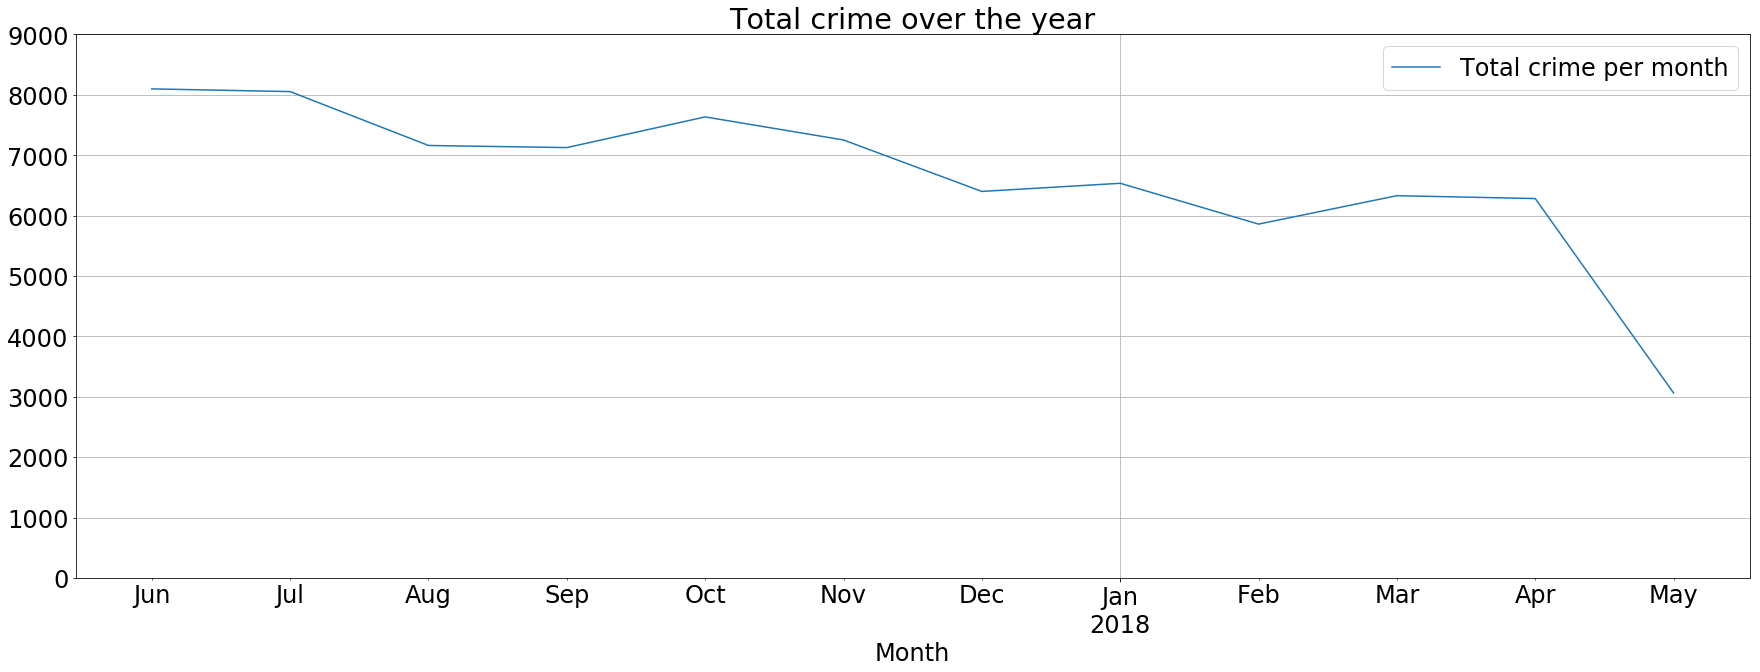

In [105]:
# plot total crime per month
ax = monthly_crime_df[['Month', 'Total crime per month']].plot.line(x='Month', y='Total crime per month',
                                                         figsize=(30,10), grid=True,
                                                       title="Total crime over the year");

ax.set_ylim(0, 9000) 

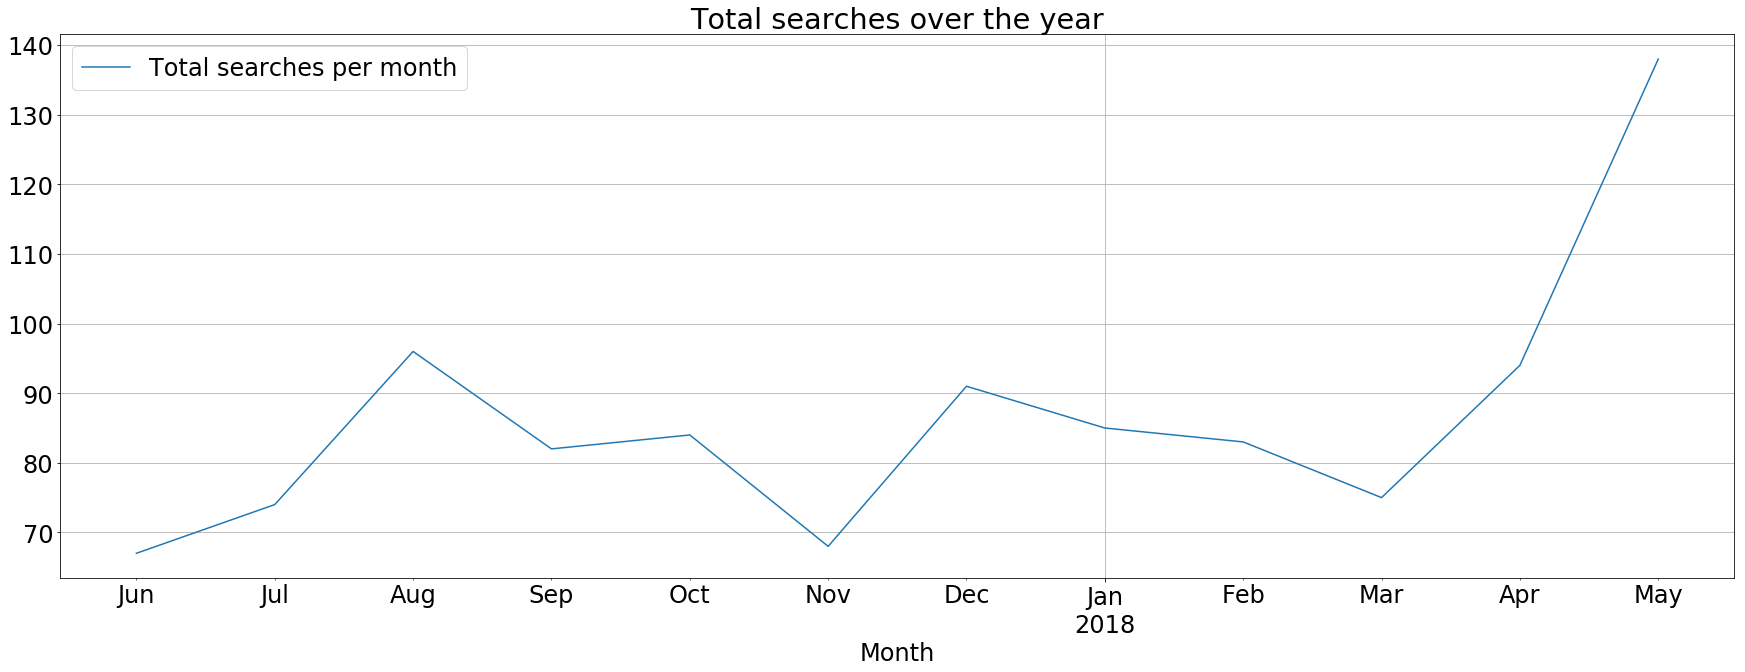

In [106]:
# plot total crime per month
ax = monthly_searches_df[['Month', 'Total searches per month']].plot.line(x='Month', y='Total searches per month',
                                                         figsize=(30,10), grid=True,
                                                       title="Total searches over the year");

#ax.set_ylim(0, 9000) 

In [107]:
total_searches_and_crime_df.set_index('Month', inplace=True)

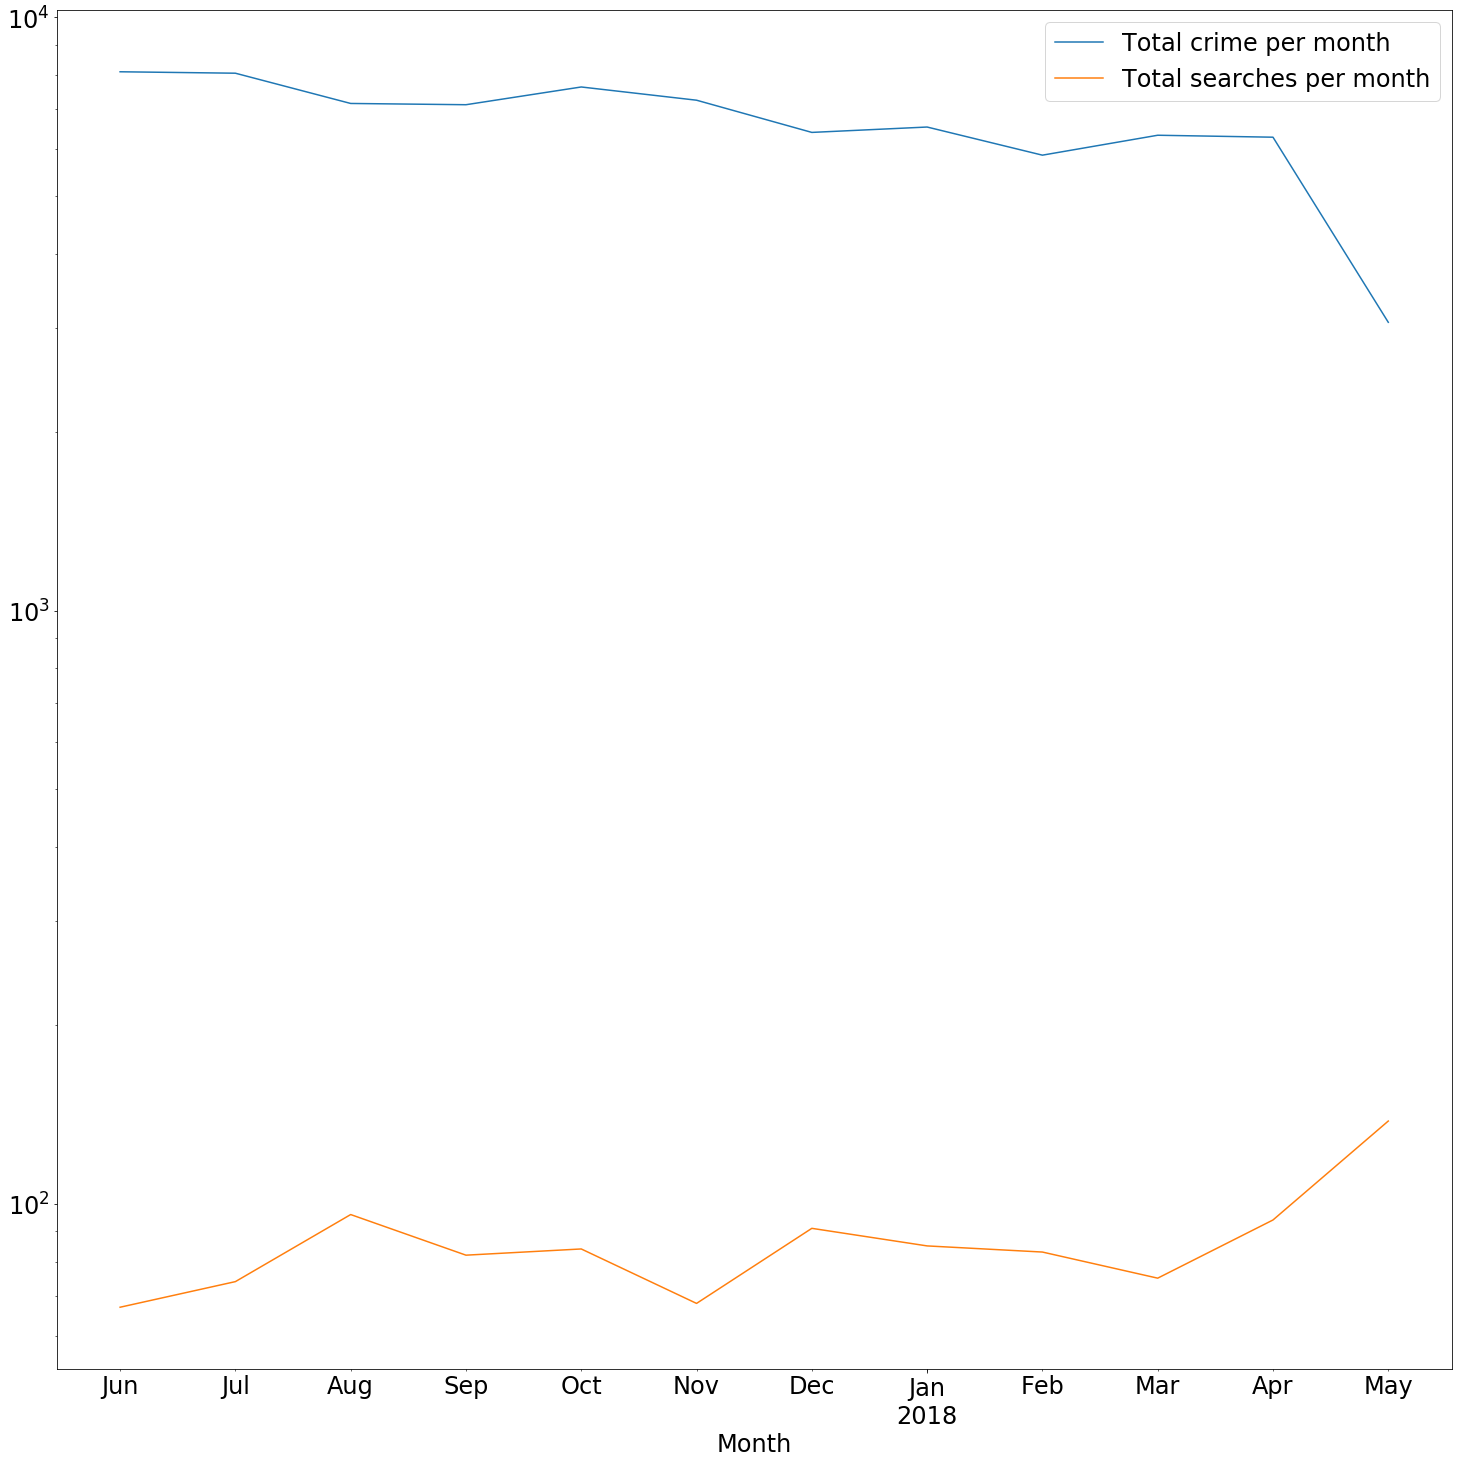

In [113]:
# log scale
ax = total_searches_and_crime_df.plot.line(logy=True)

In [115]:
#sas_df.memory_usage(deep=True).sum()
